In [1]:
import cv2
import copy
import numpy as np
import pandas as pd
from scipy import signal
from functools import reduce
from itertools import compress
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Import corridor and mirror keypoints

### Left side

In [2]:
leftCorridor = pd.read_csv("C:\\Users\\yalec\\Documents\\GitHub\\Gap_Crossing\\Kate\\Data\\Cropped\\IsoD1_2mirror_120fps_exp1_left_corridor_top_left_20x_19y-001DLC_resnet50_validated.csv",
                           header=None, dtype='unicode')
colnames = {1:"front-x", 2:"front-y", 3:"front-likelihood",
            4:"hind-x", 5:"hind-y", 6:"hind-likelihood"}
leftCorridor = leftCorridor.rename(columns=colnames, inplace=False)
leftCorridor = leftCorridor.iloc[3:, 1:]
leftCorridor = leftCorridor.reset_index(drop=True)
leftCorridor = leftCorridor.astype(float)

In [3]:
leftMirror = pd.read_csv("C:\\Users\\yalec\\Documents\\GitHub\\Gap_Crossing\\Kate\\Data\\Cropped\\IsoD1_2mirror_120fps_exp1_left_mirror_top_left_378x_287yDLC_resnet50_validated.csv",
                           header=None, dtype='unicode')
colnames = {1:"front-x", 2:"front-y", 3:"front-likelihood",
            4:"hind-x", 5:"hind-y", 6:"hind-likelihood",
            7:"L-eye-x", 8:"L-eye-y", 9:"L-eye-likelihood",
            10:"R-eye-x", 11:"R-eye-y", 12:"R-eye-likelihood"}
leftMirror = leftMirror.rename(columns=colnames, inplace=False)
leftMirror = leftMirror.iloc[3:, 1:]
leftMirror = leftMirror.reset_index(drop=True)

In [4]:
leftMirror

front-x      front-y front-likelihood       hind-x       hind-y  \
0       81.55679893   49.4019475      0.079008706  37.26399791  40.15412474   
1       79.63091207  46.36822081      0.056870937  37.29371595  40.31005907   
2       65.69404936  50.23845255      0.075253651  46.15736747  44.47751489   
3       79.66402745  46.02474546      0.073297687  35.81146997   40.8328824   
4       78.24541259  45.72040546      0.080612987  45.88461101  44.66734493   
...             ...          ...              ...          ...          ...   
216036  110.4173472  43.87389748      0.409772635  106.9724082  40.32628465   
216037  82.57602119   54.9701674      0.363908112  98.71300447  127.1475644   
216038  83.42635632  54.75876975      0.347351581  90.35514927  56.54070497   
216039  96.36313009  52.83361512      0.366714686  90.54025674  56.19809246   
216040   82.6087594  54.77434754      0.399408728  98.34988797  126.4146357   

       hind-likelihood      L-eye-x      L-eye-y L-eye-likelihood  \
0          0.025872907  69.55534267  51.54700604      0.022911742   
1          0.043552496  48.15374279  66.26434314      0.019855123   
2           0.01109982  68.52501392  51.10136312      0.024713874   
3          0.174602509  83.30825138  45.56316161      0.022542372   
4          0.012541708  82.54499388  44.76474047      0.028542161   
...                ...          ...          ...              ...   
216036     0.012307573  89.11496305  53.99646521       0.17486468   
216037     0.011618167  87.61680889  52.85543525      0.192997754   
216038     0.013968715  89.51291609  54.37402821      0.247578532   
216039     0.011543607  89.36507273  54.06963253      0.226515546   
216040     0.010689839  88.38353682  53.99137974       0.20582968   

            R-eye-x      R-eye-y R-eye-likelihood  
0       71.87739444  49.91860986      0.145139933  
1        77.1024816  47.17422462       0.08249367  
2        71.0384798  49.61900568      0.111613706  
3         77.129071  46.65506983      0.106789716  
4       71.12756157  49.41174388      0.112935908  
...             ...          ...              ...  
216036  104.2065673  42.90951312      0.574723899  
216037  104.6976256  43.20503104      0.488107532  
216038  85.66793895  57.18645453      0.319031715  
216039  103.7817945  43.35904622       0.45919463  
216040  104.5658002  43.44685608      0.427882284  

[216041 rows x 12 columns]

### Right side

In [5]:
rightCorridor = pd.read_csv("C:\\Users\\yalec\\Documents\\GitHub\\Gap_Crossing\\Kate\\Data\\Cropped\\IsoD1_2mirror_120fps_exp1_right_corridor_top_left_729x_21y-002DLC_resnet50_CroppedCorridorGCOct4shuffle1_30000.csv",
                           header=None, dtype='unicode')
colnames = {1:"front-x", 2:"front-y", 3:"front-likelihood",
            4:"hind-x", 5:"hind-y", 6:"hind-likelihood"}
rightCorridor = rightCorridor.rename(columns=colnames, inplace=False)
rightCorridor = rightCorridor.iloc[3:, 1:]
rightCorridor = rightCorridor.reset_index(drop=True)
rightCorridor = rightCorridor.astype(float)

In [6]:
rightCorridor

front-x     front-y  front-likelihood      hind-x      hind-y  \
0       157.436729  311.201885          0.999003  152.495615  363.302708   
1       157.369820  310.947536          0.999012  150.073816  362.626978   
2       156.581923  311.852134          0.999099  149.972912  363.415014   
3       156.918029  311.475244          0.998991  152.344491  363.048955   
4       156.753160  311.341384          0.998925  150.436502  363.026734   
...            ...         ...               ...         ...         ...   
216036  154.337648  184.835836          0.997535  143.910896  134.346151   
216037  156.053263  188.529027          0.997779  144.600250  136.793146   
216038  154.392797  194.153924          0.998301  144.196954  139.859472   
216039  153.569317  196.287832          0.998685  143.621047  142.361923   
216040  154.567764  196.793881          0.998905  144.182902  144.600494   

        hind-likelihood  
0              0.998460  
1              0.997769  
2              0.997935  
3              0.998331  
4              0.997891  
...                 ...  
216036         0.999510  
216037         0.999465  
216038         0.999582  
216039         0.999633  
216040         0.999827  

[216041 rows x 6 columns]

In [7]:
rightMirror = pd.read_csv("C:\\Users\\yalec\\Documents\\GitHub\\Gap_Crossing\\Kate\\Data\\Cropped\\IsoD1_2mirror_120fps_exp1_right_mirror_top_left_554x_285yDLC_resnet50_CroppedMirrorGCOct4shuffle1_30000.csv",
                           header=None, dtype='unicode')
colnames = {1:"front-x", 2:"front-y", 3:"front-likelihood",
            4:"hind-x", 5:"hind-y", 6:"hind-likelihood",
            7:"L-eye-x", 8:"L-eye-y", 9:"L-eye-likelihood",
            10:"R-eye-x", 11:"R-eye-y", 12:"R-eye-likelihood"}
rightMirror = rightMirror.rename(columns=colnames, inplace=False)
rightMirror = rightMirror.iloc[3:, 1:]
rightMirror = rightMirror.reset_index(drop=True)

In [8]:
rightMirror

front-x             front-y     front-likelihood  \
0        70.57466626167297  31.899573802947998    0.944770872592926   
1        67.84662222862244   39.80981504917145   0.6107335686683655   
2        67.31177353858948  29.699352264404297    0.945709764957428   
3        67.89358995854855   29.42354106903076   0.9565396904945374   
4        67.34266209602356   39.42448717355728   0.6588103175163269   
...                    ...                 ...                  ...   
216036  34.740399956703186   72.03785705566406  0.35201525688171387   
216037   34.22402894496918   71.08856654167175  0.36826276779174805   
216038  31.382420539855957   72.82189607620239  0.43463242053985596   
216039  39.219234466552734   79.34104061126709   0.4017379879951477   
216040   33.34955167770386   71.03070449829102     0.30506432056427   

                    hind-x             hind-y       hind-likelihood  \
0        70.55805850028992  75.03432965278625    0.9986051321029663   
1        74.48324906826019  70.33935499191284    0.5797646641731262   
2        70.42846512794495  75.53694954514503    0.9987043142318726   
3        71.17828583717346  74.90146732330322    0.9986470341682434   
4        71.17429053783417  70.55167236924171    0.3708009719848633   
...                    ...                ...                   ...   
216036  28.491575002670288  35.20372933149338   0.13447271287441254   
216037  28.664020478725433  34.52791213989258   0.06595956534147263   
216038  28.448070257902145   34.6653733253479   0.10096093267202377   
216039  28.673684775829315  35.09249395132065  0.031942300498485565   
216040   28.75438505411148  34.40363323688507  0.026056837290525436   

                   L-eye-x             L-eye-y     L-eye-likelihood  \
0        63.52664279937744   35.34563112258911   0.9706507921218872   
1        66.18781363964081   42.88070821762085   0.6181073784828186   
2       63.601197242736816   36.15682469308376   0.9702368974685669   
3       63.470200061798096   35.73605903983116   0.9742397665977478   
4        65.20257152616978  42.238961696624756    0.639167308807373   
...                    ...                 ...                  ...   
216036   43.02706438302994   70.30017042160034   0.3867948353290558   
216037   42.50976204872131   69.90765511989594   0.3609258532524109   
216038   36.08566492795944   69.72389781475067   0.4128473103046417   
216039   43.15133845806122   71.33284497261047  0.31163567304611206   
216040   43.08474260568619   70.61725854873657   0.2557874917984009   

                   R-eye-x             R-eye-y    R-eye-likelihood  
0        76.79442173242569  32.990033864974976  0.9383605122566223  
1        72.08735400438309   37.41700029373169  0.2872879207134247  
2        76.41421183943748  33.777320861816406  0.9241383671760559  
3         76.7727364897728   33.71166253089905  0.9488072395324707  
4        69.07646656036377   37.14373075962067  0.3001572787761688  
...                    ...                 ...                 ...  
216036   25.78395366668701   68.09760144352913  0.5995042324066162  
216037  25.636566638946533   67.70449230074883  0.6573405265808105  
216038  25.273029804229736   67.40009754896164  0.7620497941970825  
216039  30.734496116638184   75.49225240945816  0.4398803412914276  
216040  25.710991382598877   67.09435200691223  0.6199038624763489  

[216041 rows x 12 columns]

# Filter out cassette flipping

In [9]:
def filter_flipping(vid_path):
    vidObj = cv2.VideoCapture(vid_path)
    
    # get average pixel vals
    left_avg_px = []
    while True:
        success, image = vidObj.read()
        if not success:
            break
        left_avg_px.append(np.mean(image))
        
    # calculate difference of averaged pixel values and take abs value
    left_avg_px_diff = [np.abs(left_avg_px[i+1]-left_avg_px[i]) for i in range(0, len(left_avg_px)-1)]
    left_avg_px_diff_abs = np.abs(left_avg_px_diff)

    # define values greater than 0.1 as cassette flipping
    left_no_flips = [np.nan if i > 1 else i for i in left_avg_px_diff_abs]
    
    # extract number of frames associated with trails vs. flipping
    len_flip = []
    count_reg = 0
    count_nan = 0
    for i in left_no_flips:
        if not(np.isnan(i)):
            count_reg += 1
            if count_nan>0:
                len_flip.append(count_nan)
                count_nan=0
        elif np.isnan(i):
            count_nan += 1
            if count_reg>0:
                len_flip.append(count_reg)
                count_reg=0
        else:
            if count_reg>0:
                len_flip.append(count_reg)
            elif count_nan>0:
                len_flip.append(count_nan)
                
    # filter number of frames to remove noise associated with set 0.1 threshold
    # first value is buffer
    # alternating values are lengths of trials and flips (2nd value trial, 3rd value flip, etc.)
    summed_len_flip = []
    temp_sum = 0
    for i in len_flip:
        if (i > 900) & (temp_sum!=0):
            summed_len_flip.append(temp_sum)
            temp_sum = 0
            summed_len_flip.append(i)
        elif i < 900:
            temp_sum += i
            
    # extract number of frames associated with buffer
    buffer = summed_len_flip[0]

    # extract number of frames associated with trial length
    trial_len = summed_len_flip[3]

    # extract number of frames associated with flip length
    flip_len = summed_len_flip[2]

    # find peaks (max changes in brightness) in averaged pixel data
    peaks = signal.find_peaks(np.abs(left_avg_px_diff[:]), height=12.5, distance=100)
    peaks = peaks[0].tolist()
    
    # define flipping range as peak +- (flip length % 2)
    peak_ranges = []
    window = round(flip_len/2)+40
    for i in peaks:
        peak_ranges = peak_ranges + np.arange(i-window,i+window).tolist()
    
    # filter out cassette flipping for pixel brightness
    filtered_flipping = pd.DataFrame({"data":(np.abs(left_avg_px_diff)).tolist()})
    filtered_flipping.loc[peak_ranges, 'data'] = np.nan
    filtered_flipping = filtered_flipping['data'].tolist()
    
    return left_avg_px_diff_abs, filtered_flipping, peak_ranges

### Left side

In [10]:
leftcorr_vid_path = "C:\\Users\\yalec\\Documents\\GitHub\\Gap_Crossing\\Kate\\Data\\Cropped\\IsoD1_2mirror_120fps_exp1_left_corridor_top_left_20x_19y-001.avi"
leftcorr_brightness, leftcorr_filtflip, leftcorr_flipframes = filter_flipping(leftcorr_vid_path)

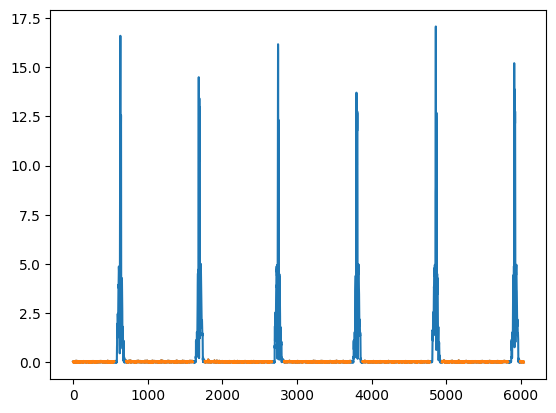

In [11]:
plt.plot(np.abs(leftcorr_brightness[210000:]))
plt.plot(leftcorr_filtflip[210000:])
plt.show()

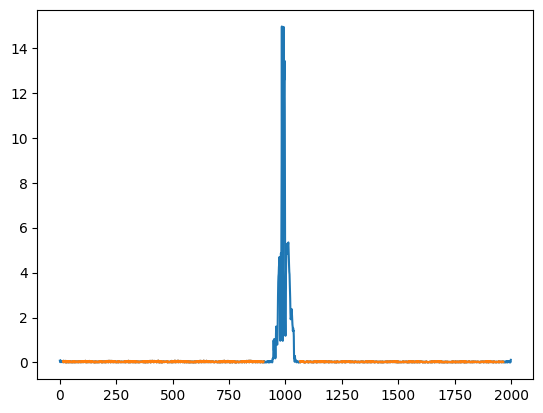

In [12]:
plt.plot(np.abs(leftcorr_brightness[10000:12000]))
plt.plot(leftcorr_filtflip[10000:12000])
plt.show()

In [13]:
# 0 = first side
# 1 = second side
# 3 = flip

side_filter = []
trial_num = []
curr_side = 0
trial_count = 1
for i in range(len(leftcorr_flipframes)):
    if i==0:
        side_filter += [curr_side]*(leftcorr_flipframes[i]-1)
        trial_num += [trial_count]*(leftcorr_flipframes[i]-1)
        beg_flip = i
        curr_side = (curr_side+1)%2
        trial_count += 1
    elif (leftcorr_flipframes[i]-leftcorr_flipframes[i-1])>1:
        side_filter += [2]*(leftcorr_flipframes[i-1]-leftcorr_flipframes[beg_flip])  
        side_filter += [curr_side]*(leftcorr_flipframes[i]-leftcorr_flipframes[i-1])        
        
        
        trial_num += [0]*(leftcorr_flipframes[i-1]-leftcorr_flipframes[beg_flip])
        trial_num += [trial_count]*(leftcorr_flipframes[i]-leftcorr_flipframes[i-1])  

        curr_side = (curr_side+1)%2
        beg_flip = i
        trial_count += 1
    elif i==len(leftcorr_flipframes)-1:
        side_filter += [2]*(leftcorr_flipframes[i]-leftcorr_flipframes[beg_flip])
        side_filter += [curr_side]*(len(leftCorridor)-leftcorr_flipframes[i]+1)
        
        trial_num += [0]*(leftcorr_flipframes[i]-leftcorr_flipframes[beg_flip])
        trial_num += [trial_count]*(len(leftCorridor)-leftcorr_flipframes[i]+1)

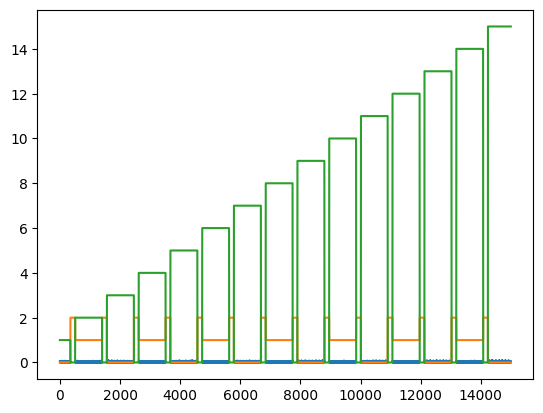

In [14]:
plt.plot(leftcorr_filtflip[:15000])
plt.plot(side_filter[:15000])
plt.plot(trial_num[:15000])
plt.show()

In [15]:
leftCorridor["side-filter"] = side_filter
leftMirror["side-filter"] = side_filter

leftCorridor["trial"] = trial_num
leftMirror["trial"] = trial_num

leftCorridor

front-x     front-y  front-likelihood      hind-x      hind-y  \
0       152.962372  250.190752          0.998443  149.689933  202.002227   
1       153.170637  249.903505          0.998608  149.676325  201.834108   
2       153.055122  250.851604          0.998606  149.649963  202.113427   
3       154.416506  248.521701          0.998038  149.582054  201.781542   
4       153.187097  250.958349          0.998661  149.522901  202.057921   
...            ...         ...               ...         ...         ...   
216036  262.559731  222.237171          0.076014  268.696526  218.570243   
216037  303.957319  247.675433          0.998174  259.555455  226.141919   
216038  304.970905  247.750437          0.998274  259.635862  229.400657   
216039  304.414698  248.338278          0.997890  259.715832  230.098900   
216040  303.498034  249.081385          0.997490  258.524830  232.518389   

        hind-likelihood  side-filter  trial  
0              0.999616            0      1  
1              0.999619            0      1  
2              0.999581            0      1  
3              0.999603            0      1  
4              0.999628            0      1  
...                 ...          ...    ...  
216036         0.627786            1    206  
216037         0.995393            1    206  
216038         0.994121            1    206  
216039         0.992053            1    206  
216040         0.978720            1    206  

[216041 rows x 8 columns]

In [16]:
leftCorridor_noflip = leftCorridor.drop(index=leftcorr_flipframes)
leftMirror_noflip = leftMirror.drop(index=leftcorr_flipframes)
leftCorridor_noflip

front-x     front-y  front-likelihood      hind-x      hind-y  \
0       152.962372  250.190752          0.998443  149.689933  202.002227   
1       153.170637  249.903505          0.998608  149.676325  201.834108   
2       153.055122  250.851604          0.998606  149.649963  202.113427   
3       154.416506  248.521701          0.998038  149.582054  201.781542   
4       153.187097  250.958349          0.998661  149.522901  202.057921   
...            ...         ...               ...         ...         ...   
216036  262.559731  222.237171          0.076014  268.696526  218.570243   
216037  303.957319  247.675433          0.998174  259.555455  226.141919   
216038  304.970905  247.750437          0.998274  259.635862  229.400657   
216039  304.414698  248.338278          0.997890  259.715832  230.098900   
216040  303.498034  249.081385          0.997490  258.524830  232.518389   

        hind-likelihood  side-filter  trial  
0              0.999616            0      1  
1              0.999619            0      1  
2              0.999581            0      1  
3              0.999603            0      1  
4              0.999628            0      1  
...                 ...          ...    ...  
216036         0.627786            1    206  
216037         0.995393            1    206  
216038         0.994121            1    206  
216039         0.992053            1    206  
216040         0.978720            1    206  

[183241 rows x 8 columns]

In [17]:
leftCorridor_noflip_side1 = leftCorridor_noflip.loc[leftCorridor_noflip['side-filter'] == 0]
leftCorridor_noflip_side2 = leftCorridor_noflip.loc[leftCorridor_noflip['side-filter'] == 1]
leftCorridor_noflip_side1

front-x     front-y  front-likelihood      hind-x      hind-y  \
0       152.962372  250.190752          0.998443  149.689933  202.002227   
1       153.170637  249.903505          0.998608  149.676325  201.834108   
2       153.055122  250.851604          0.998606  149.649963  202.113427   
3       154.416506  248.521701          0.998038  149.582054  201.781542   
4       153.187097  250.958349          0.998661  149.522901  202.057921   
...            ...         ...               ...         ...         ...   
215823  291.296490  361.605774          0.915397  295.239316  413.664933   
215824  292.897981  358.982699          0.996763  296.173162  411.933277   
215825  291.940261  358.621329          0.997577  296.059243  411.543849   
215826  297.167882  360.376181          0.548840  294.432198  417.063065   
215827  291.519571  359.237235          0.997370  295.769157  411.981650   

        hind-likelihood  side-filter  trial  
0              0.999616            0      1  
1              0.999619            0      1  
2              0.999581            0      1  
3              0.999603            0      1  
4              0.999628            0      1  
...                 ...          ...    ...  
215823         0.671083            0    205  
215824         0.996797            0    205  
215825         0.997215            0    205  
215826         0.687718            0    205  
215827         0.997396            0    205  

[91196 rows x 8 columns]

In [18]:
leftMirror_noflip_side1 = leftMirror_noflip.loc[leftMirror_noflip['side-filter'] == 0]
leftMirror_noflip_side2 = leftMirror_noflip.loc[leftMirror_noflip['side-filter'] == 1]
leftMirror_noflip_side1

front-x      front-y front-likelihood       hind-x       hind-y  \
0       81.55679893   49.4019475      0.079008706  37.26399791  40.15412474   
1       79.63091207  46.36822081      0.056870937  37.29371595  40.31005907   
2       65.69404936  50.23845255      0.075253651  46.15736747  44.47751489   
3       79.66402745  46.02474546      0.073297687  35.81146997   40.8328824   
4       78.24541259  45.72040546      0.080612987  45.88461101  44.66734493   
...             ...          ...              ...          ...          ...   
215823  31.72563171  101.2445252      0.435925275  48.39373732  110.7226346   
215824  32.44220424  110.5520701      0.336858809  48.81615949  111.1440573   
215825  32.20788574  100.9035946      0.586031199   47.4820118  111.1558504   
215826  32.90134621  101.0992228      0.651025355   47.1788702  111.3617189   
215827   30.6155777  100.3566851      0.241227508  49.84876657  110.6913481   

       hind-likelihood      L-eye-x      L-eye-y L-eye-likelihood  \
0          0.025872907  69.55534267  51.54700604      0.022911742   
1          0.043552496  48.15374279  66.26434314      0.019855123   
2           0.01109982  68.52501392  51.10136312      0.024713874   
3          0.174602509  83.30825138  45.56316161      0.022542372   
4          0.012541708  82.54499388  44.76474047      0.028542161   
...                ...          ...          ...              ...   
215823     0.026904926  24.08665681  111.5151649      0.053297747   
215824     0.024921799  23.10364294  112.3754206      0.033289019   
215825     0.038697392  34.24785328  102.9248662      0.065763593   
215826     0.036135111  25.55881619  110.6758418      0.088176735   
215827     0.014057664   35.8533268  101.4413308       0.02727804   

            R-eye-x      R-eye-y R-eye-likelihood  side-filter  trial  
0       71.87739444  49.91860986      0.145139933            0      1  
1        77.1024816  47.17422462       0.08249367            0      1  
2        71.0384798  49.61900568      0.111613706            0      1  
3         77.129071  46.65506983      0.106789716            0      1  
4       71.12756157  49.41174388      0.112935908            0      1  
...             ...          ...              ...          ...    ...  
215823  31.68932009  97.99330974      0.784313679            0    205  
215824  27.13518608  91.72929132      0.713508248            0    205  
215825  32.59406662  97.93141532      0.833648741            0    205  
215826  33.32350063  98.19060779      0.846865714            0    205  
215827  26.64717078  91.28489923      0.782916725            0    205  

[91196 rows x 14 columns]

### Right side

In [19]:
rightcorr_vid_path = "C:\\Users\\yalec\\Documents\\GitHub\\Gap_Crossing\\Kate\\Data\\Cropped\\IsoD1_2mirror_120fps_exp1_right_corridor_top_left_729x_21y-002.avi"
rightcorr_brightness, rightcorr_filtflip, rightcorr_flipframes = filter_flipping(rightcorr_vid_path)

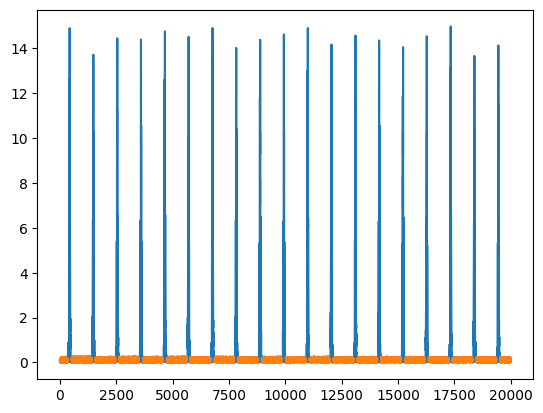

In [20]:
plt.plot(np.abs(rightcorr_brightness[:20000]))
plt.plot(rightcorr_filtflip[:20000])
plt.show()

In [21]:
# 0 = first side
# 1 = second side
# 3 = flip

side_filter = []
trial_num = []
curr_side = 0
trial_count = 1
for i in range(len(rightcorr_flipframes)):
    if i==0:
        side_filter += [curr_side]*(rightcorr_flipframes[i]-1)
        trial_num += [trial_count]*(rightcorr_flipframes[i]-1)
        beg_flip = i
        curr_side = (curr_side+1)%2
        trial_count += 1
    elif (rightcorr_flipframes[i]-rightcorr_flipframes[i-1])>1:
        side_filter += [2]*(rightcorr_flipframes[i-1]-rightcorr_flipframes[beg_flip])  
        side_filter += [curr_side]*(rightcorr_flipframes[i]-rightcorr_flipframes[i-1])        
        
        
        trial_num += [0]*(rightcorr_flipframes[i-1]-rightcorr_flipframes[beg_flip])
        trial_num += [trial_count]*(rightcorr_flipframes[i]-rightcorr_flipframes[i-1])  

        curr_side = (curr_side+1)%2
        beg_flip = i
        trial_count += 1
    elif i==len(rightcorr_flipframes)-1:
        side_filter += [2]*(rightcorr_flipframes[i]-rightcorr_flipframes[beg_flip])
        side_filter += [curr_side]*(len(rightCorridor)-rightcorr_flipframes[i]+1)
        
        trial_num += [0]*(rightcorr_flipframes[i]-rightcorr_flipframes[beg_flip])
        trial_num += [trial_count]*(len(rightCorridor)-rightcorr_flipframes[i]+1)

rightCorridor["side-filter"] = side_filter
rightMirror["side-filter"] = side_filter

rightCorridor["trial"] = trial_num
rightMirror["trial"] = trial_num

rightCorridor

front-x     front-y  front-likelihood      hind-x      hind-y  \
0       157.436729  311.201885          0.999003  152.495615  363.302708   
1       157.369820  310.947536          0.999012  150.073816  362.626978   
2       156.581923  311.852134          0.999099  149.972912  363.415014   
3       156.918029  311.475244          0.998991  152.344491  363.048955   
4       156.753160  311.341384          0.998925  150.436502  363.026734   
...            ...         ...               ...         ...         ...   
216036  154.337648  184.835836          0.997535  143.910896  134.346151   
216037  156.053263  188.529027          0.997779  144.600250  136.793146   
216038  154.392797  194.153924          0.998301  144.196954  139.859472   
216039  153.569317  196.287832          0.998685  143.621047  142.361923   
216040  154.567764  196.793881          0.998905  144.182902  144.600494   

        hind-likelihood  side-filter  trial  
0              0.998460            0      1  
1              0.997769            0      1  
2              0.997935            0      1  
3              0.998331            0      1  
4              0.997891            0      1  
...                 ...          ...    ...  
216036         0.999510            1    206  
216037         0.999465            1    206  
216038         0.999582            1    206  
216039         0.999633            1    206  
216040         0.999827            1    206  

[216041 rows x 8 columns]

In [22]:
rightCorridor_noflip = rightCorridor.drop(index=rightcorr_flipframes)
rightMirror_noflip = rightMirror.drop(index=rightcorr_flipframes)
rightMirror_noflip

front-x             front-y     front-likelihood  \
0        70.57466626167297  31.899573802947998    0.944770872592926   
1        67.84662222862244   39.80981504917145   0.6107335686683655   
2        67.31177353858948  29.699352264404297    0.945709764957428   
3        67.89358995854855   29.42354106903076   0.9565396904945374   
4        67.34266209602356   39.42448717355728   0.6588103175163269   
...                    ...                 ...                  ...   
216036  34.740399956703186   72.03785705566406  0.35201525688171387   
216037   34.22402894496918   71.08856654167175  0.36826276779174805   
216038  31.382420539855957   72.82189607620239  0.43463242053985596   
216039  39.219234466552734   79.34104061126709   0.4017379879951477   
216040   33.34955167770386   71.03070449829102     0.30506432056427   

                    hind-x             hind-y       hind-likelihood  \
0        70.55805850028992  75.03432965278625    0.9986051321029663   
1        74.48324906826019  70.33935499191284    0.5797646641731262   
2        70.42846512794495  75.53694954514503    0.9987043142318726   
3        71.17828583717346  74.90146732330322    0.9986470341682434   
4        71.17429053783417  70.55167236924171    0.3708009719848633   
...                    ...                ...                   ...   
216036  28.491575002670288  35.20372933149338   0.13447271287441254   
216037  28.664020478725433  34.52791213989258   0.06595956534147263   
216038  28.448070257902145   34.6653733253479   0.10096093267202377   
216039  28.673684775829315  35.09249395132065  0.031942300498485565   
216040   28.75438505411148  34.40363323688507  0.026056837290525436   

                   L-eye-x             L-eye-y     L-eye-likelihood  \
0        63.52664279937744   35.34563112258911   0.9706507921218872   
1        66.18781363964081   42.88070821762085   0.6181073784828186   
2       63.601197242736816   36.15682469308376   0.9702368974685669   
3       63.470200061798096   35.73605903983116   0.9742397665977478   
4        65.20257152616978  42.238961696624756    0.639167308807373   
...                    ...                 ...                  ...   
216036   43.02706438302994   70.30017042160034   0.3867948353290558   
216037   42.50976204872131   69.90765511989594   0.3609258532524109   
216038   36.08566492795944   69.72389781475067   0.4128473103046417   
216039   43.15133845806122   71.33284497261047  0.31163567304611206   
216040   43.08474260568619   70.61725854873657   0.2557874917984009   

                   R-eye-x             R-eye-y    R-eye-likelihood  \
0        76.79442173242569  32.990033864974976  0.9383605122566223   
1        72.08735400438309   37.41700029373169  0.2872879207134247   
2        76.41421183943748  33.777320861816406  0.9241383671760559   
3         76.7727364897728   33.71166253089905  0.9488072395324707   
4        69.07646656036377   37.14373075962067  0.3001572787761688   
...                    ...                 ...                 ...   
216036   25.78395366668701   68.09760144352913  0.5995042324066162   
216037  25.636566638946533   67.70449230074883  0.6573405265808105   
216038  25.273029804229736   67.40009754896164  0.7620497941970825   
216039  30.734496116638184   75.49225240945816  0.4398803412914276   
216040  25.710991382598877   67.09435200691223  0.6199038624763489   

        side-filter  trial  
0                 0      1  
1                 0      1  
2                 0      1  
3                 0      1  
4                 0      1  
...             ...    ...  
216036            1    206  
216037            1    206  
216038            1    206  
216039            1    206  
216040            1    206  

[180781 rows x 14 columns]

In [23]:
rightCorridor_noflip_side1 = rightCorridor_noflip.loc[rightCorridor_noflip['side-filter'] == 0]
rightCorridor_noflip_side2 = rightCorridor_noflip.loc[rightCorridor_noflip['side-filter'] == 1]
rightCorridor_noflip_side1

front-x     front-y  front-likelihood      hind-x      hind-y  \
0       157.436729  311.201885          0.999003  152.495615  363.302708   
1       157.369820  310.947536          0.999012  150.073816  362.626978   
2       156.581923  311.852134          0.999099  149.972912  363.415014   
3       156.918029  311.475244          0.998991  152.344491  363.048955   
4       156.753160  311.341384          0.998925  150.436502  363.026734   
...            ...         ...               ...         ...         ...   
215829  152.492969  500.411607          0.999543  176.190240  538.552403   
215830  152.610565  498.936791          0.999535  175.429227  537.037146   
215831  155.731023  494.085526          0.652280  169.006021  533.928156   
215832  152.433316  498.718708          0.999245  174.012411  535.902476   
215833  151.469653  498.439316          0.999022  173.597065  535.287361   

        hind-likelihood  side-filter  trial  
0              0.998460            0      1  
1              0.997769            0      1  
2              0.997935            0      1  
3              0.998331            0      1  
4              0.997891            0      1  
...                 ...          ...    ...  
215829         0.998405            0    205  
215830         0.995962            0    205  
215831         0.090585            0    205  
215832         0.997631            0    205  
215833         0.997662            0    205  

[91038 rows x 8 columns]

In [24]:
rightMirror_noflip_side1 = rightMirror_noflip.loc[rightMirror_noflip['side-filter'] == 0]
rightMirror_noflip_side2 = rightMirror_noflip.loc[rightMirror_noflip['side-filter'] == 1]
rightMirror_noflip_side1

front-x             front-y     front-likelihood  \
0        70.57466626167297  31.899573802947998    0.944770872592926   
1        67.84662222862244   39.80981504917145   0.6107335686683655   
2        67.31177353858948  29.699352264404297    0.945709764957428   
3        67.89358995854855   29.42354106903076   0.9565396904945374   
4        67.34266209602356   39.42448717355728   0.6588103175163269   
...                    ...                 ...                  ...   
215829   67.08733654022217   54.96631145477295  0.30573728680610657   
215830   83.01541423797607   53.57065200805664  0.33379867672920227   
215831   94.92689919471741   52.24834583699703   0.2705133557319641   
215832   94.85495471954346  51.905438005924225   0.3045845329761505   
215833  18.969654083251953  126.18376755714417  0.40291455388069153   

                    hind-x             hind-y       hind-likelihood  \
0        70.55805850028992  75.03432965278625    0.9986051321029663   
1        74.48324906826019  70.33935499191284    0.5797646641731262   
2        70.42846512794495  75.53694954514503    0.9987043142318726   
3        71.17828583717346  74.90146732330322    0.9986470341682434   
4        71.17429053783417  70.55167236924171    0.3708009719848633   
...                    ...                ...                   ...   
215829  60.416326493024826  51.17910021543503  0.011475740931928158   
215830   60.43608984351158  76.18353645503521  0.010896168649196625   
215831   59.88769496232271  76.78111928701401   0.02685229294002056   
215832   47.81989121437073  46.41519832611084  0.012668665498495102   
215833  60.329266250133514  76.37302401661873  0.018652932718396187   

                   L-eye-x             L-eye-y     L-eye-likelihood  \
0        63.52664279937744   35.34563112258911   0.9706507921218872   
1        66.18781363964081   42.88070821762085   0.6181073784828186   
2       63.601197242736816   36.15682469308376   0.9702368974685669   
3       63.470200061798096   35.73605903983116   0.9742397665977478   
4        65.20257152616978  42.238961696624756    0.639167308807373   
...                    ...                 ...                  ...   
215829    85.9293098449707  52.016242323443294  0.12721209228038788   
215830   87.12326240539551   51.33040654659271   0.1566450446844101   
215831    69.2039909362793   66.91818797588348  0.14184832572937012   
215832    92.2766923904419   52.88779491186142  0.11381901055574417   
215833   68.92530822753906   67.05266213417053   0.1446441113948822   

                   R-eye-x             R-eye-y     R-eye-likelihood  \
0        76.79442173242569  32.990033864974976   0.9383605122566223   
1        72.08735400438309   37.41700029373169   0.2872879207134247   
2        76.41421183943748  33.777320861816406   0.9241383671760559   
3         76.7727364897728   33.71166253089905   0.9488072395324707   
4        69.07646656036377   37.14373075962067   0.3001572787761688   
...                    ...                 ...                  ...   
215829   63.49849534034729  59.968480318784714  0.42123690247535706   
215830   63.83065319061279   60.36695423722267  0.42503687739372253   
215831   64.37185525894165   60.20056809484959   0.3177679479122162   
215832   25.77104640007019  123.65975362062454   0.3854462206363678   
215833  25.565321922302246   123.2269236445427   0.5534054636955261   

        side-filter  trial  
0                 0      1  
1                 0      1  
2                 0      1  
3                 0      1  
4                 0      1  
...             ...    ...  
215829            0    205  
215830            0    205  
215831            0    205  
215832            0    205  
215833            0    205  

[91038 rows x 14 columns]

#  Visualize fly walking trajectories

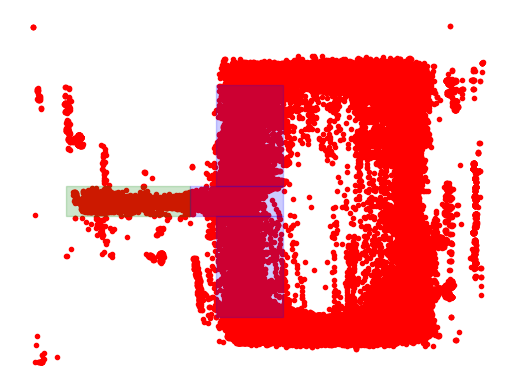

In [25]:
# optimal BB for left corridor
fig, ax = plt.subplots()
plt.plot(leftCorridor["front-x"], leftCorridor["front-y"], 'r.')
# plt.plot(139, 265, 'b.')
# plt.plot(141, 326, 'g.')
# circumvention
ax.add_patch(mpatches.Rectangle((23, 265), 97, 54, zorder=2, alpha=.2, color="green"))
# cross
ax.add_patch(mpatches.Rectangle((120, 265), 73, 54, zorder=2, alpha=.2, color="blue"))
# approaching gap
ax.add_patch(mpatches.Rectangle((140, 85), 53, 180, zorder=2, alpha=.2, color="blue"))
# leaving gap
ax.add_patch(mpatches.Rectangle((140, 319), 53, 180, zorder=2, alpha=.2, color="blue"))
plt.axis('off')
plt.show()

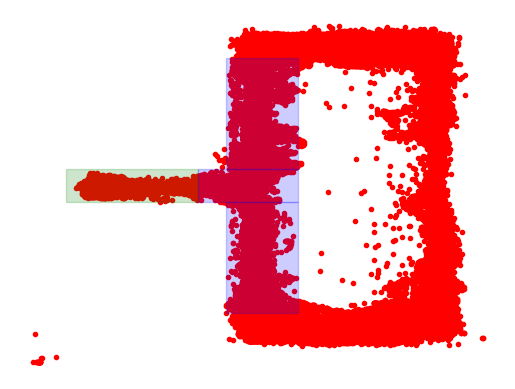

In [26]:
# optimal BB for left corridor
fig, ax = plt.subplots()
plt.plot(leftCorridor_noflip["front-x"], leftCorridor_noflip["front-y"], 'r.')
# plt.plot(139, 265, 'b.')
# plt.plot(141, 326, 'g.')
# circumvention
ax.add_patch(mpatches.Rectangle((23, 265), 97, 54, zorder=2, alpha=.2, color="green"))
# cross
ax.add_patch(mpatches.Rectangle((120, 265), 73, 54, zorder=2, alpha=.2, color="blue"))
# approaching gap
ax.add_patch(mpatches.Rectangle((140, 85), 53, 180, zorder=2, alpha=.2, color="blue"))
# leaving gap
ax.add_patch(mpatches.Rectangle((140, 319), 53, 180, zorder=2, alpha=.2, color="blue"))
plt.axis('off')
plt.show()

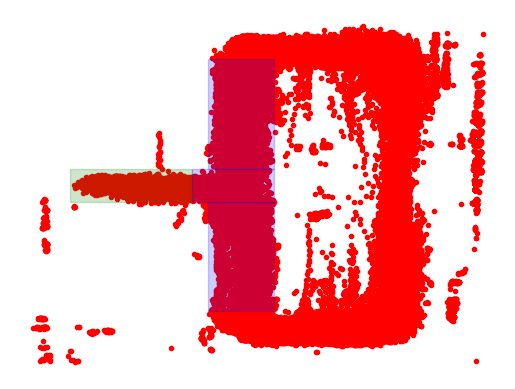

In [27]:
# optimal BB for right corridor
fig, ax = plt.subplots()
plt.plot(rightCorridor["front-x"], rightCorridor["front-y"], 'r.')
# plt.plot(133, 265, 'b.')
# plt.plot(135, 316, 'g.')
# circumvention
ax.add_patch(mpatches.Rectangle((20, 265), 97, 54, zorder=2, alpha=.2, color="green"))
# cross
ax.add_patch(mpatches.Rectangle((117, 265), 66, 54, zorder=2, alpha=.2, color="blue"))
# approaching gap
ax.add_patch(mpatches.Rectangle((130, 85), 53, 180, zorder=2, alpha=.2, color="blue"))
# leaving gap
ax.add_patch(mpatches.Rectangle((130, 319), 53, 180, zorder=2, alpha=.2, color="blue"))
plt.axis('off')
plt.show()

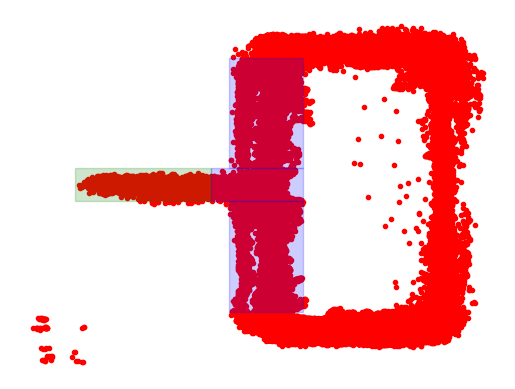

In [28]:
# optimal BB for right corridor
fig, ax = plt.subplots()
plt.plot(rightCorridor_noflip["front-x"], rightCorridor_noflip["front-y"], 'r.')
# plt.plot(133, 265, 'b.')
# plt.plot(135, 316, 'g.')
# circumvention
ax.add_patch(mpatches.Rectangle((20, 265), 97, 54, zorder=2, alpha=.2, color="green"))
# cross
ax.add_patch(mpatches.Rectangle((117, 265), 66, 54, zorder=2, alpha=.2, color="blue"))
# approaching gap
ax.add_patch(mpatches.Rectangle((130, 85), 53, 180, zorder=2, alpha=.2, color="blue"))
# leaving gap
ax.add_patch(mpatches.Rectangle((130, 319), 53, 180, zorder=2, alpha=.2, color="blue"))
plt.axis('off')
plt.show()

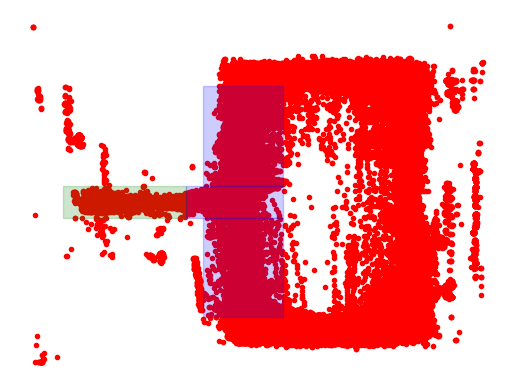

In [29]:
# optimal BB for both left and right corridors (combined width; height unchanged) 
fig, ax = plt.subplots()
# plt.plot(rightCorridor["front-x"], rightCorridor["front-y"], 'r.')
plt.plot(leftCorridor["front-x"], leftCorridor["front-y"], 'r.')
# plt.plot(133, 265, 'b.')
# plt.plot(135, 316, 'g.')
# circumvention
ax.add_patch(mpatches.Rectangle((20, 262), 97, 57, zorder=2, alpha=.2, color="green"))
# cross
ax.add_patch(mpatches.Rectangle((117, 262), 76, 57, zorder=2, alpha=.2, color="blue"))
# approaching gap
ax.add_patch(mpatches.Rectangle((130, 85), 63, 177, zorder=2, alpha=.2, color="blue"))
# leaving gap
ax.add_patch(mpatches.Rectangle((130, 319), 63, 177, zorder=2, alpha=.2, color="blue"))
plt.axis('off')
plt.show()

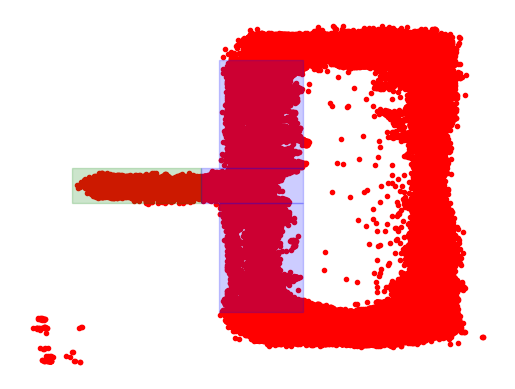

In [30]:
# optimal BB for both left and right corridors (combined width; height unchanged) 
fig, ax = plt.subplots()
plt.plot(rightCorridor_noflip["front-x"], rightCorridor_noflip["front-y"], 'r.')
plt.plot(leftCorridor_noflip["front-x"], leftCorridor_noflip["front-y"], 'r.')
# plt.plot(133, 265, 'b.')
# plt.plot(135, 316, 'g.')
# circumvention
ax.add_patch(mpatches.Rectangle((20, 262), 97, 57, zorder=2, alpha=.2, color="green"))
# cross
ax.add_patch(mpatches.Rectangle((117, 262), 76, 57, zorder=2, alpha=.2, color="blue"))
# approaching gap
ax.add_patch(mpatches.Rectangle((130, 85), 63, 177, zorder=2, alpha=.2, color="blue"))
# leaving gap
ax.add_patch(mpatches.Rectangle((130, 319), 63, 177, zorder=2, alpha=.2, color="blue"))
plt.axis('off')
plt.show()

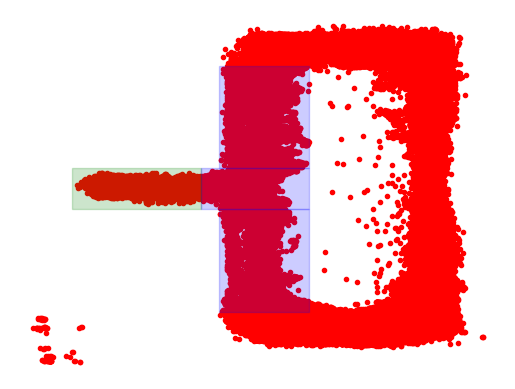

In [31]:
# optimal BB for both left and right corridors (combined width; height unchanged) 
fig, ax = plt.subplots()
plt.plot(rightCorridor_noflip["front-x"], rightCorridor_noflip["front-y"], 'r.')
plt.plot(leftCorridor_noflip["front-x"], leftCorridor_noflip["front-y"], 'r.')
# plt.plot(133, 265, 'b.')
# plt.plot(135, 316, 'g.')
# circumvention
ax.add_patch(mpatches.Rectangle((20, 252), 97, 67, zorder=2, alpha=.2, color="green"))
# cross
ax.add_patch(mpatches.Rectangle((117, 252), 81, 67, zorder=2, alpha=.2, color="blue"))
# approaching gap
ax.add_patch(mpatches.Rectangle((130, 85), 68, 167, zorder=2, alpha=.2, color="blue"))
# leaving gap
ax.add_patch(mpatches.Rectangle((130, 319), 68, 167, zorder=2, alpha=.2, color="blue"))
plt.axis('off')
plt.show()

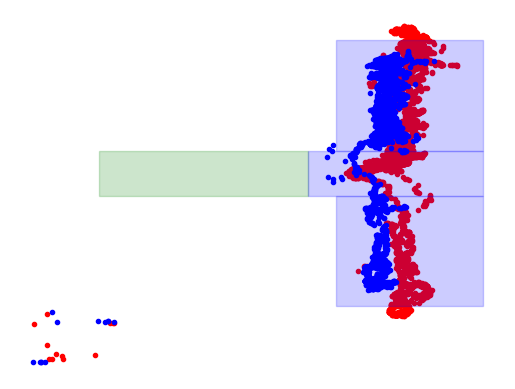

In [32]:
# optimal BB for both left and right corridors (combined width; height unchanged) 
fig, ax = plt.subplots()
plt.plot(rightCorridor_noflip_side1["front-x"].iloc[0:10000], rightCorridor_noflip_side1["front-y"].iloc[0:10000], 'r.')
plt.plot(rightCorridor_noflip_side1["hind-x"].iloc[0:10000], rightCorridor_noflip_side1["hind-y"].iloc[0:10000], 'b.')
# plt.plot(133, 265, 'b.')
# plt.plot(135, 316, 'g.')
# circumvention
ax.add_patch(mpatches.Rectangle((20, 252), 97, 67, zorder=2, alpha=.2, color="green"))
# cross
ax.add_patch(mpatches.Rectangle((117, 252), 81, 67, zorder=2, alpha=.2, color="blue"))
# approaching gap
ax.add_patch(mpatches.Rectangle((130, 85), 68, 167, zorder=2, alpha=.2, color="blue"))
# leaving gap
ax.add_patch(mpatches.Rectangle((130, 319), 68, 167, zorder=2, alpha=.2, color="blue"))
plt.axis('off')
plt.show()

# Assign fly state
## 1 = approach, 2 = gap, 3 = depart, 4 = circumvent, 5 = elsewhere in corridor

In [33]:
def set_flystate(posx, posy):
    
    posx = posx.to_list()
    posy = posy.to_list()
    states = []
    
    for i in range(len(posx)):
        
        if (130<=posx[i]<=193)&(85<=posy[i]<=262): #approach
            states.append(str(1))
        elif (117<=posx[i]<=193)&(262<=posy[i]<=319): #gap
            states.append(str(2))
        elif (130<=posx[i]<=193)&(319<=posy[i]<=496): #depart
            states.append(str(3))
        elif (20<=posx[i]<=117)&(262<=posy[i]<=319): #circumvent
            states.append(str(4))
        else:
            states.append(str(5))
        
    return states

In [34]:
L_frontstate_side1 = set_flystate(leftCorridor_noflip_side1["front-x"], leftCorridor_noflip_side1["front-y"])
L_hindstate_side1 = set_flystate(leftCorridor_noflip_side1["hind-x"], leftCorridor_noflip_side1["hind-y"])
leftCorridor_noflip_side1["front-state"] = L_frontstate_side1
leftCorridor_noflip_side1["hind-state"] = L_hindstate_side1
display(leftCorridor_noflip_side1)

C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\4268418153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leftCorridor_noflip_side1["front-state"] = L_frontstate_side1
C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\4268418153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leftCorridor_noflip_side1["hind-state"] = L_hindstate_side1


front-x     front-y  front-likelihood      hind-x      hind-y  \
0       152.962372  250.190752          0.998443  149.689933  202.002227   
1       153.170637  249.903505          0.998608  149.676325  201.834108   
2       153.055122  250.851604          0.998606  149.649963  202.113427   
3       154.416506  248.521701          0.998038  149.582054  201.781542   
4       153.187097  250.958349          0.998661  149.522901  202.057921   
...            ...         ...               ...         ...         ...   
215823  291.296490  361.605774          0.915397  295.239316  413.664933   
215824  292.897981  358.982699          0.996763  296.173162  411.933277   
215825  291.940261  358.621329          0.997577  296.059243  411.543849   
215826  297.167882  360.376181          0.548840  294.432198  417.063065   
215827  291.519571  359.237235          0.997370  295.769157  411.981650   

        hind-likelihood  side-filter  trial front-state hind-state  
0              0.999616            0      1           1          1  
1              0.999619            0      1           1          1  
2              0.999581            0      1           1          1  
3              0.999603            0      1           1          1  
4              0.999628            0      1           1          1  
...                 ...          ...    ...         ...        ...  
215823         0.671083            0    205           5          5  
215824         0.996797            0    205           5          5  
215825         0.997215            0    205           5          5  
215826         0.687718            0    205           5          5  
215827         0.997396            0    205           5          5  

[91196 rows x 10 columns]

In [35]:
L_frontstate_side2 = set_flystate(leftCorridor_noflip_side2["front-x"], leftCorridor_noflip_side2["front-y"])
L_hindstate_side2 = set_flystate(leftCorridor_noflip_side2["hind-x"], leftCorridor_noflip_side2["hind-y"])
leftCorridor_noflip_side2["front-state"] = L_frontstate_side2
leftCorridor_noflip_side2["hind-state"] = L_hindstate_side2
display(leftCorridor_noflip_side2)

C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\2047664054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leftCorridor_noflip_side2["front-state"] = L_frontstate_side2
C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\2047664054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leftCorridor_noflip_side2["hind-state"] = L_hindstate_side2


front-x     front-y  front-likelihood      hind-x      hind-y  \
509     161.872607  292.308326          0.999003  158.425589  345.045693   
510     159.112928  288.733844          0.998764  158.283002  342.588886   
511     158.949959  286.445976          0.999168  158.396444  340.148324   
512     160.752408  289.360936          0.998740  157.651722  343.328894   
513     162.346515  291.439081          0.999059  156.989092  343.788319   
...            ...         ...               ...         ...         ...   
216036  262.559731  222.237171          0.076014  268.696526  218.570243   
216037  303.957319  247.675433          0.998174  259.555455  226.141919   
216038  304.970905  247.750437          0.998274  259.635862  229.400657   
216039  304.414698  248.338278          0.997890  259.715832  230.098900   
216040  303.498034  249.081385          0.997490  258.524830  232.518389   

        hind-likelihood  side-filter  trial front-state hind-state  
509            0.999469            1      2           2          3  
510            0.999510            1      2           2          3  
511            0.999639            1      2           2          3  
512            0.999722            1      2           2          3  
513            0.999756            1      2           2          3  
...                 ...          ...    ...         ...        ...  
216036         0.627786            1    206           5          5  
216037         0.995393            1    206           5          5  
216038         0.994121            1    206           5          5  
216039         0.992053            1    206           5          5  
216040         0.978720            1    206           5          5  

[91840 rows x 10 columns]

In [36]:
R_frontstate_side1 = set_flystate(rightCorridor_noflip_side1["front-x"], rightCorridor_noflip_side1["front-y"])
R_hindstate_side1 = set_flystate(rightCorridor_noflip_side1["hind-x"], rightCorridor_noflip_side1["hind-y"])
rightCorridor_noflip_side1["front-state"] = R_frontstate_side1
rightCorridor_noflip_side1["hind-state"] = R_hindstate_side1
display(rightCorridor_noflip_side1)

C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\2852588467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rightCorridor_noflip_side1["front-state"] = R_frontstate_side1
C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\2852588467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rightCorridor_noflip_side1["hind-state"] = R_hindstate_side1


front-x     front-y  front-likelihood      hind-x      hind-y  \
0       157.436729  311.201885          0.999003  152.495615  363.302708   
1       157.369820  310.947536          0.999012  150.073816  362.626978   
2       156.581923  311.852134          0.999099  149.972912  363.415014   
3       156.918029  311.475244          0.998991  152.344491  363.048955   
4       156.753160  311.341384          0.998925  150.436502  363.026734   
...            ...         ...               ...         ...         ...   
215829  152.492969  500.411607          0.999543  176.190240  538.552403   
215830  152.610565  498.936791          0.999535  175.429227  537.037146   
215831  155.731023  494.085526          0.652280  169.006021  533.928156   
215832  152.433316  498.718708          0.999245  174.012411  535.902476   
215833  151.469653  498.439316          0.999022  173.597065  535.287361   

        hind-likelihood  side-filter  trial front-state hind-state  
0              0.998460            0      1           2          3  
1              0.997769            0      1           2          3  
2              0.997935            0      1           2          3  
3              0.998331            0      1           2          3  
4              0.997891            0      1           2          3  
...                 ...          ...    ...         ...        ...  
215829         0.998405            0    205           5          5  
215830         0.995962            0    205           5          5  
215831         0.090585            0    205           3          5  
215832         0.997631            0    205           5          5  
215833         0.997662            0    205           5          5  

[91038 rows x 10 columns]

In [37]:
R_frontstate_side2 = set_flystate(rightCorridor_noflip_side2["front-x"], rightCorridor_noflip_side2["front-y"])
R_hindstate_side2 = set_flystate(rightCorridor_noflip_side2["hind-x"], rightCorridor_noflip_side2["hind-y"])
rightCorridor_noflip_side2["front-state"] = R_frontstate_side2
rightCorridor_noflip_side2["hind-state"] = R_hindstate_side2
display(rightCorridor_noflip_side2)

C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\4166398297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rightCorridor_noflip_side2["front-state"] = R_frontstate_side2
C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\4166398297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rightCorridor_noflip_side2["hind-state"] = R_hindstate_side2


front-x     front-y  front-likelihood      hind-x      hind-y  \
519     156.480691  270.058452          0.999041  151.955789  222.951229   
520     155.756684  273.030103          0.998941  151.775703  222.978465   
521     155.689245  273.192878          0.999044  151.729240  223.205945   
522     156.698610  270.090463          0.999000  151.763320  222.903502   
523     144.731692  224.219873          0.197111  154.589492  223.592180   
...            ...         ...               ...         ...         ...   
216036  154.337648  184.835836          0.997535  143.910896  134.346151   
216037  156.053263  188.529027          0.997779  144.600250  136.793146   
216038  154.392797  194.153924          0.998301  144.196954  139.859472   
216039  153.569317  196.287832          0.998685  143.621047  142.361923   
216040  154.567764  196.793881          0.998905  144.182902  144.600494   

        hind-likelihood  side-filter  trial front-state hind-state  
519            0.999366            1      2           2          1  
520            0.999364            1      2           2          1  
521            0.999364            1      2           2          1  
522            0.999272            1      2           2          1  
523            0.563783            1      2           1          1  
...                 ...          ...    ...         ...        ...  
216036         0.999510            1    206           1          1  
216037         0.999465            1    206           1          1  
216038         0.999582            1    206           1          1  
216039         0.999633            1    206           1          1  
216040         0.999827            1    206           1          1  

[89538 rows x 10 columns]

# Determine successful cross, circumvention, or retreat

In [38]:
def crosstype(state, trial):
    
    # extract all trial nums
    trial_list = trial.to_list()
    trial_list = list(map(int, trial_list))
    unique_trial = reduce(lambda re, x: re+[x] if x not in re else re, trial_list, [])
    
    expanded_CT = []
    for trial_num in unique_trial:
        trial_idxs = trial[trial==trial_num].index.to_list()
        trial_state = state[trial_idxs].to_list()
        unique_state = [trial_state[0]]
        unique_state += [trial_state[num] for num in range(1, len(trial_state)) if trial_state[num]!=trial_state[num-1]]
        
        # determine crossing type for unique values
        crossing_type = []
        if len(unique_state) > 2:
            crossing_type = copy.deepcopy(unique_state)
            for i in range(len(unique_state)-2):
                if (unique_state[i]=='3')&(unique_state[i+1]=='2')&(unique_state[i+2]=='1'): #cross 1->2->3
                    crossing_type[i] = "cross"
                    crossing_type[i+1] = "cross"
                    crossing_type[i+2] = "cross"
                elif (unique_state[i]=='2')&(unique_state[i+1]=='4'): #circumvent #1->2->4
                    crossing_type[i] = "circumvent"
                    crossing_type[i+1] = "circumvent"
                elif (unique_state[i]=='1')&(unique_state[i+1]=='2')&(unique_state[i+2]=='1'): # retreat 1->2->1
                    crossing_type[i] = "retreat"
                    crossing_type[i+1] = "retreat"
                    crossing_type[i+2] = "retreat"
            for i in range(len(crossing_type)): #no cross
                try:
                    if type(int(crossing_type[i])) == int:
                        crossing_type[i] = 'none'
                except: continue
        else:
            crossing_type += ["none"]*(len(unique_state)-len(crossing_type))
                    
        #assign crossing type for all non-unique values
        cross_idx = 0
        temp_CT = []
        for i in range(len(trial_state)):
            if i == 0:
                temp_CT.append(crossing_type[cross_idx])
            elif trial_state[i] == trial_state[i-1]:
                temp_CT.append(crossing_type[cross_idx])
            else:
                cross_idx += 1
                temp_CT.append(crossing_type[cross_idx])
        
        expanded_CT += temp_CT
    
    return expanded_CT    

In [39]:
L_crossing_type_side1 = crosstype(leftCorridor_noflip_side1["front-state"], leftCorridor_noflip_side1["trial"])
leftCorridor_noflip_side1['crossing-type'] = L_crossing_type_side1
L_crossing_type_side2 = crosstype(leftCorridor_noflip_side2["front-state"], leftCorridor_noflip_side2["trial"])
leftCorridor_noflip_side2['crossing-type'] = L_crossing_type_side2

R_crossing_type_side1 = crosstype(rightCorridor_noflip_side1["front-state"], rightCorridor_noflip_side1["trial"])
rightCorridor_noflip_side1['crossing-type'] = R_crossing_type_side1
R_crossing_type_side2 = crosstype(rightCorridor_noflip_side2["front-state"], rightCorridor_noflip_side2["trial"])
rightCorridor_noflip_side2['crossing-type'] = R_crossing_type_side2

C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\3210609622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leftCorridor_noflip_side1['crossing-type'] = L_crossing_type_side1
C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\3210609622.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leftCorridor_noflip_side2['crossing-type'] = L_crossing_type_side2
C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\3210609622.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [40]:
rightCorridor_noflip_side1[rightCorridor_noflip_side1["crossing-type"]=="cross"]

front-x     front-y  front-likelihood      hind-x      hind-y  \
24808   172.235575  439.659853          0.995816  143.792979  422.571589   
24809   173.873002  438.334995          0.996586  144.876946  423.148601   
24810   173.397206  437.894684          0.987341  146.435228  420.087337   
24811   173.376975  433.705654          0.909260  147.637433  430.832305   
24812   172.716366  434.554783          0.816059  149.933655  433.821795   
...            ...         ...               ...         ...         ...   
206723  149.060298  265.563103          0.998723  139.748106  314.900303   
206724  150.015882  265.165410          0.998249  139.993134  315.518181   
206725  149.478580  264.428426          0.998438  141.115037  313.080839   
206726  149.421244  264.324323          0.998478  140.817999  312.619753   
206727  150.696120  262.905643          0.998704  141.266616  311.345284   

        hind-likelihood  side-filter  trial front-state hind-state  \
24808          0.996620            0     25           3          3   
24809          0.997274            0     25           3          3   
24810          0.998425            0     25           3          3   
24811          0.989765            0     25           3          3   
24812          0.981840            0     25           3          3   
...                 ...          ...    ...         ...        ...   
206723         0.997650            0    197           2          2   
206724         0.998286            0    197           2          2   
206725         0.998922            0    197           2          2   
206726         0.999378            0    197           2          2   
206727         0.999412            0    197           2          2   

       crossing-type  
24808          cross  
24809          cross  
24810          cross  
24811          cross  
24812          cross  
...              ...  
206723         cross  
206724         cross  
206725         cross  
206726         cross  
206727         cross  

[4124 rows x 11 columns]

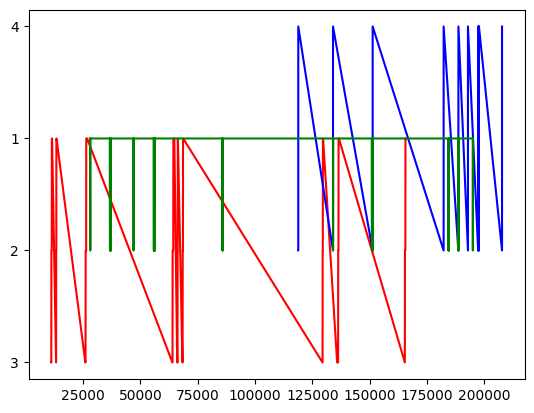

In [41]:
front_state_LC_cross = leftCorridor_noflip_side2[leftCorridor_noflip_side2["crossing-type"]=="cross"]["front-state"]
front_state_LC_circumvent = leftCorridor_noflip_side2[leftCorridor_noflip_side2["crossing-type"]=="circumvent"]["front-state"]
front_state_LC_retreat = leftCorridor_noflip_side2[leftCorridor_noflip_side2["crossing-type"]=="retreat"]["front-state"]
front_state_LC_misc = leftCorridor_noflip_side2[leftCorridor_noflip_side2["crossing-type"]=="none"]["front-state"]


plt.plot(front_state_LC_cross.index.tolist(), front_state_LC_cross.tolist(), 'r')
plt.plot(front_state_LC_circumvent.index.tolist(), front_state_LC_circumvent.tolist(), 'b')
plt.plot(front_state_LC_retreat.index.tolist(), front_state_LC_retreat.tolist(), 'g')
# plt.plot(front_state_LC_misc.index.tolist(), front_state_LC_misc.tolist(), 'm')
plt.show()

# Extract frames during fly crossing

In [42]:
rightCorridor_noflip = pd.concat([rightCorridor_noflip_side1, rightCorridor_noflip_side2])
leftCorridor_noflip = pd.concat([leftCorridor_noflip_side1, leftCorridor_noflip_side2])

rightMirror_noflip = pd.concat([rightMirror_noflip_side1, rightMirror_noflip_side2])
leftMirror_noflip = pd.concat([leftMirror_noflip_side1, leftMirror_noflip_side2])

In [43]:
len(set(leftCorridor_noflip["trial"][leftCorridor_noflip["crossing-type"]=='cross'].to_list()))

23

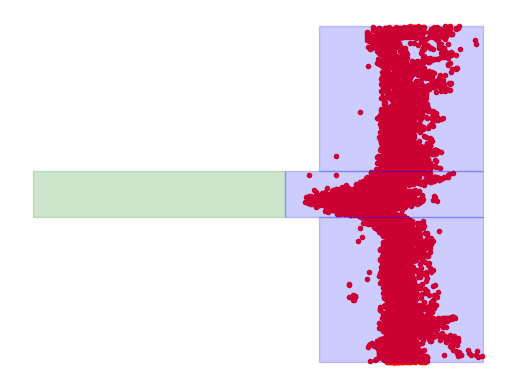

In [44]:
# left and right corridor (front) -- crossing only
fig, ax = plt.subplots()
plt.plot(rightCorridor_noflip["front-x"][rightCorridor_noflip['crossing-type'] == 'cross'], rightCorridor_noflip["front-y"][rightCorridor_noflip['crossing-type'] == 'cross'], 'r.')
plt.plot(leftCorridor_noflip["front-x"][leftCorridor_noflip['crossing-type'] == 'cross'], leftCorridor_noflip["front-y"][leftCorridor_noflip['crossing-type'] == 'cross'], 'r.')
# plt.plot(133, 265, 'b.')
# plt.plot(135, 316, 'g.')
# circumvention
ax.add_patch(mpatches.Rectangle((20, 262), 97, 57, zorder=2, alpha=.2, color="green"))
# cross
ax.add_patch(mpatches.Rectangle((117, 262), 76, 57, zorder=2, alpha=.2, color="blue"))
# approaching gap
ax.add_patch(mpatches.Rectangle((130, 85), 63, 177, zorder=2, alpha=.2, color="blue"))
# leaving gap
ax.add_patch(mpatches.Rectangle((130, 319), 63, 177, zorder=2, alpha=.2, color="blue"))
plt.axis('off')
plt.show()

In [45]:
# get frames for single crossings in left corridor (see below)
leftCorridor_PC = leftCorridor_noflip[leftCorridor_noflip['crossing-type'] == 'cross']
leftCorridor_PC_trials = reduce(lambda re, x: re+[x] if x not in re else re, leftCorridor_PC["trial"].to_list(), [])

singlecross_frames = []
for trial_num in leftCorridor_PC_trials:
    trial_idxs = leftCorridor_PC[leftCorridor_PC["trial"]==trial_num].index.to_list()
    singlecross_frames.append(leftCorridor.iloc[trial_idxs].index.to_list())

In [46]:
leftCorridor_noflip.loc[1650:1667]

front-x     front-y  front-likelihood      hind-x      hind-y  \
1650  162.315018  318.577494          0.999162  158.933979  372.466051   
1651  162.301389  317.961903          0.999261  158.860547  371.617696   
1652  162.660907  318.337881          0.999175  158.461513  372.015728   
1653  163.015156  318.576450          0.999003  158.602149  371.979166   
1654  162.900866  318.165567          0.999099  158.400755  371.864709   
1655  163.161724  318.876506          0.998865  158.460474  372.162353   
1656  163.223022  318.552391          0.998925  158.314819  372.043799   
1657  162.792972  318.790728          0.999074  158.687872  372.050903   
1658  163.517531  318.794970          0.998862  158.199691  371.927681   
1659  163.084831  318.250323          0.999105  157.942717  371.745989   
1660  163.084831  318.250323          0.999105  157.942717  371.745989   
1661  162.975101  318.711527          0.999030  158.088777  371.666560   
1662  163.498634  318.238406          0.998921  157.877461  371.386405   
1663  164.274613  318.644224          0.998608  158.249530  371.552803   
1664  164.776643  317.628404          0.998523  156.968426  370.182993   
1665  166.727988  317.674749          0.997322  156.122339  369.362432   
1666  169.094761  316.889257          0.997467  154.470262  367.692854   
1667  172.504314  316.943761          0.067733  157.577775  364.559562   

      hind-likelihood  side-filter  trial front-state hind-state crossing-type  
1650         0.999569            0      3           2          3         cross  
1651         0.999512            0      3           2          3         cross  
1652         0.999491            0      3           2          3         cross  
1653         0.999532            0      3           2          3         cross  
1654         0.999486            0      3           2          3         cross  
1655         0.999473            0      3           2          3         cross  
1656         0.999519            0      3           2          3         cross  
1657         0.999511            0      3           2          3         cross  
1658         0.999477            0      3           2          3         cross  
1659         0.999496            0      3           2          3         cross  
1660         0.999496            0      3           2          3         cross  
1661         0.999483            0      3           2          3         cross  
1662         0.999441            0      3           2          3         cross  
1663         0.999395            0      3           2          3         cross  
1664         0.999374            0      3           2          3         cross  
1665         0.999455            0      3           2          3         cross  
1666         0.998920            0      3           2          3         cross  
1667         0.740122            0      3           2          3         cross

In [47]:
singlecross_frames

[[1564,
  1565,
  1566,
  1567,
  1568,
  1569,
  1570,
  1571,
  1572,
  1573,
  1574,
  1575,
  1576,
  1577,
  1578,
  1579,
  1580,
  1581,
  1582,
  1583,
  1584,
  1585,
  1586,
  1587,
  1588,
  1589,
  1590,
  1591,
  1592,
  1593,
  1594,
  1595,
  1596,
  1597,
  1598,
  1599,
  1600,
  1601,
  1602,
  1603,
  1604,
  1605,
  1606,
  1607,
  1608,
  1609,
  1610,
  1611,
  1612,
  1613,
  1614,
  1615,
  1616,
  1617,
  1618,
  1619,
  1620,
  1621,
  1622,
  1623,
  1624,
  1625,
  1626,
  1627,
  1628,
  1629,
  1630,
  1631,
  1632,
  1633,
  1634,
  1635,
  1636,
  1637,
  1638,
  1639,
  1640,
  1641,
  1642,
  1643,
  1644,
  1645,
  1646,
  1647,
  1648,
  1649,
  1650,
  1651,
  1652,
  1653,
  1654,
  1655,
  1656,
  1657,
  1658,
  1659,
  1660,
  1661,
  1662,
  1663,
  1664,
  1665,
  1666,
  1667,
  1668,
  1669,
  1670,
  1671,
  1672,
  1673,
  1674,
  1675,
  1676,
  1677,
  1678,
  1679,
  1680,
  1681,
  1682,
  1683,
  1684,
  1685,
  1686,
  1687,
  1688,


In [48]:
len(singlecross_frames)

23

In [49]:
singlecross_frames[3]

[14266,
 14267,
 14268,
 14269,
 14270,
 14271,
 14272,
 14273,
 14274,
 14275,
 14276,
 14277,
 14278,
 14279,
 14280,
 14281,
 14282,
 14283,
 14284,
 14285,
 14286,
 14287,
 14288,
 14289,
 14290,
 14291,
 14292,
 14293,
 14294,
 14295,
 14296,
 14297,
 14298,
 14299,
 14300,
 14301,
 14302,
 14303,
 14304,
 14305,
 14306,
 14307,
 14308,
 14309,
 14310,
 14311,
 14312,
 14313,
 14314,
 14315,
 14316,
 14317,
 14318,
 14319,
 14320,
 14321,
 14322,
 14323,
 14324,
 14325,
 14326,
 14327,
 14328,
 14329,
 14330,
 14331,
 14332,
 14333,
 14334,
 14335,
 14336,
 14337,
 14338,
 14339,
 14340,
 14341,
 14342,
 14343,
 14344,
 14345,
 14346,
 14347,
 14348,
 14349,
 14350,
 14351,
 14352,
 14353,
 14354,
 14355,
 14356,
 14357,
 14358,
 14359,
 14360,
 14361,
 14362,
 14363,
 14364,
 14365,
 14366,
 14367,
 14368,
 14369,
 14370,
 14371,
 14372,
 14373,
 14374,
 14375,
 14376,
 14377,
 14378,
 14379,
 14380,
 14381,
 14382,
 14383,
 14384,
 14385,
 14386,
 14387,
 14388,
 14389,
 14390,


263


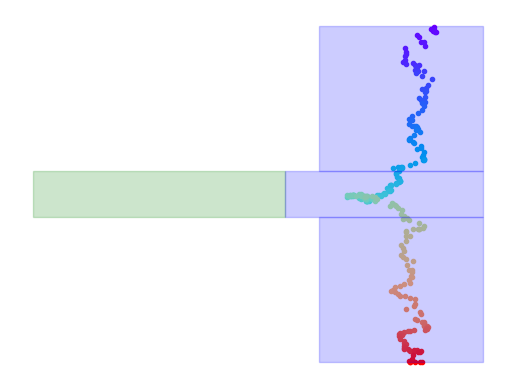

In [50]:
# left corridor (front) -- single cross

cross_frames = list(singlecross_frames[3])
# print(cross_frames)
print(len(cross_frames))
cross_frames = list(map(int, cross_frames))

fig, ax = plt.subplots()

colors = plt.cm.rainbow(np.linspace(0, 1, len(cross_frames)))

for i in range(len(cross_frames)):
    plt.plot(leftCorridor_noflip["front-x"].loc[cross_frames[i]], leftCorridor_noflip["front-y"].loc[cross_frames[i]], '.', color=colors[i])
# plt.plot(leftCorridor["front-x"][cross_frames], leftCorridor["front-y"][cross_frames], 'r.')

# circumvention
ax.add_patch(mpatches.Rectangle((20, 262), 97, 57, zorder=2, alpha=.2, color="green"))
# cross
ax.add_patch(mpatches.Rectangle((117, 262), 76, 57, zorder=2, alpha=.2, color="blue"))
# approaching gap
ax.add_patch(mpatches.Rectangle((130, 85), 63, 177, zorder=2, alpha=.2, color="blue"))
# leaving gap
ax.add_patch(mpatches.Rectangle((130, 319), 63, 177, zorder=2, alpha=.2, color="blue"))
plt.axis('off')
plt.show()

314


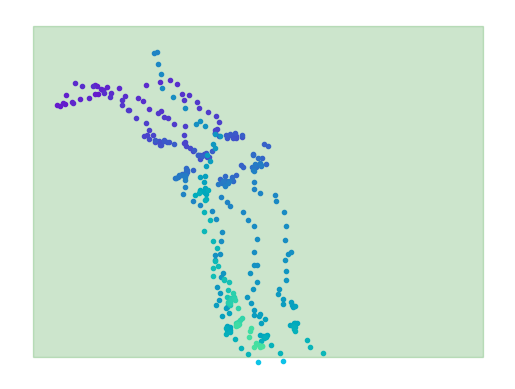

In [51]:
# left and right mirror (side) -- single cross

cross_frames = list(singlecross_frames[2])
# print(cross_frames)
print(len(cross_frames))
cross_frames = list(map(int, cross_frames))

fig, ax = plt.subplots()

colors = plt.cm.rainbow(np.linspace(0, 1, len(cross_frames)))

for i in range(len(cross_frames)):
    plt.plot(float(leftMirror_noflip["front-x"].loc[cross_frames[i]]), float(leftMirror_noflip["front-y"].loc[cross_frames[i]]), '.', color=colors[i])
    plt.plot(float(leftMirror_noflip["hind-x"].loc[cross_frames[i]]), float(leftMirror_noflip["hind-y"].loc[cross_frames[i]]), '.', color=colors[i])
    plt.plot(float(leftMirror_noflip["L-eye-x"].loc[cross_frames[i]]), float(leftMirror_noflip["L-eye-y"].loc[cross_frames[i]]), '.', color=colors[i])
    plt.plot(float(leftMirror_noflip["R-eye-x"].loc[cross_frames[i]]), float(leftMirror_noflip["R-eye-y"].loc[cross_frames[i]]), '.', color=colors[i])
# plt.plot(leftCorridor["front-x"][cross_frames], leftCorridor["front-y"][cross_frames], 'r.')

# circumvention
ax.add_patch(mpatches.Rectangle((24, 33), 94, 110, zorder=2, alpha=.2, color="green"))
plt.axis('off')
plt.show()

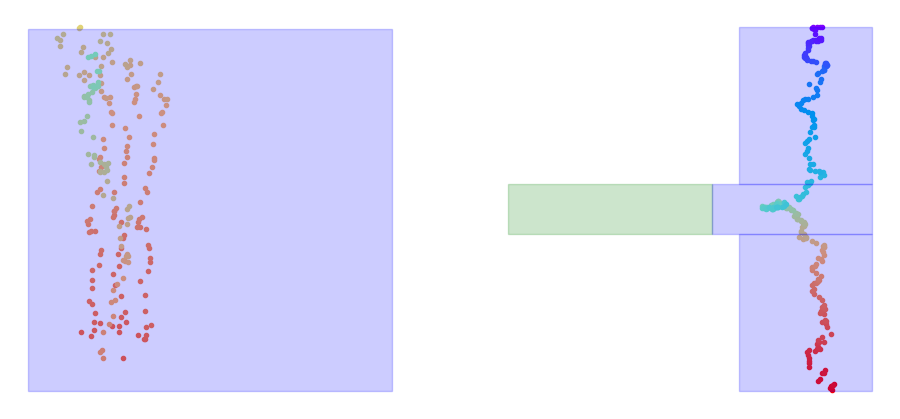

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

cross_frames = list(singlecross_frames[3])
cross_frames = list(map(int, cross_frames))
colors = plt.cm.rainbow(np.linspace(0, 1, len(cross_frames)))
colors = colors[::-1]

for i in range(round(len(cross_frames))):
    axs[1].plot(leftCorridor_noflip["front-x"].loc[cross_frames[i]], -leftCorridor_noflip["front-y"].loc[cross_frames[i]], '.', color=colors[i])
    axs[0].plot(float(leftMirror_noflip["front-x"].loc[cross_frames[i]]), -float(leftMirror_noflip["front-y"].loc[cross_frames[i]]), '.', color=colors[i])
    axs[0].plot(float(leftMirror_noflip["hind-x"].loc[cross_frames[i]]), -float(leftMirror_noflip["hind-y"].loc[cross_frames[i]]), '.', color=colors[i])
    axs[0].plot(float(leftMirror_noflip["L-eye-x"].loc[cross_frames[i]]), -float(leftMirror_noflip["L-eye-y"].loc[cross_frames[i]]), '.', color=colors[i])
    axs[0].plot(float(leftMirror_noflip["R-eye-x"].loc[cross_frames[i]]), -float(leftMirror_noflip["R-eye-y"].loc[cross_frames[i]]), '.', color=colors[i])
    
# circumvention
axs[1].add_patch(mpatches.Rectangle((20, -262), 97, -57, zorder=2, alpha=.2, color="green"))
# cross
axs[1].add_patch(mpatches.Rectangle((117, -262), 76, -57, zorder=2, alpha=.2, color="blue"))
# approaching gap
axs[1].add_patch(mpatches.Rectangle((130, -85), 63, -177, zorder=2, alpha=.2, color="blue"))
# leaving gap
axs[1].add_patch(mpatches.Rectangle((130, -319), 63, -177, zorder=2, alpha=.2, color="blue"))
# mirror
axs[0].add_patch(mpatches.Rectangle((24, -33), 94, -110, zorder=2, alpha=.2, color="blue"))

axs[0].axis('off')
axs[1].axis('off')
plt.show()

In [53]:
len(leftMirror_noflip["front-x"].loc[cross_frames].tolist()) - leftMirror_noflip["front-x"].loc[cross_frames].tolist().count(np.nan)

48

In [54]:
# leftMirror_noflip['avg-front-x'] = leftMirror_noflip.apply(lambda row: (float(row['front-x']) + float(row['L-eye-x']) + float(row['R-eye-x']))/3, axis=1)
# leftMirror_noflip['avg-front-y'] = leftMirror_noflip.apply(lambda row: (float(row['front-y']) + float(row['L-eye-y']) + float(row['R-eye-y']))/3, axis=1)

leftMirror_noflip['avg-front-x'] = leftMirror_noflip.apply(lambda row: np.nanmean([float(row['front-x']), float(row['L-eye-x']), float(row['R-eye-x'])]), axis=1)
leftMirror_noflip['avg-front-y'] = leftMirror_noflip.apply(lambda row: np.nanmean([float(row['front-y']), float(row['L-eye-y']), float(row['R-eye-y'])]), axis=1)

leftMirror_noflip

C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\1834624185.py:4: RuntimeWarning: Mean of empty slice
  leftMirror_noflip['avg-front-x'] = leftMirror_noflip.apply(lambda row: np.nanmean([float(row['front-x']), float(row['L-eye-x']), float(row['R-eye-x'])]), axis=1)
C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\1834624185.py:5: RuntimeWarning: Mean of empty slice
  leftMirror_noflip['avg-front-y'] = leftMirror_noflip.apply(lambda row: np.nanmean([float(row['front-y']), float(row['L-eye-y']), float(row['R-eye-y'])]), axis=1)


front-x      front-y front-likelihood       hind-x       hind-y  \
0       81.55679893   49.4019475      0.079008706  37.26399791  40.15412474   
1       79.63091207  46.36822081      0.056870937  37.29371595  40.31005907   
2       65.69404936  50.23845255      0.075253651  46.15736747  44.47751489   
3       79.66402745  46.02474546      0.073297687  35.81146997   40.8328824   
4       78.24541259  45.72040546      0.080612987  45.88461101  44.66734493   
...             ...          ...              ...          ...          ...   
216036  110.4173472  43.87389748      0.409772635  106.9724082  40.32628465   
216037  82.57602119   54.9701674      0.363908112  98.71300447  127.1475644   
216038  83.42635632  54.75876975      0.347351581  90.35514927  56.54070497   
216039  96.36313009  52.83361512      0.366714686  90.54025674  56.19809246   
216040   82.6087594  54.77434754      0.399408728  98.34988797  126.4146357   

       hind-likelihood      L-eye-x      L-eye-y L-eye-likelihood  \
0          0.025872907  69.55534267  51.54700604      0.022911742   
1          0.043552496  48.15374279  66.26434314      0.019855123   
2           0.01109982  68.52501392  51.10136312      0.024713874   
3          0.174602509  83.30825138  45.56316161      0.022542372   
4          0.012541708  82.54499388  44.76474047      0.028542161   
...                ...          ...          ...              ...   
216036     0.012307573  89.11496305  53.99646521       0.17486468   
216037     0.011618167  87.61680889  52.85543525      0.192997754   
216038     0.013968715  89.51291609  54.37402821      0.247578532   
216039     0.011543607  89.36507273  54.06963253      0.226515546   
216040     0.010689839  88.38353682  53.99137974       0.20582968   

            R-eye-x      R-eye-y R-eye-likelihood  side-filter  trial  \
0       71.87739444  49.91860986      0.145139933            0      1   
1        77.1024816  47.17422462       0.08249367            0      1   
2        71.0384798  49.61900568      0.111613706            0      1   
3         77.129071  46.65506983      0.106789716            0      1   
4       71.12756157  49.41174388      0.112935908            0      1   
...             ...          ...              ...          ...    ...   
216036  104.2065673  42.90951312      0.574723899            1    206   
216037  104.6976256  43.20503104      0.488107532            1    206   
216038  85.66793895  57.18645453      0.319031715            1    206   
216039  103.7817945  43.35904622       0.45919463            1    206   
216040  104.5658002  43.44685608      0.427882284            1    206   

        avg-front-x  avg-front-y  
0         74.329845    50.289188  
1         68.295712    53.268930  
2         68.419181    50.319607  
3         80.033783    46.080992  
4         77.305989    46.632297  
...             ...          ...  
216036   101.246293    46.926625  
216037    91.630152    50.343545  
216038    86.202404    55.439751  
216039    96.503332    50.087431  
216040    91.852699    50.737528  

[183036 rows x 16 columns]

In [55]:
singlecross_frames[3]

[14266,
 14267,
 14268,
 14269,
 14270,
 14271,
 14272,
 14273,
 14274,
 14275,
 14276,
 14277,
 14278,
 14279,
 14280,
 14281,
 14282,
 14283,
 14284,
 14285,
 14286,
 14287,
 14288,
 14289,
 14290,
 14291,
 14292,
 14293,
 14294,
 14295,
 14296,
 14297,
 14298,
 14299,
 14300,
 14301,
 14302,
 14303,
 14304,
 14305,
 14306,
 14307,
 14308,
 14309,
 14310,
 14311,
 14312,
 14313,
 14314,
 14315,
 14316,
 14317,
 14318,
 14319,
 14320,
 14321,
 14322,
 14323,
 14324,
 14325,
 14326,
 14327,
 14328,
 14329,
 14330,
 14331,
 14332,
 14333,
 14334,
 14335,
 14336,
 14337,
 14338,
 14339,
 14340,
 14341,
 14342,
 14343,
 14344,
 14345,
 14346,
 14347,
 14348,
 14349,
 14350,
 14351,
 14352,
 14353,
 14354,
 14355,
 14356,
 14357,
 14358,
 14359,
 14360,
 14361,
 14362,
 14363,
 14364,
 14365,
 14366,
 14367,
 14368,
 14369,
 14370,
 14371,
 14372,
 14373,
 14374,
 14375,
 14376,
 14377,
 14378,
 14379,
 14380,
 14381,
 14382,
 14383,
 14384,
 14385,
 14386,
 14387,
 14388,
 14389,
 14390,


[11064, 11065, 11066, 11067, 11068, 11069, 11070, 11071, 11072, 11073, 11074, 11075, 11076, 11077, 11078, 11079, 11080, 11081, 11082, 11083, 11084, 11085, 11086, 11087, 11088, 11089, 11090, 11091, 11092, 11093, 11094, 11095, 11096, 11097, 11098, 11099, 11100, 11101, 11102, 11103, 11104, 11105, 11106, 11107, 11108, 11109, 11110, 11111, 11112, 11113, 11114, 11115, 11116, 11117, 11118, 11119, 11120, 11121, 11122, 11123, 11124, 11125, 11126, 11127, 11128, 11129, 11130, 11131, 11132, 11133, 11134, 11135, 11136, 11137, 11138, 11139, 11140, 11141, 11142, 11143, 11144, 11145, 11146, 11147, 11148, 11149, 11150, 11151, 11152, 11153, 11154, 11155, 11156, 11157, 11158, 11159, 11160, 11161, 11162, 11163, 11164, 11165, 11166, 11167, 11168, 11169, 11170, 11171, 11172, 11173, 11174, 11175, 11176, 11177, 11178, 11179, 11180, 11181, 11182, 11183, 11184, 11185, 11186, 11187, 11188, 11189, 11190, 11191, 11192, 11193, 11194, 11195, 11196, 11197, 11198, 11199, 11200, 11201, 11202, 11203, 11204, 11205, 11206

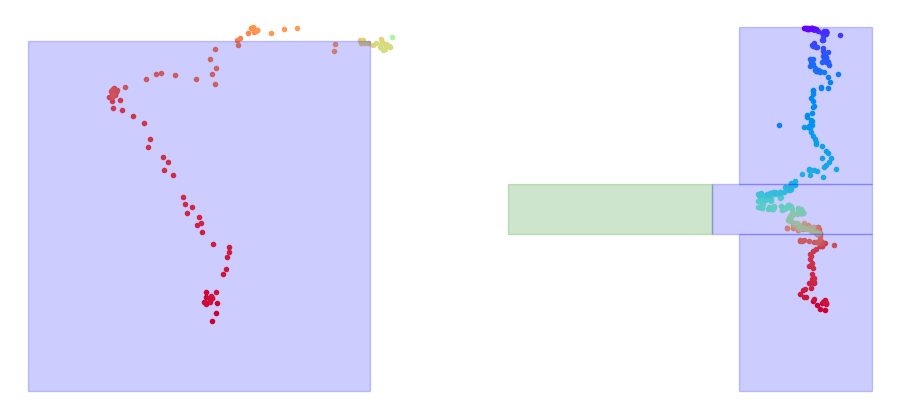

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

cross_frames = list(singlecross_frames[14])
cross_frames = list(map(int, cross_frames))
print(cross_frames)
print(len(cross_frames))
colors = plt.cm.rainbow(np.linspace(0, 1, len(cross_frames)))
colors = colors[::-1]

for i in range(round(len(cross_frames))):
    axs[1].plot(leftCorridor_noflip["front-x"].loc[cross_frames[i]], -leftCorridor_noflip["front-y"].loc[cross_frames[i]], '.', color=colors[i])
#     axs[1].plot(leftCorridor_noflip["hind-x"].loc[cross_frames[i]], -leftCorridor_noflip["hind-y"].loc[cross_frames[i]], '.', color=colors[i], alpha=0.1)
    axs[0].plot(float(leftMirror_noflip["avg-front-x"].loc[cross_frames[i]]), -float(leftMirror_noflip["avg-front-y"].loc[cross_frames[i]]), '.', color=colors[i])
#     axs[0].plot(float(leftMirror_noflip["front-x"].loc[cross_frames[i]]), -float(leftMirror_noflip["front-y"].loc[cross_frames[i]]), '.', color=colors[i])
#     axs[0].plot(float(leftMirror_noflip["L-eye-x"].loc[cross_frames[i]]), -float(leftMirror_noflip["L-eye-y"].loc[cross_frames[i]]), '.', color=colors[i])
#     axs[0].plot(float(leftMirror_noflip["R-eye-x"].loc[cross_frames[i]]), -float(leftMirror_noflip["R-eye-y"].loc[cross_frames[i]]), '.', color=colors[i])
#     axs[0].plot(float(leftMirror_noflip["hind-x"].loc[cross_frames[i]]), -float(leftMirror_noflip["hind-y"].loc[cross_frames[i]]), '.', color=colors[i])
    
# circumvention
axs[1].add_patch(mpatches.Rectangle((20, -262), 97, -57, zorder=2, alpha=.2, color="green"))
# cross
axs[1].add_patch(mpatches.Rectangle((117, -262), 76, -57, zorder=2, alpha=.2, color="blue"))
# approaching gap
axs[1].add_patch(mpatches.Rectangle((130, -85), 63, -177, zorder=2, alpha=.2, color="blue"))
# leaving gap
axs[1].add_patch(mpatches.Rectangle((130, -319), 63, -177, zorder=2, alpha=.2, color="blue"))
# mirror
axs[0].add_patch(mpatches.Rectangle((24, -33), 94, -110, zorder=2, alpha=.2, color="blue"))

axs[0].axis('off')
axs[1].axis('off')
plt.show()

In [57]:
leftMirror_noflip

front-x      front-y front-likelihood       hind-x       hind-y  \
0       81.55679893   49.4019475      0.079008706  37.26399791  40.15412474   
1       79.63091207  46.36822081      0.056870937  37.29371595  40.31005907   
2       65.69404936  50.23845255      0.075253651  46.15736747  44.47751489   
3       79.66402745  46.02474546      0.073297687  35.81146997   40.8328824   
4       78.24541259  45.72040546      0.080612987  45.88461101  44.66734493   
...             ...          ...              ...          ...          ...   
216036  110.4173472  43.87389748      0.409772635  106.9724082  40.32628465   
216037  82.57602119   54.9701674      0.363908112  98.71300447  127.1475644   
216038  83.42635632  54.75876975      0.347351581  90.35514927  56.54070497   
216039  96.36313009  52.83361512      0.366714686  90.54025674  56.19809246   
216040   82.6087594  54.77434754      0.399408728  98.34988797  126.4146357   

       hind-likelihood      L-eye-x      L-eye-y L-eye-likelihood  \
0          0.025872907  69.55534267  51.54700604      0.022911742   
1          0.043552496  48.15374279  66.26434314      0.019855123   
2           0.01109982  68.52501392  51.10136312      0.024713874   
3          0.174602509  83.30825138  45.56316161      0.022542372   
4          0.012541708  82.54499388  44.76474047      0.028542161   
...                ...          ...          ...              ...   
216036     0.012307573  89.11496305  53.99646521       0.17486468   
216037     0.011618167  87.61680889  52.85543525      0.192997754   
216038     0.013968715  89.51291609  54.37402821      0.247578532   
216039     0.011543607  89.36507273  54.06963253      0.226515546   
216040     0.010689839  88.38353682  53.99137974       0.20582968   

            R-eye-x      R-eye-y R-eye-likelihood  side-filter  trial  \
0       71.87739444  49.91860986      0.145139933            0      1   
1        77.1024816  47.17422462       0.08249367            0      1   
2        71.0384798  49.61900568      0.111613706            0      1   
3         77.129071  46.65506983      0.106789716            0      1   
4       71.12756157  49.41174388      0.112935908            0      1   
...             ...          ...              ...          ...    ...   
216036  104.2065673  42.90951312      0.574723899            1    206   
216037  104.6976256  43.20503104      0.488107532            1    206   
216038  85.66793895  57.18645453      0.319031715            1    206   
216039  103.7817945  43.35904622       0.45919463            1    206   
216040  104.5658002  43.44685608      0.427882284            1    206   

        avg-front-x  avg-front-y  
0         74.329845    50.289188  
1         68.295712    53.268930  
2         68.419181    50.319607  
3         80.033783    46.080992  
4         77.305989    46.632297  
...             ...          ...  
216036   101.246293    46.926625  
216037    91.630152    50.343545  
216038    86.202404    55.439751  
216039    96.503332    50.087431  
216040    91.852699    50.737528  

[183036 rows x 16 columns]

In [58]:
# leftMirror_noflip['angle'] = leftMirror_noflip.apply(lambda row: (float(row['front-x']) + float(row['L-eye-x']) + float(row['R-eye-x']))/3, axis=1)
# leftMirror_noflip['angle'] = leftMirror_noflip.apply(lambda row: np.arctan((float(row['avg-front-x'])-float(row['hind-x']))/(float(row['avg-front-y'])-float(row['hind-y']))), axis=1)
# leftMirror_noflip['angle'] = leftMirror_noflip.apply(lambda row: np.arctan2((float(row['avg-front-y'])-float(row['hind-y'])), (float(row['avg-front-x'])-float(row['hind-x']))), axis=1)
leftMirror_noflip['angle'] = leftMirror_noflip.apply(lambda row: np.arctan2((float(row['avg-front-x'])-float(row['hind-x'])), (float(row['avg-front-y'])-float(row['hind-y']))*-1), axis=1)
leftMirror_noflip

front-x      front-y front-likelihood       hind-x       hind-y  \
0       81.55679893   49.4019475      0.079008706  37.26399791  40.15412474   
1       79.63091207  46.36822081      0.056870937  37.29371595  40.31005907   
2       65.69404936  50.23845255      0.075253651  46.15736747  44.47751489   
3       79.66402745  46.02474546      0.073297687  35.81146997   40.8328824   
4       78.24541259  45.72040546      0.080612987  45.88461101  44.66734493   
...             ...          ...              ...          ...          ...   
216036  110.4173472  43.87389748      0.409772635  106.9724082  40.32628465   
216037  82.57602119   54.9701674      0.363908112  98.71300447  127.1475644   
216038  83.42635632  54.75876975      0.347351581  90.35514927  56.54070497   
216039  96.36313009  52.83361512      0.366714686  90.54025674  56.19809246   
216040   82.6087594  54.77434754      0.399408728  98.34988797  126.4146357   

       hind-likelihood      L-eye-x      L-eye-y L-eye-likelihood  \
0          0.025872907  69.55534267  51.54700604      0.022911742   
1          0.043552496  48.15374279  66.26434314      0.019855123   
2           0.01109982  68.52501392  51.10136312      0.024713874   
3          0.174602509  83.30825138  45.56316161      0.022542372   
4          0.012541708  82.54499388  44.76474047      0.028542161   
...                ...          ...          ...              ...   
216036     0.012307573  89.11496305  53.99646521       0.17486468   
216037     0.011618167  87.61680889  52.85543525      0.192997754   
216038     0.013968715  89.51291609  54.37402821      0.247578532   
216039     0.011543607  89.36507273  54.06963253      0.226515546   
216040     0.010689839  88.38353682  53.99137974       0.20582968   

            R-eye-x      R-eye-y R-eye-likelihood  side-filter  trial  \
0       71.87739444  49.91860986      0.145139933            0      1   
1        77.1024816  47.17422462       0.08249367            0      1   
2        71.0384798  49.61900568      0.111613706            0      1   
3         77.129071  46.65506983      0.106789716            0      1   
4       71.12756157  49.41174388      0.112935908            0      1   
...             ...          ...              ...          ...    ...   
216036  104.2065673  42.90951312      0.574723899            1    206   
216037  104.6976256  43.20503104      0.488107532            1    206   
216038  85.66793895  57.18645453      0.319031715            1    206   
216039  103.7817945  43.35904622       0.45919463            1    206   
216040  104.5658002  43.44685608      0.427882284            1    206   

        avg-front-x  avg-front-y     angle  
0         74.329845    50.289188  1.837706  
1         68.295712    53.268930  1.966724  
2         68.419181    50.319607  1.827436  
3         80.033783    46.080992  1.688919  
4         77.305989    46.632297  1.633251  
...             ...          ...       ...  
216036   101.246293    46.926625 -2.426999  
216037    91.630152    50.343545 -0.091960  
216038    86.202404    55.439751 -1.311643  
216039    96.503332    50.087431  0.773175  
216040    91.852699    50.737528 -0.085644  

[183036 rows x 17 columns]

263


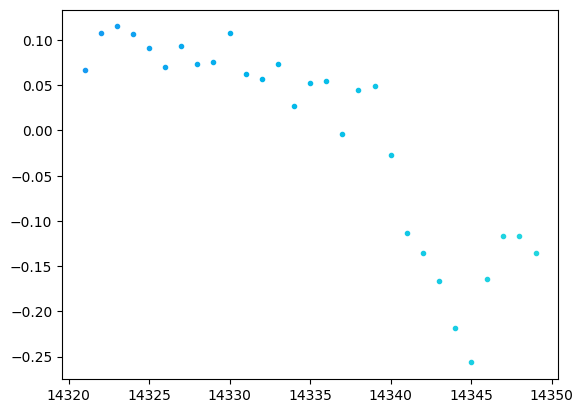

In [59]:
# left and right mirror (side) -- single cross

cross_frames = list(singlecross_frames[3])
# print(cross_frames)
print(len(cross_frames))
cross_frames = list(map(int, cross_frames))

fig, ax = plt.subplots()

colors = plt.cm.rainbow(np.linspace(0, 1, len(cross_frames)))

for i in range(len(cross_frames)):
    plt.plot(cross_frames[i], float(leftMirror_noflip["angle"].loc[cross_frames[i]]), '.', color=colors[i])

# plt.axis('off')
plt.show()

In [60]:
propercross_len = [len(i) for i in singlecross_frames]
max_pclen = max(propercross_len)
max_pclen

901

In [61]:
propercross = pd.DataFrame()

for i in range(len(singlecross_frames)):
    curr_cross_frames = singlecross_frames[i]
    curr_cross_angles = leftMirror_noflip["angle"].loc[curr_cross_frames].to_list()
    curr_cross = curr_cross_angles+[np.nan]*(max_pclen-len(curr_cross_angles))
    propercross["cross"+str(i)] = curr_cross

In [62]:
propercross

cross0  cross1  cross2  cross3  cross4    cross5  cross6    cross7  \
0       NaN     NaN     NaN     NaN     NaN -0.284956     NaN       NaN   
1       NaN     NaN     NaN     NaN     NaN -0.252780     NaN       NaN   
2       NaN     NaN     NaN     NaN     NaN -0.257289     NaN       NaN   
3       NaN     NaN     NaN     NaN     NaN -0.227692     NaN       NaN   
4       NaN     NaN     NaN     NaN     NaN -0.226875     NaN -0.117245   
..      ...     ...     ...     ...     ...       ...     ...       ...   
896     NaN     NaN     NaN     NaN     NaN       NaN     NaN       NaN   
897     NaN     NaN     NaN     NaN     NaN       NaN     NaN       NaN   
898     NaN     NaN     NaN     NaN     NaN       NaN     NaN       NaN   
899     NaN     NaN     NaN     NaN     NaN       NaN     NaN       NaN   
900     NaN     NaN     NaN     NaN     NaN       NaN     NaN       NaN   

       cross8  cross9  ...  cross13  cross14   cross15  cross16   cross17  \
0         NaN     NaN  ...      NaN      NaN  0.293259      NaN -1.309732   
1         NaN     NaN  ...      NaN      NaN  0.399780      NaN -1.268470   
2         NaN     NaN  ...      NaN      NaN  0.350197      NaN -1.312478   
3         NaN     NaN  ...      NaN      NaN  0.365115      NaN -1.252748   
4   -0.756243     NaN  ...      NaN      NaN  0.363536      NaN -1.242286   
..        ...     ...  ...      ...      ...       ...      ...       ...   
896       NaN     NaN  ...      NaN      NaN       NaN      NaN       NaN   
897       NaN     NaN  ...      NaN      NaN       NaN      NaN       NaN   
898       NaN     NaN  ...      NaN      NaN       NaN      NaN       NaN   
899       NaN     NaN  ...      NaN      NaN       NaN      NaN       NaN   
900       NaN     NaN  ...      NaN      NaN       NaN      NaN       NaN   

     cross18  cross19  cross20  cross21   cross22  
0        NaN      NaN      NaN      NaN -0.569539  
1        NaN      NaN      NaN      NaN -0.546427  
2        NaN      NaN      NaN      NaN -0.537247  
3        NaN      NaN      NaN      NaN -0.541239  
4        NaN      NaN      NaN      NaN -0.582696  
..       ...      ...      ...      ...       ...  
896      NaN      NaN      NaN      NaN       NaN  
897      NaN      NaN      NaN      NaN       NaN  
898      NaN      NaN      NaN      NaN       NaN  
899      NaN      NaN      NaN      NaN       NaN  
900      NaN      NaN      NaN      NaN       NaN  

[901 rows x 23 columns]

In [63]:
# propercross.to_csv("C:\\Users\\yalec\\Documents\\GitHub\\Gap_Crossing\\Kate\\Data\\Cropped\\propercrossings_updated.csv")

In [64]:
propercross_raw = leftMirror_noflip.copy(deep=True)
propercross_raw["propercrossingnum"] = propercross_raw.index.to_list()
for i in range(len(singlecross_frames)):
    if (i!=18): #(i!=5) & (i != 10) & (i != 11) & (i != 12):
        propercross_raw.loc[singlecross_frames[i], "propercrossingnum"] = str(i+1)

temp = propercross_raw["propercrossingnum"].to_list()
temp_fixed = [x if isinstance(x, str) else np.nan for x in temp]

propercross_raw["propercrossingnum"] = temp_fixed
    
propercross_raw

front-x      front-y front-likelihood       hind-x       hind-y  \
0       81.55679893   49.4019475      0.079008706  37.26399791  40.15412474   
1       79.63091207  46.36822081      0.056870937  37.29371595  40.31005907   
2       65.69404936  50.23845255      0.075253651  46.15736747  44.47751489   
3       79.66402745  46.02474546      0.073297687  35.81146997   40.8328824   
4       78.24541259  45.72040546      0.080612987  45.88461101  44.66734493   
...             ...          ...              ...          ...          ...   
216036  110.4173472  43.87389748      0.409772635  106.9724082  40.32628465   
216037  82.57602119   54.9701674      0.363908112  98.71300447  127.1475644   
216038  83.42635632  54.75876975      0.347351581  90.35514927  56.54070497   
216039  96.36313009  52.83361512      0.366714686  90.54025674  56.19809246   
216040   82.6087594  54.77434754      0.399408728  98.34988797  126.4146357   

       hind-likelihood      L-eye-x      L-eye-y L-eye-likelihood  \
0          0.025872907  69.55534267  51.54700604      0.022911742   
1          0.043552496  48.15374279  66.26434314      0.019855123   
2           0.01109982  68.52501392  51.10136312      0.024713874   
3          0.174602509  83.30825138  45.56316161      0.022542372   
4          0.012541708  82.54499388  44.76474047      0.028542161   
...                ...          ...          ...              ...   
216036     0.012307573  89.11496305  53.99646521       0.17486468   
216037     0.011618167  87.61680889  52.85543525      0.192997754   
216038     0.013968715  89.51291609  54.37402821      0.247578532   
216039     0.011543607  89.36507273  54.06963253      0.226515546   
216040     0.010689839  88.38353682  53.99137974       0.20582968   

            R-eye-x      R-eye-y R-eye-likelihood  side-filter  trial  \
0       71.87739444  49.91860986      0.145139933            0      1   
1        77.1024816  47.17422462       0.08249367            0      1   
2        71.0384798  49.61900568      0.111613706            0      1   
3         77.129071  46.65506983      0.106789716            0      1   
4       71.12756157  49.41174388      0.112935908            0      1   
...             ...          ...              ...          ...    ...   
216036  104.2065673  42.90951312      0.574723899            1    206   
216037  104.6976256  43.20503104      0.488107532            1    206   
216038  85.66793895  57.18645453      0.319031715            1    206   
216039  103.7817945  43.35904622       0.45919463            1    206   
216040  104.5658002  43.44685608      0.427882284            1    206   

        avg-front-x  avg-front-y     angle propercrossingnum  
0         74.329845    50.289188  1.837706               NaN  
1         68.295712    53.268930  1.966724               NaN  
2         68.419181    50.319607  1.827436               NaN  
3         80.033783    46.080992  1.688919               NaN  
4         77.305989    46.632297  1.633251               NaN  
...             ...          ...       ...               ...  
216036   101.246293    46.926625 -2.426999               NaN  
216037    91.630152    50.343545 -0.091960               NaN  
216038    86.202404    55.439751 -1.311643               NaN  
216039    96.503332    50.087431  0.773175               NaN  
216040    91.852699    50.737528 -0.085644               NaN  

[183036 rows x 18 columns]

In [65]:
propercross_raw['propercrossingnum'].unique()

array([nan, '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '20', '21', '22', '23'],
      dtype=object)

In [66]:
# propercross_raw.to_csv("C:\\Users\\yalec\\Documents\\GitHub\\Gap_Crossing\\Kate\\Data\\Cropped\\propercrossings_raw_updated.csv")

In [67]:
# replace short segments of numbers in data with nan values
def filter_seq(data_list):
    temp_main = []
    for i in range(len(data_list)):
        temp_single = []
        temp_list = copy.deepcopy(data_list[i])
        for j in range(len(temp_list)):
            if j == 0:
                temp_ind = []
                temp_ind.append(temp_list[j])
            elif j == len(temp_list)-1:
                temp_ind.append(temp_list[j])
                temp_single.append(temp_ind)
            elif math.isnan(temp_list[j]) == math.isnan(temp_list[j-1]):
                temp_ind.append(temp_list[j])
            else:
                temp_single.append(temp_ind)
                temp_ind = []
                temp_ind.append(temp_list[j])

                
        long_seq = max([len(i) for i in temp_single if not(math.isnan(i[0]))])
        thresh = round(long_seq/3)
        for seqidx in range(len(temp_single)):
            if math.isnan(temp_single[seqidx][0]): 
                continue
            elif len(temp_single[seqidx])<thresh:
                temp_single[seqidx] = [np.nan]*len(temp_single[seqidx])

        temp_main.append(sum(temp_single, []))
    return temp_main

In [68]:
currx = []
deltax = []
deltat = []
currtheta = []
deltatheta = []

singlecross_frames = []
for trial_num in propercross_raw['propercrossingnum'].unique()[1:]:
    trial_idxs = propercross_raw[propercross_raw["propercrossingnum"]==trial_num].index.to_list()
    singlecross_frames.append(trial_idxs)
    
for i in range(len(singlecross_frames)):
    cross_frames = list(singlecross_frames[i])
    cross_frames = list(map(int, cross_frames))
    
    curr_x = np.array(propercross_raw["avg-front-x"].loc[cross_frames].to_list())
    currx.append(curr_x)
    first_x = curr_x[np.isfinite(curr_x)][0]
    deltax.append(list(curr_x - first_x))
    
    curr_t = np.array(cross_frames)
    first_t = curr_t[np.isfinite(curr_t)][0]
    deltat.append(list(curr_t - first_t))
    
    curr_theta = np.array(propercross_raw["angle"].loc[cross_frames].to_list())
    currtheta.append(curr_theta)
    first_theta = curr_theta[np.isfinite(curr_theta)][0]
    deltatheta.append(list(curr_theta - first_theta))

In [69]:
import math
currx = filter_seq(currx)
deltax = filter_seq(deltax)
currtheta = filter_seq(currtheta)
deltatheta = filter_seq(deltatheta)

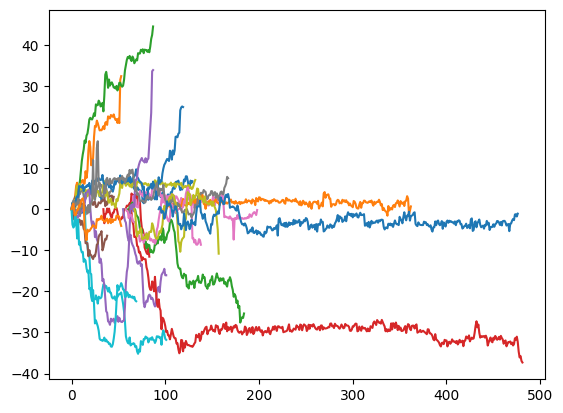

In [70]:
fig, ax = plt.subplots()

for i in range(len(deltax)):
    plt.plot(deltat[i], deltax[i], '-')

plt.show()

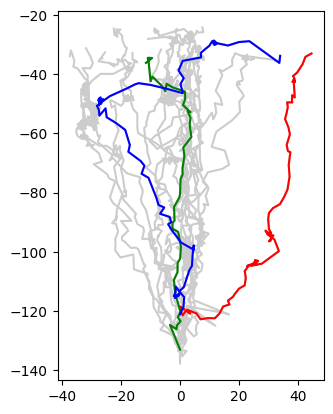

In [71]:
fig, ax = plt.subplots()

for i in range(len(deltax)):
    
    cross_frames = list(singlecross_frames[i])
    cross_frames = list(map(int, cross_frames))
    
    plt.plot(deltax[i], -leftMirror_noflip["avg-front-y"].loc[cross_frames], '-', color='0.8')
    
cross_frames = list(singlecross_frames[2])
cross_frames = list(map(int, cross_frames))
plt.plot(deltax[2], -leftMirror_noflip["avg-front-y"].loc[cross_frames], '-', color='r')

cross_frames = list(singlecross_frames[3])
cross_frames = list(map(int, cross_frames))
plt.plot(deltax[3], -leftMirror_noflip["avg-front-y"].loc[cross_frames], '-', color='g')
    
cross_frames = list(singlecross_frames[14])
cross_frames = list(map(int, cross_frames))
plt.plot(deltax[14], -leftMirror_noflip["avg-front-y"].loc[cross_frames], '-', color='b')

ax.set_aspect('equal')
plt.show()

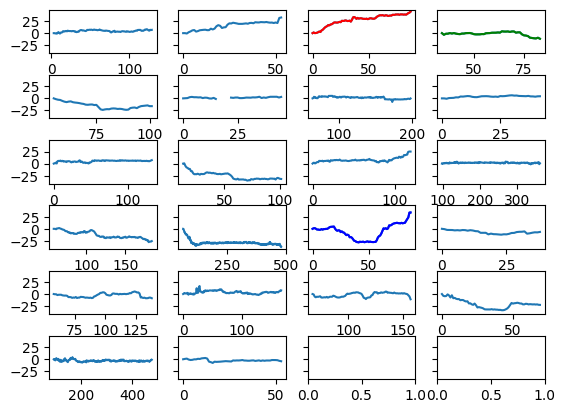

In [72]:
fig, axs = plt.subplots(nrows=6, ncols=4, sharey=True)
plt.subplots_adjust(hspace=0.5)

for i, ax in zip(range(len(deltax)), axs.ravel()):
    ax.plot(deltat[i], deltax[i])
    
    if i == 2:
        ax.plot(deltat[i], deltax[i], 'r')
    elif i == 3:
        ax.plot(deltat[i], deltax[i], 'g')
    elif i == 14:
        ax.plot(deltat[i], deltax[i], 'b')
    
    ax.set_xlabel("")

plt.show()

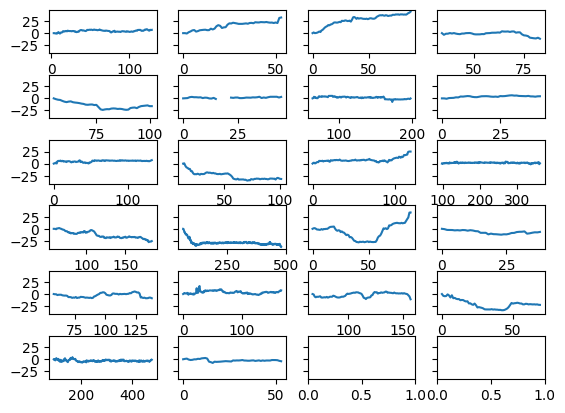

In [73]:
fig, axs = plt.subplots(nrows=6, ncols=4, sharey=True)
plt.subplots_adjust(hspace=0.5)

for i, ax in zip(range(len(deltax)), axs.ravel()):
    ax.plot(deltat[i], deltax[i])
    ax.set_xlabel("")

plt.show()

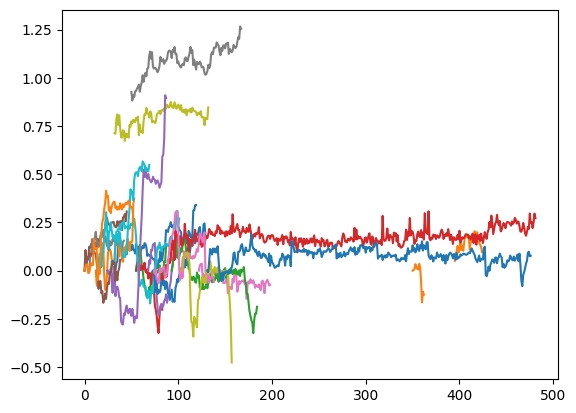

In [74]:
fig, ax = plt.subplots()

for i in range(len(deltatheta)):
    plt.plot(deltat[i], deltatheta[i], '-')

plt.show()

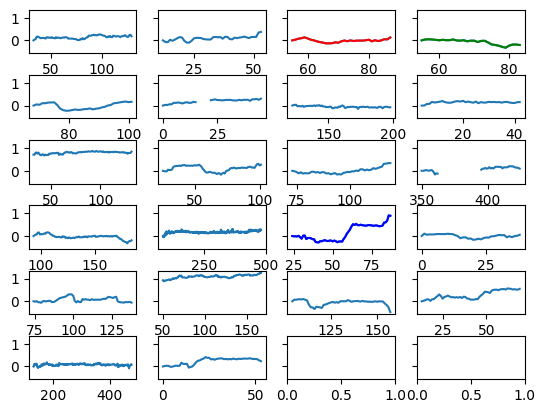

In [75]:
fig, axs = plt.subplots(nrows=6, ncols=4, sharey=True)
plt.subplots_adjust(hspace=0.5)

for i, ax in zip(range(len(deltatheta)), axs.ravel()):
    ax.plot(deltat[i], deltatheta[i])
    ax.set_xlabel("")
    
    if i == 2:
        ax.plot(deltat[i], deltatheta[i], 'r')
    elif i == 3:
        ax.plot(deltat[i], deltatheta[i], 'g')
    elif i == 14:
        ax.plot(deltat[i], deltatheta[i], 'b')

plt.show()

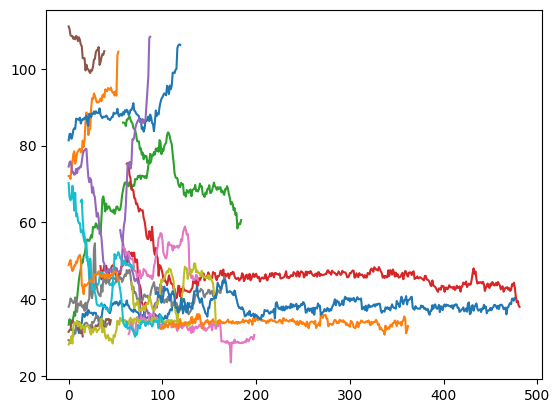

In [76]:
fig, ax = plt.subplots()

for i in range(len(currx)):
    plt.plot(deltat[i], currx[i], '-')

plt.show()

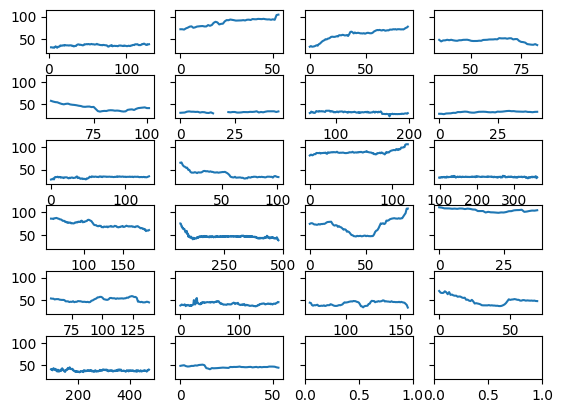

In [77]:
fig, axs = plt.subplots(nrows=6, ncols=4, sharey=True)
plt.subplots_adjust(hspace=0.5)

for i, ax in zip(range(len(currx)), axs.ravel()):
    ax.plot(deltat[i], currx[i])
    ax.set_xlabel("")

plt.show()

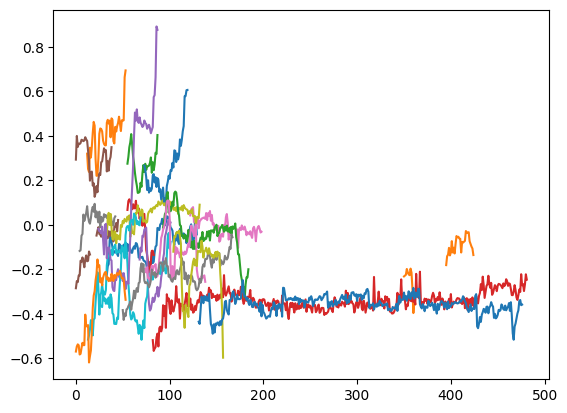

In [78]:
fig, ax = plt.subplots()

for i in range(len(currtheta)):
    plt.plot(deltat[i], currtheta[i], '-')

plt.show()

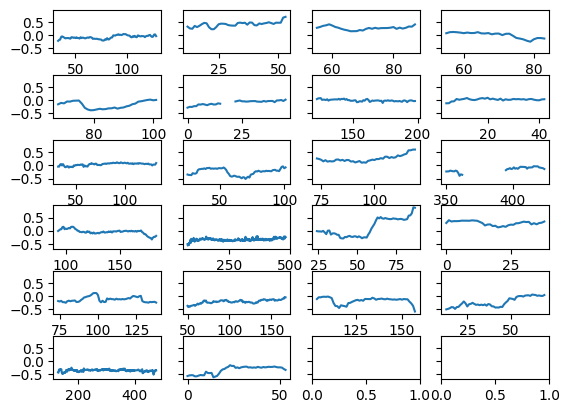

In [79]:
fig, axs = plt.subplots(nrows=6, ncols=4, sharey=True)
plt.subplots_adjust(hspace=0.5)

for i, ax in zip(range(len(currtheta)), axs.ravel()):
    ax.plot(deltat[i], currtheta[i])
    ax.set_xlabel("")

plt.show()

## Mirror

### Convert to mm

In [80]:
propercrossmirror_filt = propercross_raw.dropna(subset=["propercrossingnum"])
propercrossmirror_filt

front-x      front-y front-likelihood hind-x hind-y  \
1564            NaN          NaN      0.080431804    NaN    NaN   
1565            NaN          NaN      0.075876094    NaN    NaN   
1566            NaN          NaN      0.084233485    NaN    NaN   
1567    32.04304014  133.5924782      0.064634196    NaN    NaN   
1568    32.04304014  133.9466347      0.068593591    NaN    NaN   
...             ...          ...              ...    ...    ...   
165800          NaN          NaN      0.457501858    NaN    NaN   
165801          NaN          NaN      0.353731036    NaN    NaN   
165802          NaN          NaN      0.405120403    NaN    NaN   
165803          NaN          NaN      0.351577461    NaN    NaN   
165804          NaN          NaN      0.430632651    NaN    NaN   

       hind-likelihood L-eye-x L-eye-y L-eye-likelihood R-eye-x R-eye-y  \
1564       0.018670795     NaN     NaN      0.028555971     NaN     NaN   
1565       0.012955457     NaN     NaN      0.021956034     NaN     NaN   
1566        0.01276629     NaN     NaN      0.024493841     NaN     NaN   
1567       0.021290731     NaN     NaN      0.027759649     NaN     NaN   
1568       0.008062037     NaN     NaN      0.021540156     NaN     NaN   
...                ...     ...     ...              ...     ...     ...   
165800     0.012245837     NaN     NaN      0.278216571     NaN     NaN   
165801     0.009759804     NaN     NaN      0.182009846     NaN     NaN   
165802     0.011931336     NaN     NaN      0.270779759     NaN     NaN   
165803     0.010255333     NaN     NaN      0.176031873     NaN     NaN   
165804     0.009920823     NaN     NaN      0.218608171     NaN     NaN   

       R-eye-likelihood  side-filter  trial  avg-front-x  avg-front-y  angle  \
1564        0.136968076            0      3          NaN          NaN    NaN   
1565        0.105542578            0      3          NaN          NaN    NaN   
1566        0.139241323            0      3          NaN          NaN    NaN   
1567        0.155897945            0      3     32.04304   133.592478    NaN   
1568        0.112029254            0      3     32.04304   133.946635    NaN   
...                 ...          ...    ...          ...          ...    ...   
165800      0.480501026            1    158          NaN          NaN    NaN   
165801      0.434743762            1    158          NaN          NaN    NaN   
165802      0.455245584            1    158          NaN          NaN    NaN   
165803      0.489690542            1    158          NaN          NaN    NaN   
165804      0.393550038            1    158          NaN          NaN    NaN   

       propercrossingnum  
1564                   1  
1565                   1  
1566                   1  
1567                   1  
1568                   1  
...                  ...  
165800                23  
165801                23  
165802                23  
165803                23  
165804                23  

[10586 rows x 18 columns]

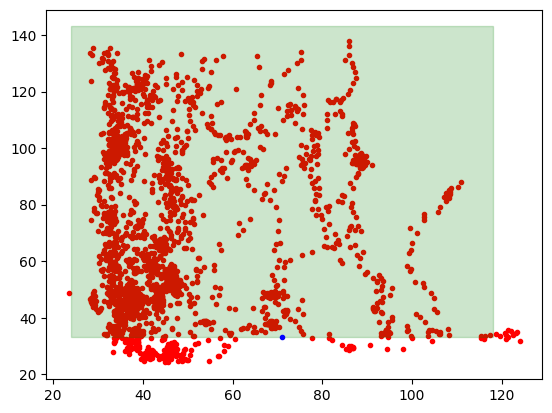

In [81]:
# left and right mirror (side) -- single cross

temp = propercrossmirror_filt #[(propercrossmirror_filt['avg-front-y']>100) & (propercrossmirror_filt['avg-front-y']<200)]
# print(temp)
fig, ax = plt.subplots()
plt.plot(temp["avg-front-x"], temp['avg-front-y'], 'r.')

# for i in range(len(cross_frames)):
#     plt.plot(float(leftMirror_noflip["front-x"].loc[cross_frames[i]]), float(leftMirror_noflip["front-y"].loc[cross_frames[i]]), '.', color=colors[i])
#     plt.plot(float(leftMirror_noflip["hind-x"].loc[cross_frames[i]]), float(leftMirror_noflip["hind-y"].loc[cross_frames[i]]), '.', color=colors[i])
#     plt.plot(float(leftMirror_noflip["L-eye-x"].loc[cross_frames[i]]), float(leftMirror_noflip["L-eye-y"].loc[cross_frames[i]]), '.', color=colors[i])
#     plt.plot(float(leftMirror_noflip["R-eye-x"].loc[cross_frames[i]]), float(leftMirror_noflip["R-eye-y"].loc[cross_frames[i]]), '.', color=colors[i])
# plt.plot(leftCorridor["front-x"][cross_frames], leftCorridor["front-y"][cross_frames], 'r.')

# circumvention
ax.add_patch(mpatches.Rectangle((24, 33), 94, 110, zorder=2, alpha=.2, color="green"))
plt.plot(71, 33,'.b')
plt.axis('on')
plt.show()

In [82]:
pTm = abs((319-262)/2) # from rect patches
print(pTm)
xb_prime = (71)/pTm
print(xb_prime)
yb_prime = (33)/pTm
print(yb_prime)

28.5
2.491228070175439
1.1578947368421053


In [83]:
propercrossmirror_filt["xprime"] = propercrossmirror_filt['avg-front-x']/pTm
propercrossmirror_filt["yprime"] = (propercrossmirror_filt['avg-front-y']/pTm)-yb_prime+2

propercrossmirror_filt["thetaxprime"] = (propercrossmirror_filt['avg-front-x']/pTm)-xb_prime
propercrossmirror_filt["thetayprime"] = (propercrossmirror_filt['avg-front-y']/pTm)-yb_prime+2
propercrossmirror_filt["thetaprime"] = np.arctan2(propercrossmirror_filt["thetaxprime"], propercrossmirror_filt["thetayprime"])

propercrossmirror_filt

C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\1472350627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propercrossmirror_filt["xprime"] = propercrossmirror_filt['avg-front-x']/pTm
C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\1472350627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propercrossmirror_filt["yprime"] = (propercrossmirror_filt['avg-front-y']/pTm)-yb_prime+2
C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\1472350627.py:4: SettingWithCopyWarning: 
A value is trying to be set

front-x      front-y front-likelihood hind-x hind-y  \
1564            NaN          NaN      0.080431804    NaN    NaN   
1565            NaN          NaN      0.075876094    NaN    NaN   
1566            NaN          NaN      0.084233485    NaN    NaN   
1567    32.04304014  133.5924782      0.064634196    NaN    NaN   
1568    32.04304014  133.9466347      0.068593591    NaN    NaN   
...             ...          ...              ...    ...    ...   
165800          NaN          NaN      0.457501858    NaN    NaN   
165801          NaN          NaN      0.353731036    NaN    NaN   
165802          NaN          NaN      0.405120403    NaN    NaN   
165803          NaN          NaN      0.351577461    NaN    NaN   
165804          NaN          NaN      0.430632651    NaN    NaN   

       hind-likelihood L-eye-x L-eye-y L-eye-likelihood R-eye-x  ... trial  \
1564       0.018670795     NaN     NaN      0.028555971     NaN  ...     3   
1565       0.012955457     NaN     NaN      0.021956034     NaN  ...     3   
1566        0.01276629     NaN     NaN      0.024493841     NaN  ...     3   
1567       0.021290731     NaN     NaN      0.027759649     NaN  ...     3   
1568       0.008062037     NaN     NaN      0.021540156     NaN  ...     3   
...                ...     ...     ...              ...     ...  ...   ...   
165800     0.012245837     NaN     NaN      0.278216571     NaN  ...   158   
165801     0.009759804     NaN     NaN      0.182009846     NaN  ...   158   
165802     0.011931336     NaN     NaN      0.270779759     NaN  ...   158   
165803     0.010255333     NaN     NaN      0.176031873     NaN  ...   158   
165804     0.009920823     NaN     NaN      0.218608171     NaN  ...   158   

       avg-front-x  avg-front-y  angle  propercrossingnum    xprime    yprime  \
1564           NaN          NaN    NaN                  1       NaN       NaN   
1565           NaN          NaN    NaN                  1       NaN       NaN   
1566           NaN          NaN    NaN                  1       NaN       NaN   
1567      32.04304   133.592478    NaN                  1  1.124317  5.529561   
1568      32.04304   133.946635    NaN                  1  1.124317  5.541987   
...            ...          ...    ...                ...       ...       ...   
165800         NaN          NaN    NaN                 23       NaN       NaN   
165801         NaN          NaN    NaN                 23       NaN       NaN   
165802         NaN          NaN    NaN                 23       NaN       NaN   
165803         NaN          NaN    NaN                 23       NaN       NaN   
165804         NaN          NaN    NaN                 23       NaN       NaN   

       thetaxprime  thetayprime  thetaprime  
1564           NaN          NaN         NaN  
1565           NaN          NaN         NaN  
1566           NaN          NaN         NaN  
1567     -1.366911     5.529561   -0.242342  
1568     -1.366911     5.541987   -0.241820  
...            ...          ...         ...  
165800         NaN          NaN         NaN  
165801         NaN          NaN         NaN  
165802         NaN          NaN         NaN  
165803         NaN          NaN         NaN  
165804         NaN          NaN         NaN  

[10586 rows x 23 columns]

### Perform parallax calculation

In [84]:
rdot = []; dhat = []

group = propercrossmirror_filt
for i in range(len(list(group.index))-1):

    rdot.append(abs((group['xprime'].iloc[i+1] - group['xprime'].iloc[i])/((list(group.index)[i+1] - list(group.index)[i])/120)))
    dhat.append((group['yprime'].iloc[i+1] + group['yprime'].iloc[i])/2)

    if i == len(list(group.index))-2:
        rdot.append(np.nan) ; dhat.append(np.nan)
            
propercrossmirror_filt['rdot'] = rdot
propercrossmirror_filt['dhat'] = dhat
propercrossmirror_filt['parallax'] = [rdot[i]/dhat[i] for i in range(len(rdot))]

C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\1421506841.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propercrossmirror_filt['rdot'] = rdot
C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\1421506841.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propercrossmirror_filt['dhat'] = dhat
C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\1421506841.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [85]:
# rdot = [] ; dhat = []
# groups = propercrossmirror_filt.groupby("propercrossingnum")
# for _, group in groups:
#     rdot_single = []
#     dhat_single = []
#     for i in range(len(list(group.index))-1):
#         rdot_single.append((group['xprime'].iloc[i+1] - group['xprime'].iloc[i])/(list(group.index)[i+1] - list(group.index)[i]))
#         dhat_single.append((group['yprime'].iloc[i+1] + group['yprime'].iloc[i])/2)
#     rdot_single.append(np.nan) ; dhat_single.append(np.nan)
#     rdot += rdot_single ; dhat += dhat_single
    
# propercrossmirror_filt['rdot'] = rdot
# propercrossmirror_filt['dhat'] = dhat
# propercrossmirror_filt['parallax'] = [rdot[i]/dhat[i] for i in range(len(rdot))]

In [86]:
propercrossmirror_filt[propercrossmirror_filt["propercrossingnum"] == '1']

front-x      front-y front-likelihood hind-x hind-y hind-likelihood  \
1564          NaN          NaN      0.080431804    NaN    NaN     0.018670795   
1565          NaN          NaN      0.075876094    NaN    NaN     0.012955457   
1566          NaN          NaN      0.084233485    NaN    NaN      0.01276629   
1567  32.04304014  133.5924782      0.064634196    NaN    NaN     0.021290731   
1568  32.04304014  133.9466347      0.068593591    NaN    NaN     0.008062037   
...           ...          ...              ...    ...    ...             ...   
1970          NaN          NaN      0.082322523    NaN    NaN     0.080590114   
1971          NaN          NaN      0.076176621    NaN    NaN     0.018134711   
1972          NaN          NaN      0.080865249    NaN    NaN     0.119298205   
1973          NaN          NaN      0.101529099    NaN    NaN      0.01493827   
1974          NaN          NaN      0.075943619    NaN    NaN     0.012614487   

     L-eye-x L-eye-y L-eye-likelihood R-eye-x  ... angle propercrossingnum  \
1564     NaN     NaN      0.028555971     NaN  ...   NaN                 1   
1565     NaN     NaN      0.021956034     NaN  ...   NaN                 1   
1566     NaN     NaN      0.024493841     NaN  ...   NaN                 1   
1567     NaN     NaN      0.027759649     NaN  ...   NaN                 1   
1568     NaN     NaN      0.021540156     NaN  ...   NaN                 1   
...      ...     ...              ...     ...  ...   ...               ...   
1970     NaN     NaN      0.024197651     NaN  ...   NaN                 1   
1971     NaN     NaN      0.025701912     NaN  ...   NaN                 1   
1972     NaN     NaN      0.021125631     NaN  ...   NaN                 1   
1973     NaN     NaN      0.032418519     NaN  ...   NaN                 1   
1974     NaN     NaN      0.026908362     NaN  ...   NaN                 1   

        xprime    yprime  thetaxprime  thetayprime  thetaprime     rdot  \
1564       NaN       NaN          NaN          NaN         NaN      NaN   
1565       NaN       NaN          NaN          NaN         NaN      NaN   
1566       NaN       NaN          NaN          NaN         NaN      NaN   
1567  1.124317  5.529561    -1.366911     5.529561   -0.242342  0.00000   
1568  1.124317  5.541987    -1.366911     5.541987   -0.241820  2.98237   
...        ...       ...          ...          ...         ...      ...   
1970       NaN       NaN          NaN          NaN         NaN      NaN   
1971       NaN       NaN          NaN          NaN         NaN      NaN   
1972       NaN       NaN          NaN          NaN         NaN      NaN   
1973       NaN       NaN          NaN          NaN         NaN      NaN   
1974       NaN       NaN          NaN          NaN         NaN      NaN   

          dhat  parallax  
1564       NaN       NaN  
1565       NaN       NaN  
1566       NaN       NaN  
1567  5.535774  0.000000  
1568  5.535774  0.538745  
...        ...       ...  
1970       NaN       NaN  
1971       NaN       NaN  
1972       NaN       NaN  
1973       NaN       NaN  
1974       NaN       NaN  

[411 rows x 26 columns]

In [87]:
propercrossmirror_filt[propercrossmirror_filt["propercrossingnum"] == '2']

front-x      front-y front-likelihood hind-x hind-y hind-likelihood  \
5789  73.68919872  111.3774653       0.99644804    NaN    NaN     0.015907943   
5790  74.30182855  108.9662515      0.996080935    NaN    NaN     0.023807319   
5791  72.62282147  106.7090232      0.996961415    NaN    NaN     0.020805813   
5792  75.58742633  107.0996585      0.997970641    NaN    NaN     0.046301585   
5793  78.11086415  104.9158684       0.99615258    NaN    NaN     0.054929912   
...           ...          ...              ...    ...    ...             ...   
6043          NaN          NaN       0.07255125    NaN    NaN     0.015770361   
6044          NaN          NaN      0.080452658    NaN    NaN     0.023513509   
6045          NaN          NaN      0.099815331    NaN    NaN     0.023470191   
6046          NaN          NaN      0.065091662    NaN    NaN     0.010523429   
6047          NaN          NaN      0.069879554    NaN    NaN      0.01924004   

          L-eye-x      L-eye-y L-eye-likelihood      R-eye-x  ... angle  \
5789  63.60866857  111.7329347      0.995160103   78.8559453  ...   NaN   
5790  63.21510911  110.0147901       0.99230963  78.66105571  ...   NaN   
5791   62.5259943  108.7347069      0.994241297  78.75330221  ...   NaN   
5792  66.39571491  107.3196942      0.993944883  79.91006139  ...   NaN   
5793  65.80890751  105.6261652      0.998520136   82.8616953  ...   NaN   
...           ...          ...              ...          ...  ...   ...   
6043          NaN          NaN      0.026273483          NaN  ...   NaN   
6044          NaN          NaN      0.025881097          NaN  ...   NaN   
6045          NaN          NaN      0.030968791          NaN  ...   NaN   
6046          NaN          NaN      0.019461328          NaN  ...   NaN   
6047          NaN          NaN      0.025147827          NaN  ...   NaN   

     propercrossingnum    xprime    yprime  thetaxprime  thetayprime  \
5789                 2  2.528115  4.815308     0.036887     4.815308   
5790                 2  2.528398  4.754752     0.037170     4.754752   
5791                 2  2.501779  4.697456     0.010551     4.697456   
5792                 2  2.595242  4.662142     0.104014     4.662142   
5793                 2  2.652415  4.589953     0.161187     4.589953   
...                ...       ...       ...          ...          ...   
6043                 2       NaN       NaN          NaN          NaN   
6044                 2       NaN       NaN          NaN          NaN   
6045                 2       NaN       NaN          NaN          NaN   
6046                 2       NaN       NaN          NaN          NaN   
6047                 2       NaN       NaN          NaN          NaN   

      thetaprime       rdot      dhat  parallax  
5789    0.007660   0.033938  4.785030  0.007093  
5790    0.007817   3.194211  4.726104  0.675866  
5791    0.002246  11.215557  4.679799  2.396590  
5792    0.022307   6.860722  4.626047  1.483064  
5793    0.035103   9.319055  4.551847  2.047313  
...          ...        ...       ...       ...  
6043         NaN        NaN       NaN       NaN  
6044         NaN        NaN       NaN       NaN  
6045         NaN        NaN       NaN       NaN  
6046         NaN        NaN       NaN       NaN  
6047         NaN        NaN       NaN       NaN  

[259 rows x 26 columns]

In [88]:
np.nanmax(propercrossmirror_filt['parallax'])

21.658159565972955

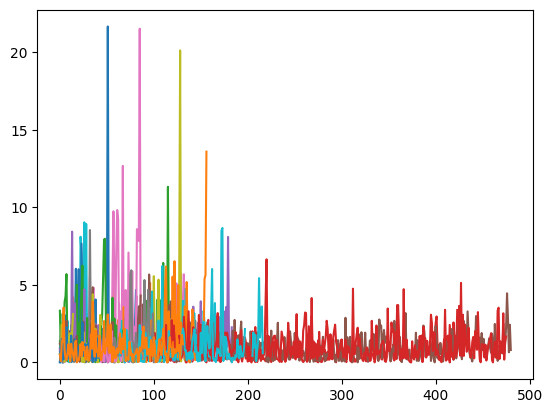

In [89]:
fig, ax = plt.subplots()
parallax_mirror = []

groups = propercrossmirror_filt.groupby("propercrossingnum")
for _, group in groups:
    plt.plot(list(group.index-list(group.index)[0]), group['parallax'].to_list(), '-')
    parallax_mirror.append(np.nanmax(group['parallax']))

plt.show()

In [90]:
parallax_mirror

[4.678075691805059,
 5.126150879066253,
 11.323299360748566,
 3.698229827491986,
 8.091327487890268,
 5.670001659256376,
 21.511744228303012,
 8.536264453029414,
 20.116251299197163,
 9.033468340467387,
 21.658159565972955,
 13.59060122929316,
 7.9759229309698725,
 6.6482675291562146,
 8.43433212218631,
 4.848719182451517,
 7.085088342067145,
 5.939641529297275,
 4.397222567223831,
 8.670809117116159,
 2.584942923108659,
 3.92471686387339]

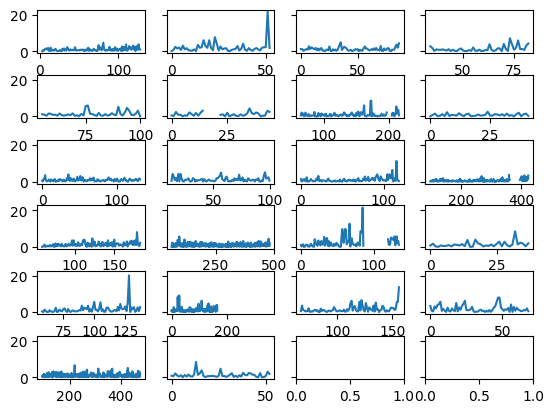

In [91]:
fig, axs = plt.subplots(nrows=6, ncols=4, sharey=True)
plt.subplots_adjust(hspace=0.5)

total = list(propercrossmirror_filt["propercrossingnum"].unique())

for idx, ax in zip(range(len(total)), axs.ravel()):
    i = propercrossmirror_filt["propercrossingnum"].unique()[idx]
    group = propercrossmirror_filt[propercrossmirror_filt['propercrossingnum'] == i]
#     group = group[(group['avg-front-y']<500) & (group['avg-front-y']>320)]
    ax.plot(list(group.index-list(group.index)[0]), group['parallax'].to_list(), '-')
    ax.set_xlabel("")

plt.show()

### Compute theta prime

In [92]:
thetaprime = []
thetaprimet = []

total = list(propercrossmirror_filt["propercrossingnum"].unique())

for idx, ax in zip(range(len(total)), axs.ravel()):
    i = propercrossmirror_filt["propercrossingnum"].unique()[idx]
    group = propercrossmirror_filt[propercrossmirror_filt['propercrossingnum'] == i]
    thetaprime.append(group['thetaprime'].to_list())
    thetaprimet.append(list(group.index-list(group.index)[0]))
    
thetaprime = filter_seq(thetaprime)

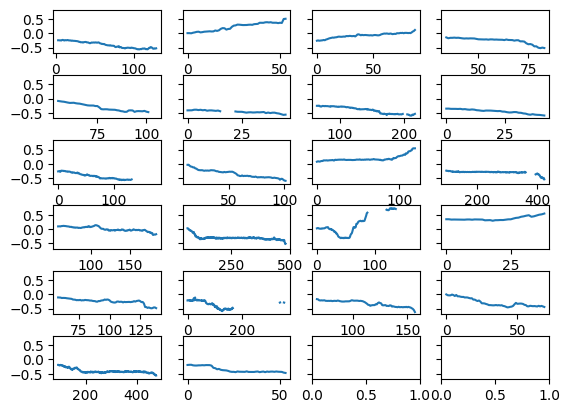

In [93]:
fig, axs = plt.subplots(nrows=6, ncols=4, sharey=True)
plt.subplots_adjust(hspace=0.5)

total = list(propercrossmirror_filt["propercrossingnum"].unique())

for idx, ax in zip(range(len(total)), axs.ravel()):
    i = propercrossmirror_filt["propercrossingnum"].unique()[idx]
    group = propercrossmirror_filt[propercrossmirror_filt['propercrossingnum'] == i]
#     group = group[(group['avg-front-y']<500) & (group['avg-front-y']>320)]
    ax.plot(list(group.index-list(group.index)[0]), group['thetaprime'].to_list(), '-')
    ax.set_xlabel("")

plt.show()

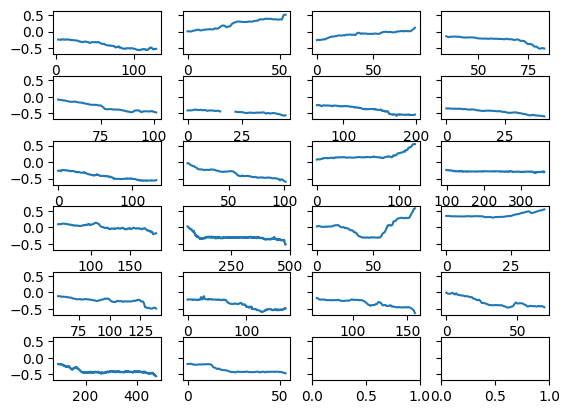

In [94]:
fig, axs = plt.subplots(nrows=6, ncols=4, sharey=True)
plt.subplots_adjust(hspace=0.5)

for i, ax in zip(range(len(thetaprime)), axs.ravel()):
    ax.plot(thetaprimet[i], thetaprime[i])
    ax.set_xlabel("")

plt.show()

In [95]:
deltathetaprime_mirror = []
for i in thetaprime:
    deltathetaprime_mirror.append(np.nanmax(i)-np.nanmin(i))
    
deltathetaprime_mirror

[0.3341184685078814,
 0.5093771655923394,
 0.3765268182928539,
 0.37720065673087755,
 0.39120950901039253,
 0.18175105735994868,
 0.33240497532367164,
 0.2420231148246444,
 0.3327242976888367,
 0.5627214831312568,
 0.47038406896111434,
 0.08885723732472284,
 0.3435960802004658,
 0.5555326753023938,
 0.8946762327859422,
 0.2524818911571916,
 0.3817237396327905,
 0.4786614353400254,
 0.45380795868966106,
 0.4548823322506686,
 0.3790122193371893,
 0.28718595768647315]

## Corridor

### Convert to mm

In [96]:
propercrosscorr_filt = leftCorridor_noflip.copy(deep=True)
propercrosscorr_filt = propercrosscorr_filt.assign(propercrossingnum=propercross_raw["propercrossingnum"])
propercrosscorr_filt = propercrosscorr_filt.dropna(subset=["propercrossingnum"])
propercrosscorr_filt

front-x     front-y  front-likelihood      hind-x      hind-y  \
1564    170.242027  422.718702          0.999162  164.722463  470.757762   
1565    170.817982  420.798955          0.999425  164.885475  469.585648   
1566    170.722694  418.168017          0.999043  164.266207  468.517800   
1567    172.241365  419.272610          0.999083  163.954340  468.989110   
1568    171.256523  418.805979          0.999056  163.501126  468.537823   
...            ...         ...               ...         ...         ...   
165800  159.723870   88.559461          0.998845  149.275330  134.909096   
165801  159.867132   87.334769          0.998878  149.017532  134.088626   
165802  159.977430   86.908212          0.998847  148.692302  133.785080   
165803  160.834157   86.401219          0.998843  149.360612  133.158164   
165804  160.663254   85.276922          0.998760  151.418328  133.338464   

        hind-likelihood  side-filter  trial front-state hind-state  \
1564           0.999094            0      3           3          3   
1565           0.999436            0      3           3          3   
1566           0.999381            0      3           3          3   
1567           0.999410            0      3           3          3   
1568           0.999456            0      3           3          3   
...                 ...          ...    ...         ...        ...   
165800         0.999391            1    158           1          1   
165801         0.999520            1    158           1          1   
165802         0.999576            1    158           1          1   
165803         0.999508            1    158           1          1   
165804         0.999467            1    158           1          1   

       crossing-type propercrossingnum  
1564           cross                 1  
1565           cross                 1  
1566           cross                 1  
1567           cross                 1  
1568           cross                 1  
...              ...               ...  
165800         cross                23  
165801         cross                23  
165802         cross                23  
165803         cross                23  
165804         cross                23  

[10586 rows x 12 columns]

In [97]:
pTm = abs((319-262)/2) # from rect patches
print(pTm)
yb_prime = (319)/pTm
print(yb_prime)

28.5
11.192982456140351


In [98]:
propercrosscorr_filt["xprime"] = propercrosscorr_filt['front-x']/pTm
propercrosscorr_filt["yprime"] = (propercrosscorr_filt['front-y']/pTm)-yb_prime+2
propercrosscorr_filt

front-x     front-y  front-likelihood      hind-x      hind-y  \
1564    170.242027  422.718702          0.999162  164.722463  470.757762   
1565    170.817982  420.798955          0.999425  164.885475  469.585648   
1566    170.722694  418.168017          0.999043  164.266207  468.517800   
1567    172.241365  419.272610          0.999083  163.954340  468.989110   
1568    171.256523  418.805979          0.999056  163.501126  468.537823   
...            ...         ...               ...         ...         ...   
165800  159.723870   88.559461          0.998845  149.275330  134.909096   
165801  159.867132   87.334769          0.998878  149.017532  134.088626   
165802  159.977430   86.908212          0.998847  148.692302  133.785080   
165803  160.834157   86.401219          0.998843  149.360612  133.158164   
165804  160.663254   85.276922          0.998760  151.418328  133.338464   

        hind-likelihood  side-filter  trial front-state hind-state  \
1564           0.999094            0      3           3          3   
1565           0.999436            0      3           3          3   
1566           0.999381            0      3           3          3   
1567           0.999410            0      3           3          3   
1568           0.999456            0      3           3          3   
...                 ...          ...    ...         ...        ...   
165800         0.999391            1    158           1          1   
165801         0.999520            1    158           1          1   
165802         0.999576            1    158           1          1   
165803         0.999508            1    158           1          1   
165804         0.999467            1    158           1          1   

       crossing-type propercrossingnum    xprime    yprime  
1564           cross                 1  5.973404  5.639253  
1565           cross                 1  5.993613  5.571893  
1566           cross                 1  5.990270  5.479580  
1567           cross                 1  6.043557  5.518337  
1568           cross                 1  6.009001  5.501964  
...              ...               ...       ...       ...  
165800         cross                23  5.604346 -6.085633  
165801         cross                23  5.609373 -6.128605  
165802         cross                23  5.613243 -6.143572  
165803         cross                23  5.643304 -6.161361  
165804         cross                23  5.637307 -6.200810  

[10586 rows x 14 columns]

In [99]:
rdot = []; dhat = []

group = propercrosscorr_filt
for i in range(len(list(group.index))-1):

    rdot.append(abs((group['xprime'].iloc[i+1] - group['xprime'].iloc[i])/((list(group.index)[i+1] - list(group.index)[i])/120)))
    dhat.append((group['yprime'].iloc[i+1] + group['yprime'].iloc[i])/2)

    if i == len(list(group.index))-2:
        rdot.append(np.nan) ; dhat.append(np.nan)
            
propercrosscorr_filt['rdot'] = rdot
propercrosscorr_filt['dhat'] = dhat
propercrosscorr_filt['parallax'] = [rdot[i]/dhat[i] for i in range(len(rdot))]

In [100]:
rdot[411]

2.1239120000000256

In [101]:
propercrosscorr_filt

front-x     front-y  front-likelihood      hind-x      hind-y  \
1564    170.242027  422.718702          0.999162  164.722463  470.757762   
1565    170.817982  420.798955          0.999425  164.885475  469.585648   
1566    170.722694  418.168017          0.999043  164.266207  468.517800   
1567    172.241365  419.272610          0.999083  163.954340  468.989110   
1568    171.256523  418.805979          0.999056  163.501126  468.537823   
...            ...         ...               ...         ...         ...   
165800  159.723870   88.559461          0.998845  149.275330  134.909096   
165801  159.867132   87.334769          0.998878  149.017532  134.088626   
165802  159.977430   86.908212          0.998847  148.692302  133.785080   
165803  160.834157   86.401219          0.998843  149.360612  133.158164   
165804  160.663254   85.276922          0.998760  151.418328  133.338464   

        hind-likelihood  side-filter  trial front-state hind-state  \
1564           0.999094            0      3           3          3   
1565           0.999436            0      3           3          3   
1566           0.999381            0      3           3          3   
1567           0.999410            0      3           3          3   
1568           0.999456            0      3           3          3   
...                 ...          ...    ...         ...        ...   
165800         0.999391            1    158           1          1   
165801         0.999520            1    158           1          1   
165802         0.999576            1    158           1          1   
165803         0.999508            1    158           1          1   
165804         0.999467            1    158           1          1   

       crossing-type propercrossingnum    xprime    yprime      rdot  \
1564           cross                 1  5.973404  5.639253  2.425077   
1565           cross                 1  5.993613  5.571893  0.401213   
1566           cross                 1  5.990270  5.479580  6.394403   
1567           cross                 1  6.043557  5.518337  4.146701   
1568           cross                 1  6.009001  5.501964  1.192559   
...              ...               ...       ...       ...       ...   
165800         cross                23  5.604346 -6.085633  0.603210   
165801         cross                23  5.609373 -6.128605  0.464413   
165802         cross                23  5.613243 -6.143572  3.607271   
165803         cross                23  5.643304 -6.161361  0.719591   
165804         cross                23  5.637307 -6.200810       NaN   

            dhat  parallax  
1564    5.605573  0.432619  
1565    5.525736  0.072608  
1566    5.498958  1.162839  
1567    5.510151  0.752557  
1568    5.504720  0.216643  
...          ...       ...  
165800 -6.107119 -0.098772  
165801 -6.136088 -0.075686  
165802 -6.152466 -0.586313  
165803 -6.181085 -0.116418  
165804       NaN       NaN  

[10586 rows x 17 columns]

In [102]:
propercrosscorr_filt[propercrosscorr_filt['propercrossingnum']=='1']

front-x     front-y  front-likelihood      hind-x      hind-y  \
1564  170.242027  422.718702          0.999162  164.722463  470.757762   
1565  170.817982  420.798955          0.999425  164.885475  469.585648   
1566  170.722694  418.168017          0.999043  164.266207  468.517800   
1567  172.241365  419.272610          0.999083  163.954340  468.989110   
1568  171.256523  418.805979          0.999056  163.501126  468.537823   
...          ...         ...               ...         ...         ...   
1970  158.092596   87.695951          0.999012  155.960634  137.781099   
1971  158.537795   87.601349          0.999103  156.163223  137.868061   
1972  158.621666   87.046951          0.999148  155.704649  136.968760   
1973  158.445567   86.738890          0.999166  155.775465  136.950450   
1974  157.869594   86.637833          0.999188  155.469413  136.431185   

      hind-likelihood  side-filter  trial front-state hind-state  \
1564         0.999094            0      3           3          3   
1565         0.999436            0      3           3          3   
1566         0.999381            0      3           3          3   
1567         0.999410            0      3           3          3   
1568         0.999456            0      3           3          3   
...               ...          ...    ...         ...        ...   
1970         0.999024            0      3           1          1   
1971         0.999106            0      3           1          1   
1972         0.999336            0      3           1          1   
1973         0.999382            0      3           1          1   
1974         0.999454            0      3           1          1   

     crossing-type propercrossingnum    xprime    yprime      rdot      dhat  \
1564         cross                 1  5.973404  5.639253  2.425077  5.605573   
1565         cross                 1  5.993613  5.571893  0.401213  5.525736   
1566         cross                 1  5.990270  5.479580  6.394403  5.498958   
1567         cross                 1  6.043557  5.518337  4.146701  5.510151   
1568         cross                 1  6.009001  5.501964  1.192559  5.504720   
...            ...               ...       ...       ...       ...       ...   
1970         cross                 1  5.547109 -6.115932  1.874522 -6.117591   
1971         cross                 1  5.562730 -6.119251  0.353142 -6.128977   
1972         cross                 1  5.565673 -6.138703  0.741471 -6.144108   
1973         cross                 1  5.559494 -6.149513  2.425150 -6.151286   
1974         cross                 1  5.539284 -6.153059  0.004156 -0.723496   

      parallax  
1564  0.432619  
1565  0.072608  
1566  1.162839  
1567  0.752557  
1568  0.216643  
...        ...  
1970 -0.306415  
1971 -0.057618  
1972 -0.120680  
1973 -0.394251  
1974 -0.005744  

[411 rows x 17 columns]

In [103]:
propercrosscorr_filt[propercrosscorr_filt['propercrossingnum']=='2']

front-x     front-y  front-likelihood      hind-x      hind-y  \
5789  161.634740  396.122918          0.998894  156.723492  442.114326   
5790  161.130311  393.456853          0.998735  156.886378  439.853522   
5791  161.551392  391.517920          0.998510  157.242061  438.468001   
5792  160.695618  390.907762          0.998556  157.351609  438.278706   
5793  161.708311  389.951318          0.998152  158.328827  435.607879   
...          ...         ...               ...         ...         ...   
6043  158.753695   90.693196          0.999334  158.930284  147.500961   
6044  157.243180   90.844176          0.999368  158.816315  146.780776   
6045  156.946758   89.636456          0.999144  157.894568  144.766268   
6046  157.689734   87.545040          0.999004  158.923860  140.464427   
6047  158.631406   85.683742          0.998956  157.217319  137.867806   

      hind-likelihood  side-filter  trial front-state hind-state  \
5789         0.998412            0      7           3          3   
5790         0.999430            0      7           3          3   
5791         0.999373            0      7           3          3   
5792         0.999435            0      7           3          3   
5793         0.998888            0      7           3          3   
...               ...          ...    ...         ...        ...   
6043         0.999279            0      7           1          1   
6044         0.999138            0      7           1          1   
6045         0.998909            0      7           1          1   
6046         0.999534            0      7           1          1   
6047         0.998947            0      7           1          1   

     crossing-type propercrossingnum    xprime    yprime      rdot      dhat  \
5789         cross                 2  5.671394  4.706067  2.123912  4.659294   
5790         cross                 2  5.653695  4.612521  1.772971  4.578505   
5791         cross                 2  5.668470  4.544488  3.603259  4.533784   
5792         cross                 2  5.638443  4.523079  4.263971  4.506300   
5793         cross                 2  5.673976  4.489520  3.688987  4.450780   
...            ...               ...       ...       ...       ...       ...   
6043         cross                 2  5.570305 -6.010765  6.360062 -6.008116   
6044         cross                 2  5.517305 -6.005468  1.248095 -6.026656   
6045         cross                 2  5.506904 -6.047844  3.128322 -6.084535   
6046         cross                 2  5.532973 -6.121227  3.964933 -6.153881   
6047         cross                 2  5.566014 -6.186535  0.007419 -0.724555   

      parallax  
5789  0.455844  
5790  0.387238  
5791  0.794758  
5792  0.946224  
5793  0.828841  
...        ...  
6043 -1.058578  
6044 -0.207096  
6045 -0.514143  
6046 -0.644298  
6047 -0.010239  

[259 rows x 17 columns]

In [104]:
for i in [eval(val) for val in propercrosscorr_filt['propercrossingnum'].unique()]:
    temp = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum']==str(i)].iloc[-1].name
    propercrosscorr_filt['rdot'].loc[int(temp)] = np.nan
    propercrosscorr_filt['dhat'].loc[int(temp)] = np.nan
    propercrosscorr_filt['parallax'].loc[int(temp)] = np.nan

C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\2330277159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propercrosscorr_filt['rdot'].loc[int(temp)] = np.nan
C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\2330277159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propercrosscorr_filt['dhat'].loc[int(temp)] = np.nan
C:\Users\yalec\AppData\Local\Temp\ipykernel_38732\2330277159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [105]:
propercrosscorr_filt[propercrosscorr_filt['propercrossingnum']=='3']

front-x     front-y  front-likelihood      hind-x      hind-y  \
12127  169.343758  397.016634          0.996051  155.112422  444.585570   
12128  169.254651  398.747653          0.996356  155.266415  445.405379   
12129  169.018239  399.060620          0.996078  155.294624  444.513594   
12130  169.581305  400.244741          0.997615  155.462871  445.479601   
12131  169.256617  400.501497          0.997469  155.380027  444.767613   
...           ...         ...               ...         ...         ...   
12436  170.104494   86.515953          0.999012  157.658900  136.917575   
12437  170.822563   86.619658          0.999284  157.801805  137.136700   
12438  170.683209   85.848012          0.999122  157.096829  135.568173   
12439  170.592717   85.216726          0.999078  157.728617  135.299859   
12440  171.237655   85.857499          0.999086  157.480653  134.971497   

       hind-likelihood  side-filter  trial front-state hind-state  \
12127         0.999062            0     13           3          3   
12128         0.998949            0     13           3          3   
12129         0.999026            0     13           3          3   
12130         0.998920            0     13           3          3   
12131         0.998874            0     13           3          3   
...                ...          ...    ...         ...        ...   
12436         0.999463            0     13           1          1   
12437         0.999479            0     13           1          1   
12438         0.999609            0     13           1          1   
12439         0.999615            0     13           1          1   
12440         0.999653            0     13           1          1   

      crossing-type propercrossingnum    xprime    yprime       rdot  \
12127         cross                 3  5.941886  4.737426   0.375187   
12128         cross                 3  5.938760  4.798163   0.995420   
12129         cross                 3  5.930465  4.809145   2.370803   
12130         cross                 3  5.950221  4.850693   1.367107   
12131         cross                 3  5.938829  4.859702  13.098267   
...             ...               ...       ...       ...        ...   
12436         cross                 3  5.968579 -6.157335   3.023448   
12437         cross                 3  5.993774 -6.153696   0.586753   
12438         cross                 3  5.988885 -6.180772   0.381021   
12439         cross                 3  5.985709 -6.202922   2.715528   
12440         cross                 3  6.008339 -6.180439        NaN   

           dhat  parallax  
12127  4.767795  0.078692  
12128  4.803654  0.207221  
12129  4.829919  0.490858  
12130  4.855197  0.281576  
12131  4.839586  2.706485  
...         ...       ...  
12436 -6.155516 -0.491177  
12437 -6.167234 -0.095140  
12438 -6.191847 -0.061536  
12439 -6.191680 -0.438577  
12440       NaN       NaN  

[314 rows x 17 columns]

In [106]:
print(list(propercrosscorr_filt["propercrossingnum"].unique()))
group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == '3']
group = group[(group['front-y']<500) & (group['front-y']>320)]
for i in range(len(group)-1):
    print(i)
    print(group['yprime'].iloc[i+1])
    print(group['yprime'].iloc[i])
    print((group['yprime'].iloc[i+1] + group['yprime'].iloc[i])/2)
min(group["dhat"].to_list())
display(group)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '20', '21', '22', '23']
0
4.798163263157894
4.737425761403509
4.767794512280702
1
4.8091445543859646
4.798163263157894
4.803653908771929
2
4.850692666666665
4.8091445543859646
4.829918610526315
3
4.859701642105263
4.850692666666665
4.855197154385964
4
4.81946983508772
4.859701642105263
4.839585738596491
5
4.859930866666668
4.81946983508772
4.839700350877194
6
4.854527957894737
4.859930866666668
4.857229412280702
7
4.882674059649121
4.854527957894737
4.868601008771929
8
4.913517459649123
4.882674059649121
4.898095759649122
9
4.915831056140352
4.913517459649123
4.914674257894737
10
4.910528301754384
4.915831056140352
4.913179678947368
11
4.884389014035088
4.910528301754384
4.897458657894736
12
4.831962249122807
4.884389014035088
4.8581756315789475
13
4.795289157894738
4.831962249122807
4.813625703508772
14
4.650265880701754
4.795289157894738
4.722777519298246
15
4.589017498245616
4.6502658

front-x     front-y  front-likelihood      hind-x      hind-y  \
12127  169.343758  397.016634          0.996051  155.112422  444.585570   
12128  169.254651  398.747653          0.996356  155.266415  445.405379   
12129  169.018239  399.060620          0.996078  155.294624  444.513594   
12130  169.581305  400.244741          0.997615  155.462871  445.479601   
12131  169.256617  400.501497          0.997469  155.380027  444.767613   
...           ...         ...               ...         ...         ...   
12207  168.122606  323.321391          0.999504  156.374178  371.667542   
12208  168.386174  323.353994          0.999536  156.640798  372.145801   
12209  168.684441  323.393831          0.999540  156.223135  372.084557   
12210  168.504540  321.758658          0.999464  156.574888  370.603546   
12211  168.615172  320.749643          0.999388  156.301151  369.867369   

       hind-likelihood  side-filter  trial front-state hind-state  \
12127         0.999062            0     13           3          3   
12128         0.998949            0     13           3          3   
12129         0.999026            0     13           3          3   
12130         0.998920            0     13           3          3   
12131         0.998874            0     13           3          3   
...                ...          ...    ...         ...        ...   
12207         0.999729            0     13           3          3   
12208         0.999745            0     13           3          3   
12209         0.999753            0     13           3          3   
12210         0.999665            0     13           3          3   
12211         0.999528            0     13           3          3   

      crossing-type propercrossingnum    xprime    yprime       rdot  \
12127         cross                 3  5.941886  4.737426   0.375187   
12128         cross                 3  5.938760  4.798163   0.995420   
12129         cross                 3  5.930465  4.809145   2.370803   
12130         cross                 3  5.950221  4.850693   1.367107   
12131         cross                 3  5.938829  4.859702  13.098267   
...             ...               ...       ...       ...        ...   
12207         cross                 3  5.899039  2.151628   1.109759   
12208         cross                 3  5.908287  2.152772   1.255864   
12209         cross                 3  5.918752  2.154170   0.757478   
12210         cross                 3  5.912440  2.096795   0.465818   
12211         cross                 3  5.916322  2.061391   5.469039   

           dhat  parallax  
12127  4.767795  0.078692  
12128  4.803654  0.207221  
12129  4.829919  0.490858  
12130  4.855197  0.281576  
12131  4.839586  2.706485  
...         ...       ...  
12207  2.152200  0.515639  
12208  2.153471  0.583182  
12209  2.125482  0.356380  
12210  2.079093  0.224049  
12211  2.008440  2.723028  

[85 rows x 17 columns]

In [107]:
group["rdot"].min()

0.01706189473694053

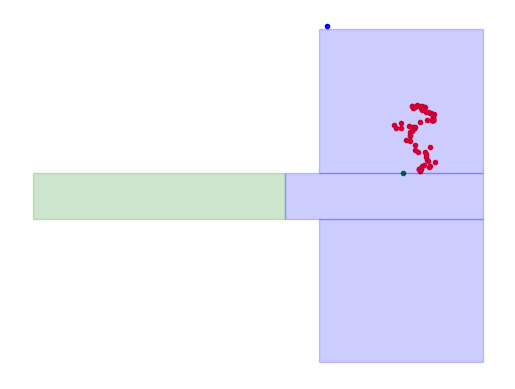

In [108]:
# left and right corridor (front) -- crossing only
# temp = propercrosscorr_filt[(propercrosscorr_filt['front-y']>280) & (propercrosscorr_filt['front-y']<350)]
# temp = propercrosscorr_filt
fig, ax = plt.subplots()
# print(temp.iloc[:50])
group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == '3']
group = group[(group['front-y']<500) & (group['front-y']>320)]
plt.plot(group["front-x"], group['front-y'], 'r.')
# plt.plot(130,300,'g.')
plt.plot(133, 500, 'b.')
plt.plot(162, 319, 'g.')
# circumvention
ax.add_patch(mpatches.Rectangle((20, 262), 97, 57, zorder=2, alpha=.2, color="green"))
# cross
ax.add_patch(mpatches.Rectangle((117, 262), 76, 57, zorder=2, alpha=.2, color="blue"))
# approaching gap
ax.add_patch(mpatches.Rectangle((130, 85), 63, 177, zorder=2, alpha=.2, color="blue"))
# leaving gap
ax.add_patch(mpatches.Rectangle((130, 319), 63, 177, zorder=2, alpha=.2, color="blue"))
plt.axis('off')
plt.show()

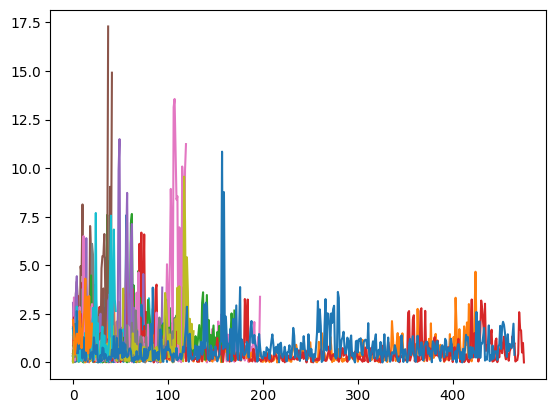

In [109]:
fig, ax = plt.subplots()
parallax_corrapp = []

# groups = propercrosscorr_filt.groupby("propercrossingnum")
# for _, group in groups:
for i in list(propercrosscorr_filt["propercrossingnum"].unique()): # ['1', '2', '3', '4', '6', '7', '8', '9']: #
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']<500) & (group['front-y']>320)]
    plt.plot(list(group.index-list(group.index)[0]), group['parallax'].to_list(), '-')
    parallax_corrapp.append(np.nanmax(group['parallax']))
#     break

plt.show()

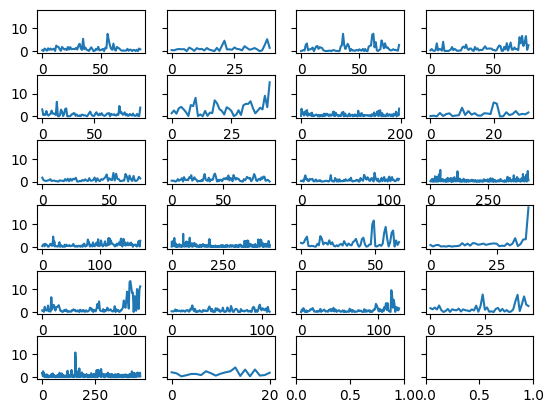

In [110]:
fig, axs = plt.subplots(nrows=6, ncols=4, sharey=True)
plt.subplots_adjust(hspace=0.5)

total = list(propercrosscorr_filt["propercrossingnum"].unique())

for idx, ax in zip(range(len(total)), axs.ravel()):
    i = propercrosscorr_filt["propercrossingnum"].unique()[idx]
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']<500) & (group['front-y']>320)]
    ax.plot(list(group.index-list(group.index)[0]), group['parallax'].to_list(), '-')
    ax.set_xlabel("")

plt.show()

In [111]:
parallax_corrapp

[7.5726454515744654,
 5.225177847641978,
 7.641734405076722,
 6.682063712784719,
 6.3972921695389795,
 14.909167794732378,
 3.3794021659118876,
 6.103869356852934,
 3.8050123130196765,
 3.505310078681197,
 3.8550995794275704,
 5.111083260706288,
 4.478953606645344,
 5.678362778377637,
 11.491610046929594,
 17.287203826213176,
 13.557489778892851,
 3.2358453308934965,
 9.561661097822428,
 7.69153137186241,
 10.847097998727815,
 4.315545741408687]

In [112]:
max(parallax_corrapp)

17.287203826213176

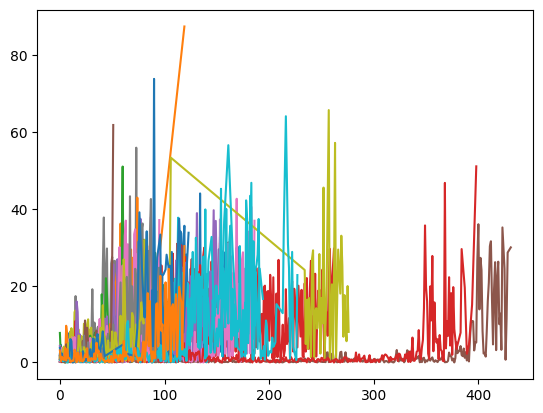

In [113]:
fig, ax = plt.subplots()
parallax_corrcross = []

groups = propercrosscorr_filt.groupby("propercrossingnum")
for _, group in groups:
    group = group[(group['front-y']>280) & (group['front-y']<350)]
    plt.plot(list(group.index-list(group.index)[0]), group['parallax'].to_list(), '-')
    parallax_corrcross.append(np.nanmax(group['parallax']))
#     break

plt.show()

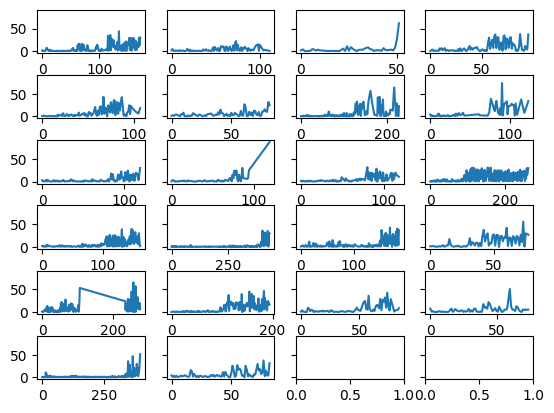

In [114]:
fig, axs = plt.subplots(nrows=6, ncols=4, sharey=True)
plt.subplots_adjust(hspace=0.5)

total = list(propercrosscorr_filt["propercrossingnum"].unique())

for idx, ax in zip(range(len(total)), axs.ravel()):
    i = propercrosscorr_filt["propercrossingnum"].unique()[idx]
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']>280) & (group['front-y']<350)]
    ax.plot(list(group.index-list(group.index)[0]), group['parallax'].to_list(), '-')
    ax.set_xlabel("")

plt.show()

In [115]:
max(parallax_corrcross)

87.517300158986

In [116]:
parallax_corrapp
parallax_corrcross
parallax_mirror

[4.678075691805059,
 5.126150879066253,
 11.323299360748566,
 3.698229827491986,
 8.091327487890268,
 5.670001659256376,
 21.511744228303012,
 8.536264453029414,
 20.116251299197163,
 9.033468340467387,
 21.658159565972955,
 13.59060122929316,
 7.9759229309698725,
 6.6482675291562146,
 8.43433212218631,
 4.848719182451517,
 7.085088342067145,
 5.939641529297275,
 4.397222567223831,
 8.670809117116159,
 2.584942923108659,
 3.92471686387339]

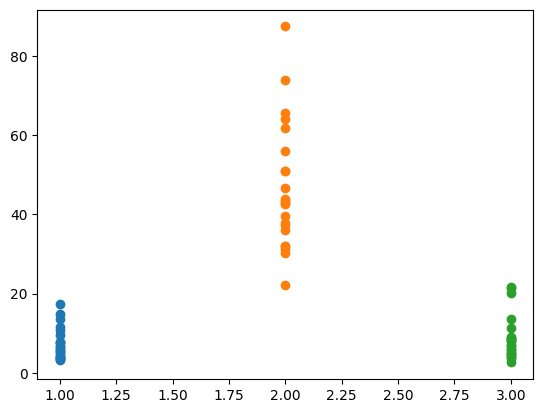

In [117]:
fig, ax = plt.subplots()

plt.scatter([1]*len(parallax_corrapp), parallax_corrapp)
plt.scatter([2]*len(parallax_corrcross), parallax_corrcross)
plt.scatter([3]*len(parallax_mirror), parallax_mirror)

plt.show()

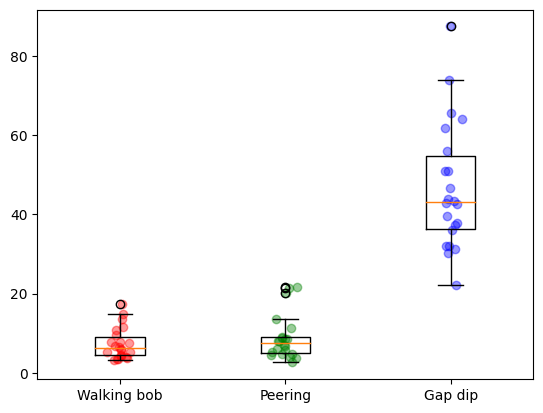

In [118]:
df = pd.DataFrame(np.transpose(np.array([parallax_corrapp, parallax_mirror, parallax_corrcross])), columns=['Walking bob','Peering','Gap dip'])

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

plt.boxplot(vals, labels=names)
palette = ['r', 'g', 'b']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
plt.show()

### Compute theta prime -- approach

In [119]:
pTm = abs((319-262)/2) # from rect patches
print(pTm)
xb_prime = (162)/pTm
print(xb_prime)
yb_prime = (319)/pTm
print(yb_prime)

28.5
5.684210526315789
11.192982456140351


In [120]:
propercrosscorr_filt

front-x     front-y  front-likelihood      hind-x      hind-y  \
1564    170.242027  422.718702          0.999162  164.722463  470.757762   
1565    170.817982  420.798955          0.999425  164.885475  469.585648   
1566    170.722694  418.168017          0.999043  164.266207  468.517800   
1567    172.241365  419.272610          0.999083  163.954340  468.989110   
1568    171.256523  418.805979          0.999056  163.501126  468.537823   
...            ...         ...               ...         ...         ...   
165800  159.723870   88.559461          0.998845  149.275330  134.909096   
165801  159.867132   87.334769          0.998878  149.017532  134.088626   
165802  159.977430   86.908212          0.998847  148.692302  133.785080   
165803  160.834157   86.401219          0.998843  149.360612  133.158164   
165804  160.663254   85.276922          0.998760  151.418328  133.338464   

        hind-likelihood  side-filter  trial front-state hind-state  \
1564           0.999094            0      3           3          3   
1565           0.999436            0      3           3          3   
1566           0.999381            0      3           3          3   
1567           0.999410            0      3           3          3   
1568           0.999456            0      3           3          3   
...                 ...          ...    ...         ...        ...   
165800         0.999391            1    158           1          1   
165801         0.999520            1    158           1          1   
165802         0.999576            1    158           1          1   
165803         0.999508            1    158           1          1   
165804         0.999467            1    158           1          1   

       crossing-type propercrossingnum    xprime    yprime      rdot  \
1564           cross                 1  5.973404  5.639253  2.425077   
1565           cross                 1  5.993613  5.571893  0.401213   
1566           cross                 1  5.990270  5.479580  6.394403   
1567           cross                 1  6.043557  5.518337  4.146701   
1568           cross                 1  6.009001  5.501964  1.192559   
...              ...               ...       ...       ...       ...   
165800         cross                23  5.604346 -6.085633  0.603210   
165801         cross                23  5.609373 -6.128605  0.464413   
165802         cross                23  5.613243 -6.143572  3.607271   
165803         cross                23  5.643304 -6.161361  0.719591   
165804         cross                23  5.637307 -6.200810       NaN   

            dhat  parallax  
1564    5.605573  0.432619  
1565    5.525736  0.072608  
1566    5.498958  1.162839  
1567    5.510151  0.752557  
1568    5.504720  0.216643  
...          ...       ...  
165800 -6.107119 -0.098772  
165801 -6.136088 -0.075686  
165802 -6.152466 -0.586313  
165803 -6.181085 -0.116418  
165804       NaN       NaN  

[10586 rows x 17 columns]

In [121]:
propercrosscorr_filt["thetaxprime"] = (propercrosscorr_filt['front-x']/pTm)-xb_prime
propercrosscorr_filt["thetayprime"] = (propercrosscorr_filt['front-y']/pTm)-yb_prime+2
propercrosscorr_filt["thetaprime"] = np.arctan2(propercrosscorr_filt["thetaxprime"], propercrosscorr_filt["thetayprime"])

In [122]:
thetaprime_corr = []
thetaprimet_corr = []
thetaprime_corrapp = []
thetaprimet_corrapp = []
thetaprime_corrcross = []
thetaprimet_corrcross = []

total = list(propercrosscorr_filt["propercrossingnum"].unique())

for idx, ax in zip(range(len(total)), axs.ravel()):
    i = propercrosscorr_filt["propercrossingnum"].unique()[idx]
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    thetaprime_corr.append(group['thetaprime'].to_list())
    thetaprimet_corr.append(list(group.index-list(group.index)[0]))
    
    appgroup = group[(group['front-y']<500) & (group['front-y']>320)]
    thetaprime_corrapp.append(appgroup['thetaprime'].to_list())
    thetaprimet_corrapp.append(list(appgroup.index-list(appgroup.index)[0]))
    
    crossgroup = group[(group['front-y']>280) & (group['front-y']<350)]
    thetaprime_corrcross.append(crossgroup['thetaprime'].to_list())
    thetaprimet_corrcross.append(list(crossgroup.index-list(crossgroup.index)[0]))

thetaprime_corr = filter_seq(thetaprime_corr)
thetaprime_corrapp = filter_seq(thetaprime_corrapp)
thetaprime_corrcross = filter_seq(thetaprime_corrcross)

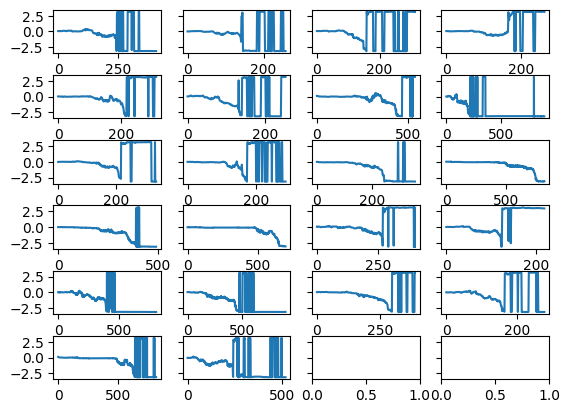

In [123]:
fig, axs = plt.subplots(nrows=6, ncols=4, sharey=True)
plt.subplots_adjust(hspace=0.5)

for i, ax in zip(range(len(thetaprime)), axs.ravel()):
    ax.plot(thetaprimet_corr[i], thetaprime_corr[i])
    ax.set_xlabel("")

plt.show()

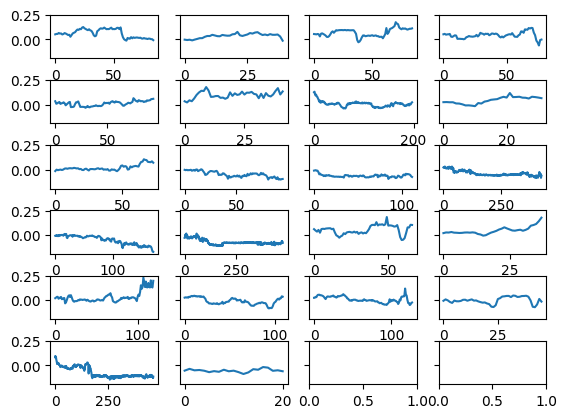

In [124]:
fig, axs = plt.subplots(nrows=6, ncols=4, sharey=True)
plt.subplots_adjust(hspace=0.5)

for i, ax in zip(range(len(thetaprime)), axs.ravel()):
    ax.plot(thetaprimet_corrapp[i], thetaprime_corrapp[i])
    ax.set_xlabel("")

plt.show()

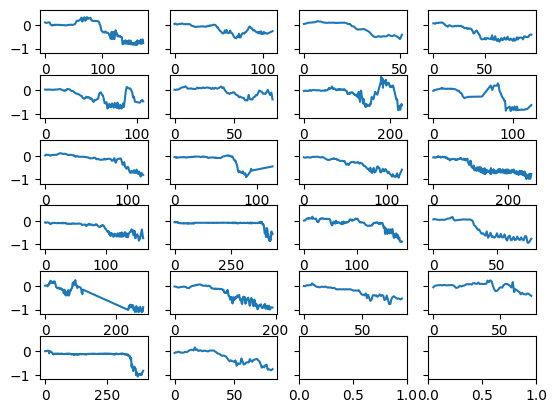

In [125]:
fig, axs = plt.subplots(nrows=6, ncols=4, sharey=True)
plt.subplots_adjust(hspace=0.5)

for i, ax in zip(range(len(thetaprime)), axs.ravel()):
    ax.plot(thetaprimet_corrcross[i], thetaprime_corrcross[i])
    ax.set_xlabel("")

plt.show()

In [126]:
deltathetaprime_corrapp = []
for i in thetaprime_corrapp:
    deltathetaprime_corrapp.append(np.nanmax(i)-np.nanmin(i))
    
deltathetaprime_corrapp

[0.13862542398195604,
 0.08984977507725733,
 0.20487630092214407,
 0.17947993161599896,
 0.09768780236298816,
 0.1566111752287576,
 0.1714764370889752,
 0.1339285118730174,
 0.1214133967815642,
 0.10565746079874286,
 0.0890684436960178,
 0.11633151287123991,
 0.18291568189937904,
 0.12604108438633727,
 0.23486335169438988,
 0.18313103646031365,
 0.2633185882796359,
 0.12890365203403317,
 0.16845744922212236,
 0.11921803043253171,
 0.2371475060728647,
 0.07075073305858619]

In [127]:
deltathetaprime_corrcross = []
for i in thetaprime_corrcross:
    deltathetaprime_corrcross.append(np.nanmax(i)-np.nanmin(i))
    
deltathetaprime_corrcross

[1.1871162451906243,
 0.6343930909925518,
 0.76687966464229,
 0.8141186359021465,
 0.917092287615991,
 0.6036401958682021,
 1.4120918958537994,
 1.1797043086856,
 0.9998932227684779,
 0.9363045764697588,
 0.8977359200110435,
 0.9769428518966132,
 0.7890627512348976,
 0.8239899238906333,
 1.0784133041733597,
 1.1062124565160076,
 1.3646824008582756,
 1.0762315618688645,
 0.8869843933546158,
 0.6599743991105471,
 1.1052809654023104,
 0.9753317913965138]

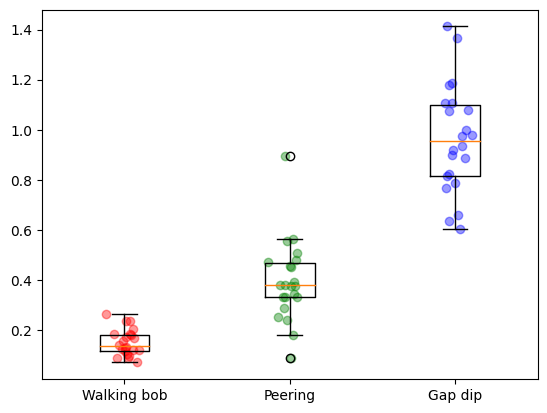

In [128]:
df = pd.DataFrame(np.transpose(np.array([deltathetaprime_corrapp, deltathetaprime_mirror, deltathetaprime_corrcross])), columns=['Walking bob','Peering','Gap dip'])

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

plt.boxplot(vals, labels=names)
palette = ['r', 'g', 'b']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
plt.show()

## Walking bob trjns

In [129]:
def app_get_deltax(propercrosscorr_filt, i):
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']<500) & (group['front-y']>320)]    
    app_curr_x = np.array(group['front-x'].to_list())
    app_first_x = app_curr_x[np.isfinite(app_curr_x)][-1]
    return group, app_curr_x, app_first_x

def app_get_deltay(propercrosscorr_filt, i):
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']<500) & (group['front-y']>320)]    
    app_curr_x = np.array(group['front-y'].to_list())
    app_first_x = app_curr_x[np.isfinite(app_curr_x)][-1]
    return group, app_curr_x, app_first_x

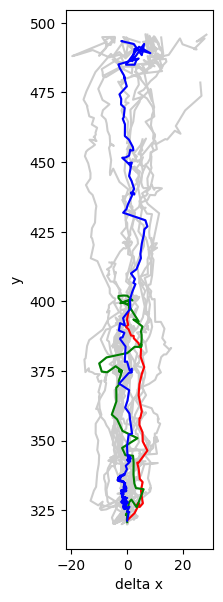

In [130]:
fig, ax = plt.subplots(figsize=(4,7))
# parallax_corrapp = []

# groups = propercrosscorr_filt.groupby("propercrossingnum")
# for _, group in groups:

app_deltax = []
for i in list(propercrosscorr_filt["propercrossingnum"].unique()): # ['1', '2', '3', '4', '6', '7', '8', '9']: #
    
    group, app_curr_x, app_first_x = app_get_deltax(propercrosscorr_filt, i)
    app_deltax.append(list(app_curr_x - app_first_x))
    plt.plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='0.8')
    
group, app_curr_x, app_first_x = app_get_deltax(propercrosscorr_filt, '2')
plt.plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='r')

group, app_curr_x, app_first_x = app_get_deltax(propercrosscorr_filt, '3')
plt.plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='g')

group, app_curr_x, app_first_x = app_get_deltax(propercrosscorr_filt, '14')
plt.plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='b')

ax.set_aspect('equal')
ax.set_xlabel('delta x')
ax.set_ylabel('y')
plt.show()

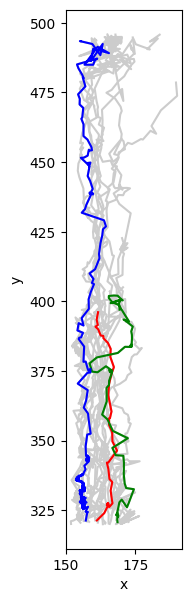

In [131]:
fig, ax = plt.subplots(figsize=(4,7))
# parallax_corrapp = []

# groups = propercrosscorr_filt.groupby("propercrossingnum")
# for _, group in groups:
for i in list(propercrosscorr_filt["propercrossingnum"].unique()): # ['1', '2', '3', '4', '6', '7', '8', '9']: #
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']<500) & (group['front-y']>320)]   
    plt.plot(group['front-x'], group['front-y'], '0.8')

group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == '2']
group = group[(group['front-y']<500) & (group['front-y']>320)]   
plt.plot(group['front-x'], group['front-y'], 'r')

group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == '3']
group = group[(group['front-y']<500) & (group['front-y']>320)]   
plt.plot(group['front-x'], group['front-y'], 'g')

group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == '14']
group = group[(group['front-y']<500) & (group['front-y']>320)]   
plt.plot(group['front-x'], group['front-y'], 'b')
    
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## Gap dip trjns

In [132]:
def cross_get_deltax(propercrosscorr_filt, i):
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']>280) & (group['front-y']<350)] 
    app_curr_x = np.array(group['front-x'].to_list())
    app_first_x = app_curr_x[np.isfinite(app_curr_x)][0]
    return group, app_curr_x, app_first_x

def cross_get_deltay(propercrosscorr_filt, i):
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']>280) & (group['front-y']<350)] 
    app_curr_x = np.array(group['front-y'].to_list())
    app_first_x = app_curr_x[np.isfinite(app_curr_x)][-1]
    return group, app_curr_x, app_first_x

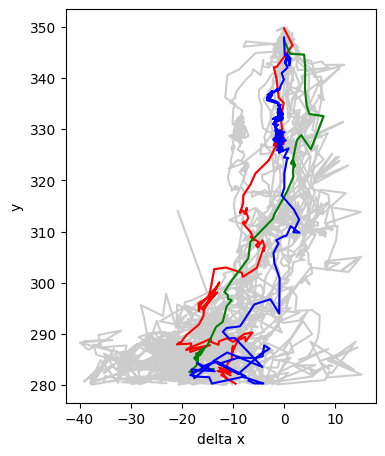

In [133]:
fig, ax = plt.subplots(figsize=(4,7))
# parallax_corrapp = []

# groups = propercrosscorr_filt.groupby("propercrossingnum")
# for _, group in groups:

app_deltax = []
for i in list(propercrosscorr_filt["propercrossingnum"].unique()): # ['1', '2', '3', '4', '6', '7', '8', '9']: #
    
    group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, i)
    app_deltax.append(list(app_curr_x - app_first_x))
    plt.plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='0.8')
    
group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, '2')
plt.plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='r')

group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, '3')
plt.plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='g')

group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, '14')
plt.plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='b')

ax.set_aspect('equal')
ax.set_xlabel('delta x')
ax.set_ylabel('y')
plt.show()

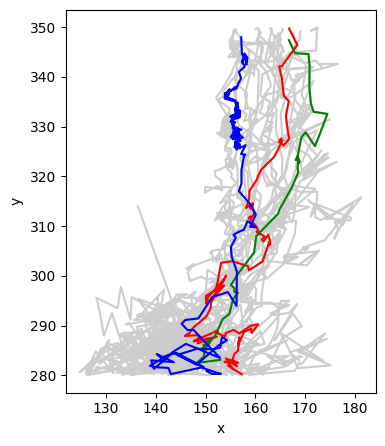

In [134]:
fig, ax = plt.subplots(figsize=(4,7))
# parallax_corrapp = []

# groups = propercrosscorr_filt.groupby("propercrossingnum")
# for _, group in groups:
for i in list(propercrosscorr_filt["propercrossingnum"].unique()): # ['1', '2', '3', '4', '6', '7', '8', '9']: #
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']>280) & (group['front-y']<350)]  
    plt.plot(group['front-x'], group['front-y'], '0.8')

group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == '2']
group = group[(group['front-y']>280) & (group['front-y']<350)]
plt.plot(group['front-x'], group['front-y'], 'r')

group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == '3']
group = group[(group['front-y']>280) & (group['front-y']<350)] 
plt.plot(group['front-x'], group['front-y'], 'g')

group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == '14']
group = group[(group['front-y']>280) & (group['front-y']<350)]
plt.plot(group['front-x'], group['front-y'], 'b')
    
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

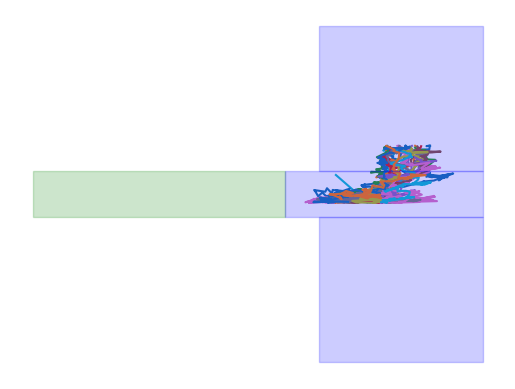

In [135]:
fig, ax = plt.subplots()
# parallax_corrapp = []

# groups = propercrosscorr_filt.groupby("propercrossingnum")
# for _, group in groups:
for i in list(propercrosscorr_filt["propercrossingnum"].unique()): # ['1', '2', '3', '4', '6', '7', '8', '9']: #
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']>280) & (group['front-y']<350)]
    
#     display(group)
    plt.plot(group['front-x'], group['front-y'])
#     break
#     plt.plot(list(group.index-list(group.index)[0]), group['parallax'].to_list(), '-')
#     parallax_corrapp.append(np.nanmax(group['parallax']))
#     break

# circumvention
ax.add_patch(mpatches.Rectangle((20, 262), 97, 57, zorder=2, alpha=.2, color="green"))
# cross
ax.add_patch(mpatches.Rectangle((117, 262), 76, 57, zorder=2, alpha=.2, color="blue"))
# approaching gap
ax.add_patch(mpatches.Rectangle((130, 85), 63, 177, zorder=2, alpha=.2, color="blue"))
# leaving gap
ax.add_patch(mpatches.Rectangle((130, 319), 63, 177, zorder=2, alpha=.2, color="blue"))
plt.axis('off')
plt.show()

plt.show()

## Plots for figures

### Trjn subplots

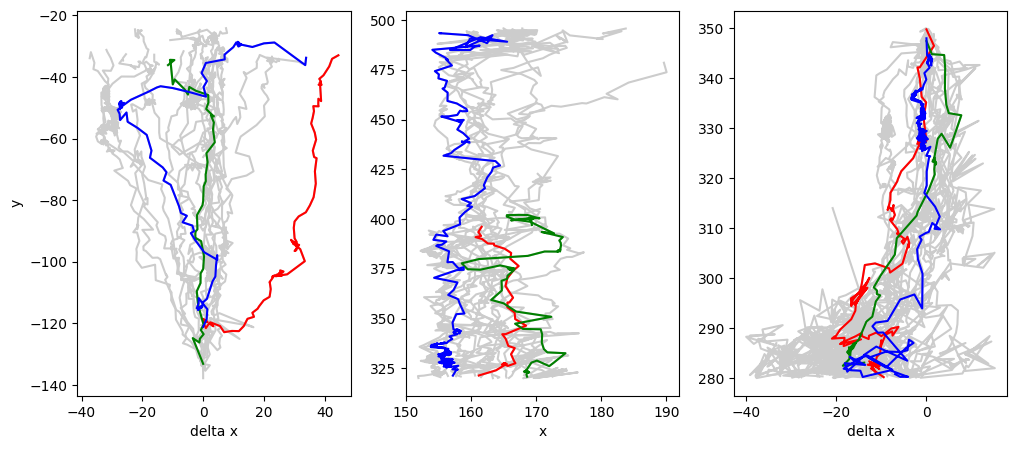

In [348]:
fig = plt.figure(figsize=(12,5))
ax = fig.subplots(1,3)

# peering
for i in range(len(deltax)):
    
    cross_frames = list(singlecross_frames[i])
    cross_frames = list(map(int, cross_frames))
    
    ax[0].plot(deltax[i], -leftMirror_noflip["avg-front-y"].loc[cross_frames], '-', color='0.8')
    
cross_frames = list(singlecross_frames[2])
cross_frames = list(map(int, cross_frames))
ax[0].plot(deltax[2], -leftMirror_noflip["avg-front-y"].loc[cross_frames], '-', color='r')

cross_frames = list(singlecross_frames[3])
cross_frames = list(map(int, cross_frames))
ax[0].plot(deltax[3], -leftMirror_noflip["avg-front-y"].loc[cross_frames], '-', color='g')
    
cross_frames = list(singlecross_frames[14])
cross_frames = list(map(int, cross_frames))
ax[0].plot(deltax[14], -leftMirror_noflip["avg-front-y"].loc[cross_frames], '-', color='b')

# bob
for i in list(propercrosscorr_filt["propercrossingnum"].unique()):
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']<500) & (group['front-y']>320)]   
    ax[1].plot(group['front-x'], group['front-y'], '0.8')

group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == '2']
group = group[(group['front-y']<500) & (group['front-y']>320)]   
ax[1].plot(group['front-x'], group['front-y'], 'r')

group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == '3']
group = group[(group['front-y']<500) & (group['front-y']>320)]   
ax[1].plot(group['front-x'], group['front-y'], 'g')

group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == '14']
group = group[(group['front-y']<500) & (group['front-y']>320)]   
ax[1].plot(group['front-x'], group['front-y'], 'b')
    
# dip
app_deltax = []
for i in list(propercrosscorr_filt["propercrossingnum"].unique()): # ['1', '2', '3', '4', '6', '7', '8', '9']: #
    
    group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, i)
    app_deltax.append(list(app_curr_x - app_first_x))
    ax[2].plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='0.8')
    
group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, '2')
ax[2].plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='r')

group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, '3')
ax[2].plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='g')

group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, '14')
ax[2].plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='b')

ax[0].set_xlabel('delta x')
ax[0].set_ylabel('y')

ax[1].set_xlabel('x')

ax[2].set_xlabel('delta x')

plt.show()

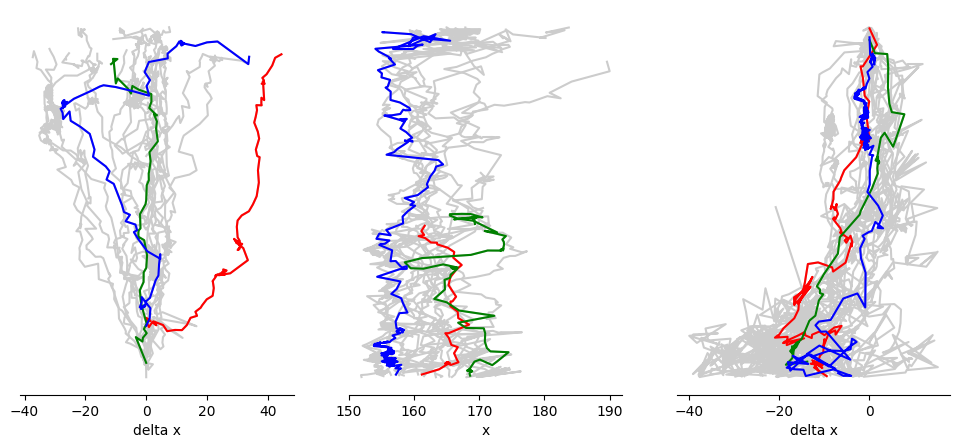

In [349]:
fig = plt.figure(figsize=(12,5))
ax = fig.subplots(1,3)

# peering
for i in range(len(deltax)):
    
    cross_frames = list(singlecross_frames[i])
    cross_frames = list(map(int, cross_frames))
    
    ax[0].plot(deltax[i], -leftMirror_noflip["avg-front-y"].loc[cross_frames], '-', color='0.8')
    
cross_frames = list(singlecross_frames[2])
cross_frames = list(map(int, cross_frames))
ax[0].plot(deltax[2], -leftMirror_noflip["avg-front-y"].loc[cross_frames], '-', color='r')

cross_frames = list(singlecross_frames[3])
cross_frames = list(map(int, cross_frames))
ax[0].plot(deltax[3], -leftMirror_noflip["avg-front-y"].loc[cross_frames], '-', color='g')
    
cross_frames = list(singlecross_frames[14])
cross_frames = list(map(int, cross_frames))
ax[0].plot(deltax[14], -leftMirror_noflip["avg-front-y"].loc[cross_frames], '-', color='b')

# bob
for i in list(propercrosscorr_filt["propercrossingnum"].unique()):
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']<500) & (group['front-y']>320)]   
    ax[1].plot(group['front-x'], group['front-y'], '0.8')

group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == '2']
group = group[(group['front-y']<500) & (group['front-y']>320)]   
ax[1].plot(group['front-x'], group['front-y'], 'r')

group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == '3']
group = group[(group['front-y']<500) & (group['front-y']>320)]   
ax[1].plot(group['front-x'], group['front-y'], 'g')

group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == '14']
group = group[(group['front-y']<500) & (group['front-y']>320)]   
ax[1].plot(group['front-x'], group['front-y'], 'b')
    
# dip
app_deltax = []
for i in list(propercrosscorr_filt["propercrossingnum"].unique()): # ['1', '2', '3', '4', '6', '7', '8', '9']: #
    
    group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, i)
    app_deltax.append(list(app_curr_x - app_first_x))
    ax[2].plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='0.8')
    
group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, '2')
ax[2].plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='r')

group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, '3')
ax[2].plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='g')

group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, '14')
ax[2].plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='b')

ax[0].set_xlabel('delta x')
ax[1].set_xlabel('x')
ax[2].set_xlabel('delta x')

# Remove the spines (box) for each subplot
for ax in ax.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    
plt.show()

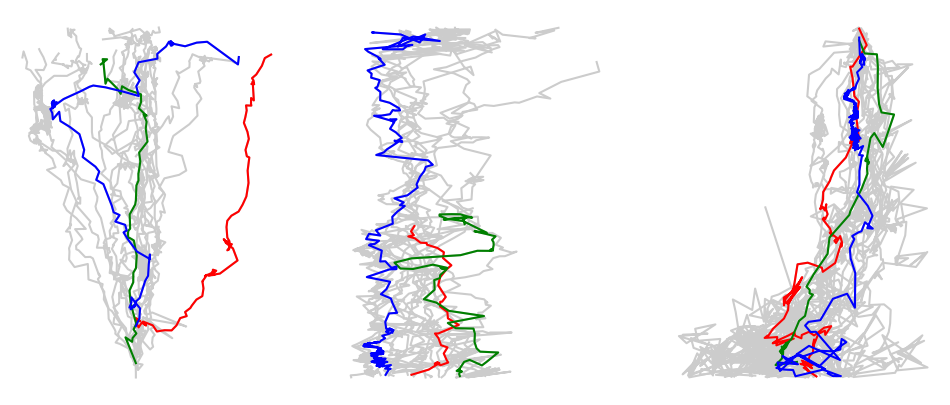

In [350]:
fig = plt.figure(figsize=(12,5))
ax = fig.subplots(1,3)

# peering
for i in range(len(deltax)):
    
    cross_frames = list(singlecross_frames[i])
    cross_frames = list(map(int, cross_frames))
    
    ax[0].plot(deltax[i], -leftMirror_noflip["avg-front-y"].loc[cross_frames], '-', color='0.8')
    
cross_frames = list(singlecross_frames[2])
cross_frames = list(map(int, cross_frames))
ax[0].plot(deltax[2], -leftMirror_noflip["avg-front-y"].loc[cross_frames], '-', color='r')

cross_frames = list(singlecross_frames[3])
cross_frames = list(map(int, cross_frames))
ax[0].plot(deltax[3], -leftMirror_noflip["avg-front-y"].loc[cross_frames], '-', color='g')
    
cross_frames = list(singlecross_frames[14])
cross_frames = list(map(int, cross_frames))
ax[0].plot(deltax[14], -leftMirror_noflip["avg-front-y"].loc[cross_frames], '-', color='b')

# bob
for i in list(propercrosscorr_filt["propercrossingnum"].unique()):
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']<500) & (group['front-y']>320)]   
    ax[1].plot(group['front-x'], group['front-y'], '0.8')

group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == '2']
group = group[(group['front-y']<500) & (group['front-y']>320)]   
ax[1].plot(group['front-x'], group['front-y'], 'r')

group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == '3']
group = group[(group['front-y']<500) & (group['front-y']>320)]   
ax[1].plot(group['front-x'], group['front-y'], 'g')

group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == '14']
group = group[(group['front-y']<500) & (group['front-y']>320)]   
ax[1].plot(group['front-x'], group['front-y'], 'b')
    
# dip
app_deltax = []
for i in list(propercrosscorr_filt["propercrossingnum"].unique()): # ['1', '2', '3', '4', '6', '7', '8', '9']: #
    
    group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, i)
    app_deltax.append(list(app_curr_x - app_first_x))
    ax[2].plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='0.8')
    
group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, '2')
ax[2].plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='r')

group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, '3')
ax[2].plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='g')

group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, '14')
ax[2].plot(list(app_curr_x - app_first_x), group['front-y'].to_list(), color='b')

# ax[0].set_xlabel('delta x')
# ax[1].set_xlabel('x')
# ax[2].set_xlabel('delta x')

# Remove the spines (box) for each subplot
for ax in ax.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    
plt.show()

In [351]:
labels = ['peer', 'bob', 'dip']

In [181]:
np.nanmedian(np.array(all_cross_x, dtype="object"))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [162]:
np.nanmedian(np.array(all_cross_x, dtype="object"))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [352]:
def get_median(x_lists, y_lists):
    unique_y = sorted(set(y for sublist in y_lists for y in sublist))
    
    medians = {round(y,1): [] for y in unique_y if not np.isnan(y)}

    # Iterate over x and y lists
    for x_list, y_list in zip(x_lists, y_lists):
        for x, y in zip(x_list, y_list):
            if not np.isnan(x):
                medians[round(y,1)].append(x)
                
    # Calculate medians
    median_results = {}
    for y, values in medians.items():
        if values:
            median_results[y] = np.mean(values)

    return median_results

In [264]:
get_median(all_cross_x, all_cross_y)

{}

In [139]:
all_cross_x

NameError: name 'all_cross_x' is not defined

In [166]:
np.linspace(min_value,max_value, len(get_median(all_cross_x)))

NameError: name 'min_value' is not defined

In [167]:
len(np.linspace(min_value,max_value, len(get_median(all_cross_x))))

NameError: name 'min_value' is not defined

-320.0079288


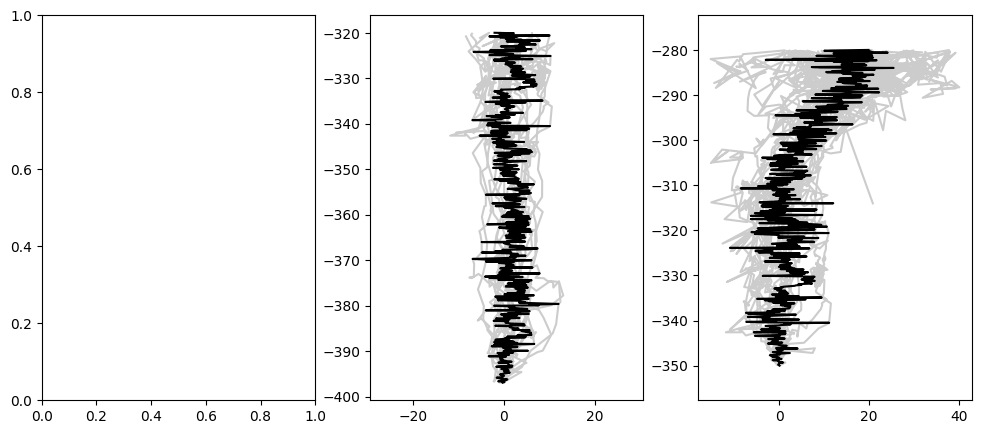

In [357]:
fig = plt.figure(figsize=(12,5))
ax = fig.subplots(1,3)

# dip
app_deltax = []
all_cross_x = []
all_cross_y = []
for i in list(propercrosscorr_filt["propercrossingnum"].unique()): # ['1', '2', '3', '4', '6', '7', '8', '9']: #
    
    group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, i)
    app_deltax.append(list(app_curr_x - app_first_x))
    ax[2].plot(np.negative(list(app_curr_x - app_first_x)), -group['front-y'], color='0.8')
    all_cross_x.append(np.negative(list(app_curr_x - app_first_x)))
    all_cross_y.append(-group['front-y'])
median_results = get_median(all_cross_x, all_cross_y) 
x_medians = list(median_results.values()) ; y_values = list(median_results.keys()) ;
sorted_y = sorted(median_results.keys()) ; sorted_x = [median_results[y] for y in sorted_y]
ax[2].plot(sorted_x, sorted_y, 'k')    
ax[2].axis('equal')
    
xmin = (ax[2].get_xlim()[1]-(ax[2].get_xlim()[1]-ax[2].get_xlim()[0])/2)-((ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/2)
xmax = (ax[2].get_xlim()[1]-(ax[2].get_xlim()[1]-ax[2].get_xlim()[0])/2)+((ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/2)
ax[2].set_xlim(xmin, xmax)
ax[2].axis('equal')

diff = ax[2].get_ylim()[1]-ax[2].get_ylim()[0]

# peering
all_cross_x = []
all_cross_y = []
## get max y
max_y = []
for i in range(len(currx)):
    
    cross_frames = list(singlecross_frames[i])
    cross_frames = list(map(int, cross_frames))
    
    y = -leftMirror_noflip["avg-front-y"].loc[cross_frames]
    max_y.append(np.nanmax(y))
    
max_y = max(max_y)
# for i in range(len(currx)):
#     cross_frames = list(singlecross_frames[i])
#     cross_frames = list(map(int, cross_frames))

#     y = -leftMirror_noflip["avg-front-y"].loc[cross_frames]
#     x = currx[i][y>(max_y-diff)]
#     deltx = x - x[0]
#     y_filt = y[y>(max_y-diff)]
    
#     ax[0].plot(deltx, y_filt, '-', color='0.8')
#     all_cross_x.append(deltx)
#     all_cross_y.append(y_filt)

# median_results = get_median(all_cross_x, all_cross_y) 
# x_medians = list(median_results.values()) ; y_values = list(median_results.keys()) ;
# sorted_y = sorted(median_results.keys()) ; sorted_x = [median_results[y] for y in sorted_y]
# ax[0].plot(sorted_x, sorted_y, 'k')    
# ax[0].axis('equal')


# bob
all_cross_x = []
all_cross_y = []
## get max y
max_y = []
for i in list(propercrosscorr_filt["propercrossingnum"].unique()):
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']<500) & (group['front-y']>320)]
    y = -group['front-y']
    max_y.append(np.nanmax(y))
max_y = max(max_y)

for i in list(propercrosscorr_filt["propercrossingnum"].unique()):
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']<500) & (group['front-y']>320)]
    x = group['front-x'] ; y = -group['front-y']
    x_filt = -(x[y>(max_y-diff)]-x[y>(max_y-diff)].to_list()[0]) ; y_filt = y[y>(max_y-diff)]
    ax[1].plot(x_filt, y_filt, '0.8')
    all_cross_x.append(x_filt)
    all_cross_y.append(y_filt)
median_results = get_median(all_cross_x, all_cross_y) 
x_medians = list(median_results.values()) ; y_values = list(median_results.keys()) ;
sorted_y = sorted(median_results.keys()) ; sorted_x = [median_results[y] for y in sorted_y]
ax[1].plot(sorted_x, sorted_y, 'k')    
ax[1].axis('equal')
    
    
xmin = (ax[1].get_xlim()[1]-(ax[1].get_xlim()[1]-ax[1].get_xlim()[0])/2)-((ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/2)
xmax = (ax[1].get_xlim()[1]-(ax[1].get_xlim()[1]-ax[1].get_xlim()[0])/2)+((ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/2)
ax[1].set_xlim(xmin, xmax)
ax[1].axis('equal')


# for i in range(len(ax)):
#     extent = ax[i].get_tightbbox(fig.canvas.get_renderer()).transformed(fig.dpi_scale_trans.inverted())
#     fig.savefig(f"C:\\Users\\yalec\\Downloads\\{labels[i]}_croppeddata.svg", format='svg', bbox_inches=extent.expanded(1.0, 1.1))

plt.show()
# C:\\Users\\yalec\\Documents\\GitHub\\Gap_Crossing\\Kate\\Figures\\

In [378]:
pTm

28.5

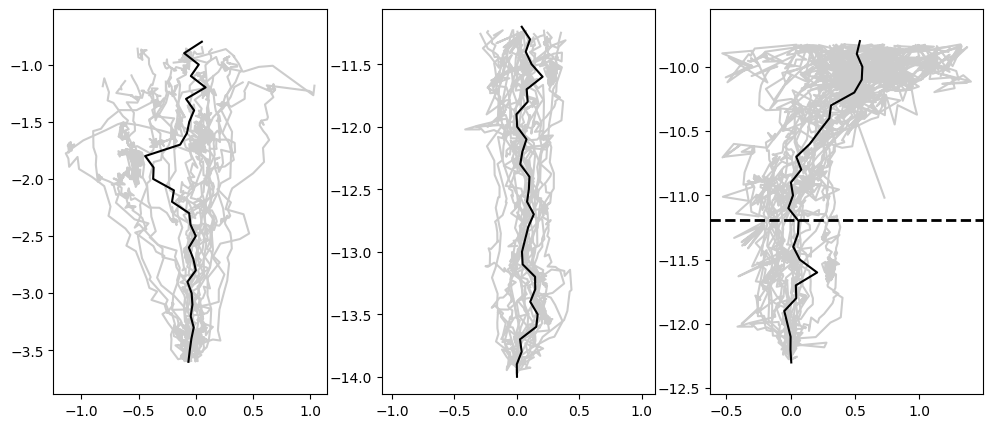

In [411]:
fig = plt.figure(figsize=(12,5))
ax = fig.subplots(1,3)

# dip
app_deltax = []
all_cross_x = []
all_cross_y = []
for i in list(propercrosscorr_filt["propercrossingnum"].unique()): # ['1', '2', '3', '4', '6', '7', '8', '9']: #
    
    group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, i)
    x = [x/pTm for x in list(app_curr_x - app_first_x)]
    y = [x/pTm for x in -group['front-y']]
    app_deltax.append(x)
    ax[2].plot(np.negative(x), y, color='0.8')
    all_cross_x.append(np.negative(x))
    all_cross_y.append(y)
median_results = get_median(all_cross_x, all_cross_y) 
x_medians = list(median_results.values()) ; y_values = list(median_results.keys()) ;
sorted_y = sorted(median_results.keys()) ; sorted_x = [median_results[y] for y in sorted_y]
# sorted_x_mm = [x/pTm for x in sorted_x]
# sorted_y_mm = [y/pTm for y in sorted_y]
ax[2].plot(sorted_x, sorted_y, 'k')    
ax[2].axis('equal')
    
xmin = (ax[2].get_xlim()[1]-(ax[2].get_xlim()[1]-ax[2].get_xlim()[0])/2)-((ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/2)
xmax = (ax[2].get_xlim()[1]-(ax[2].get_xlim()[1]-ax[2].get_xlim()[0])/2)+((ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/2)
ax[2].set_xlim(xmin, xmax)
ax[2].axis('equal')

diff = ax[2].get_ylim()[1]-ax[2].get_ylim()[0]

# ax[0].add_patch(mpatches.Rectangle((117, -262), 76, -57, zorder=2, alpha=.2, color="blue"))
# ax[2].add_patch(mpatches.Rectangle((ax[2].get_xlim()[0], (-319/pTm)), ax[2].get_xlim()[1]-ax[2].get_xlim()[0], ax[2].get_ylim()[1]-(-319/pTm), zorder=2, alpha=.2, color="blue"))
ax[2].axhline((-319/pTm), linestyle='--', color='k', lw=2)

# peering
all_cross_x = []
all_cross_y = []
## get max y
max_y = []
for i in range(len(currx)):
    
    cross_frames = list(singlecross_frames[i])
    cross_frames = list(map(int, cross_frames))
    
    y = -leftMirror_noflip["avg-front-y"].loc[cross_frames]
    y = [newy/pTm for newy in y]
    max_y.append(np.nanmax(y))

max_y = max(max_y)
for i in range(len(currx)):
    cross_frames = list(singlecross_frames[i])
    cross_frames = list(map(int, cross_frames))

    y = -leftMirror_noflip["avg-front-y"].loc[cross_frames]
    y = np.array([newy/pTm for newy in y])
    x = np.array(currx[i])[y>(max_y-diff)]
    x = np.array([newx/pTm for newx in x])
    deltx = x - x[0]
    y_filt = y[y>(max_y-diff)]
    
    ax[0].plot(deltx, y_filt, '-', color='0.8')
    all_cross_x.append(deltx)
    all_cross_y.append(y_filt)

median_results = get_median(all_cross_x, all_cross_y) 
x_medians = list(median_results.values()) ; y_values = list(median_results.keys()) ;
sorted_y = sorted(median_results.keys()) ; sorted_x = [median_results[y] for y in sorted_y]
ax[0].plot(sorted_x, sorted_y, 'k')    
ax[0].axis('equal')

# bob
all_cross_x = []
all_cross_y = []
## get max y
max_y = []
for i in list(propercrosscorr_filt["propercrossingnum"].unique()):
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']<500) & (group['front-y']>320)]
    y = -group['front-y']
    y = [newy/pTm for newy in y]
    max_y.append(np.nanmax(y))
max_y = max(max_y)

for i in list(propercrosscorr_filt["propercrossingnum"].unique()):
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']<500) & (group['front-y']>320)]
    x = group['front-x'] ; y = -group['front-y']
    y = np.array([newy/pTm for newy in y]) ; x = np.array([newx/pTm for newx in x])
    x_filt = -(x[y>(max_y-diff)]-list(x[y>(max_y-diff)])[0]) ; y_filt = y[y>(max_y-diff)]
    ax[1].plot(x_filt, y_filt, '0.8')
    all_cross_x.append(x_filt)
    all_cross_y.append(y_filt)
median_results = get_median(all_cross_x, all_cross_y) 
x_medians = list(median_results.values()) ; y_values = list(median_results.keys()) ;
sorted_y = sorted(median_results.keys()) ; sorted_x = [median_results[y] for y in sorted_y]
ax[1].plot(sorted_x, sorted_y, 'k')    
ax[1].axis('equal')
    
# ax.add_patch(mpatches.Rectangle((24, 33), 94, 110, zorder=2, alpha=.2, color="green"))
# ax[0].add_patch(mpatches.Rectangle((ax[1].get_xlim()[0], (-33/pTm)), ax[1].get_xlim()[1]-ax[1].get_xlim()[0], ax[1].get_ylim()[1]-(-33/pTm), zorder=2, alpha=.2, color="green"))
    
xmin = (ax[1].get_xlim()[1]-(ax[1].get_xlim()[1]-ax[1].get_xlim()[0])/2)-((ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/2)
xmax = (ax[1].get_xlim()[1]-(ax[1].get_xlim()[1]-ax[1].get_xlim()[0])/2)+((ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/2)
ax[1].set_xlim(xmin, xmax)
ax[1].axis('equal')


for i in range(len(ax)):
    extent = ax[i].get_tightbbox(fig.canvas.get_renderer()).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f"C:\\Users\\yalec\\Downloads\\{labels[i]}_croppeddatamm.svg", format='svg', bbox_inches=extent.expanded(1.0, 1.1))

plt.show()
# C:\\Users\\yalec\\Documents\\GitHub\\Gap_Crossing\\Kate\\Figures\\

In [154]:
pTm

28.5

In [370]:
print(ax[0].get_ylim()[1]-ax[0].get_ylim()[0])
print(ax[1].get_ylim()[1]-ax[1].get_ylim()[0])
print(ax[2].get_ylim()[1]-ax[2].get_ylim()[0])

3.367658997327675
3.080000000000002
2.9949660975544248


In [371]:
len(deltax)

22

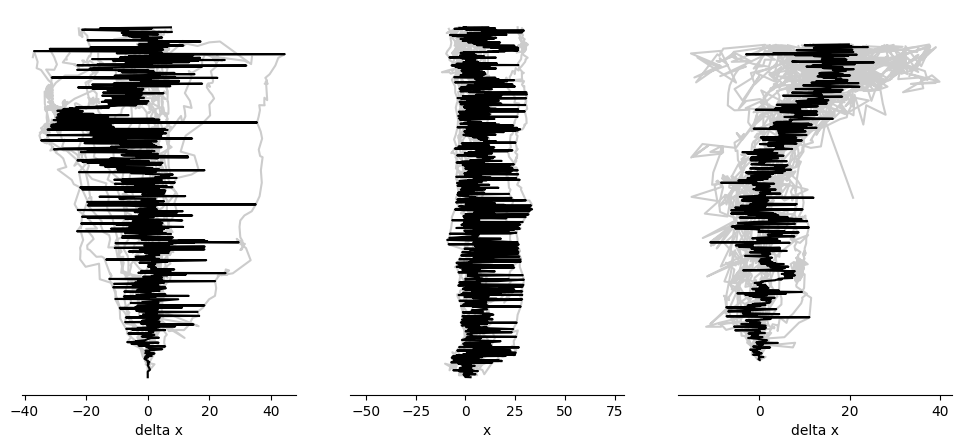

In [372]:
fig = plt.figure(figsize=(12,5))
ax = fig.subplots(1,3)

# peering
all_cross_x = []
all_cross_y = []
for i in range(len(deltax)):
    
    cross_frames = list(singlecross_frames[i])
    cross_frames = list(map(int, cross_frames))
    
    ax[0].plot(deltax[i], -leftMirror_noflip["avg-front-y"].loc[cross_frames], '-', color='0.8')
    all_cross_x.append(deltax[i])
    all_cross_y.append(-leftMirror_noflip["avg-front-y"].loc[cross_frames])

median_results = get_median(all_cross_x, all_cross_y) 
x_medians = list(median_results.values()) ; y_values = list(median_results.keys()) ;
sorted_y = sorted(median_results.keys()) ; sorted_x = [median_results[y] for y in sorted_y]
ax[0].plot(sorted_x, sorted_y, 'k')    
ax[0].axis('equal')

# bob
all_cross_x = []
all_cross_y = []
for i in list(propercrosscorr_filt["propercrossingnum"].unique()):
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']<500) & (group['front-y']>320)]
    ax[1].plot(-(group['front-x']-group['front-x'].to_list()[0]), -group['front-y'], '0.8')
    all_cross_x.append(list(-(group['front-x']-group['front-x'].to_list()[0])))
    all_cross_y.append(list(-group['front-y']))
median_results = get_median(all_cross_x, all_cross_y) 
x_medians = list(median_results.values()) ; y_values = list(median_results.keys()) ;
sorted_y = sorted(median_results.keys()) ; sorted_x = [median_results[y] for y in sorted_y]
ax[1].plot(sorted_x, sorted_y, 'k')    
ax[1].axis('equal')
    
    
xmin = (ax[1].get_xlim()[1]-(ax[1].get_xlim()[1]-ax[1].get_xlim()[0])/2)-((ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/2)
xmax = (ax[1].get_xlim()[1]-(ax[1].get_xlim()[1]-ax[1].get_xlim()[0])/2)+((ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/2)
ax[1].set_xlim(xmin, xmax)
ax[1].axis('equal')
    
# dip
app_deltax = []
all_cross_x = []
all_cross_y = []
for i in list(propercrosscorr_filt["propercrossingnum"].unique()): # ['1', '2', '3', '4', '6', '7', '8', '9']: #
    
    group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, i)
    app_deltax.append(list(app_curr_x - app_first_x))
    ax[2].plot(np.negative(list(app_curr_x - app_first_x)), -group['front-y'], color='0.8')
    all_cross_x.append(np.negative(list(app_curr_x - app_first_x)))
    all_cross_y.append(-group['front-y'])
median_results = get_median(all_cross_x, all_cross_y) 
x_medians = list(median_results.values()) ; y_values = list(median_results.keys()) ;
sorted_y = sorted(median_results.keys()) ; sorted_x = [median_results[y] for y in sorted_y]
ax[2].plot(sorted_x, sorted_y, 'k')    
ax[2].axis('equal')
    
xmin = (ax[2].get_xlim()[1]-(ax[2].get_xlim()[1]-ax[2].get_xlim()[0])/2)-((ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/2)
xmax = (ax[2].get_xlim()[1]-(ax[2].get_xlim()[1]-ax[2].get_xlim()[0])/2)+((ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/2)
ax[2].set_xlim(xmin, xmax)
ax[2].axis('equal')

ax[0].set_xlabel('delta x')
ax[1].set_xlabel('x')
ax[2].set_xlabel('delta x')

# Remove the spines (box) for each subplot
for axy in ax.flat:
    axy.spines['top'].set_visible(False)
    axy.spines['right'].set_visible(False)
    axy.spines['left'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     ax.xaxis.set_ticks([])
    axy.yaxis.set_ticks([])

# for i in range(len(ax)):
#     extent = ax[i].get_tightbbox(fig.canvas.get_renderer()).transformed(fig.dpi_scale_trans.inverted())
#     fig.savefig(f"C:\\Users\\yalec\\Downloads\\forfigures2\\{labels[i]}_bottomonly.svg", format='svg', bbox_inches=extent.expanded(1.1, 1.2))
    
plt.show()

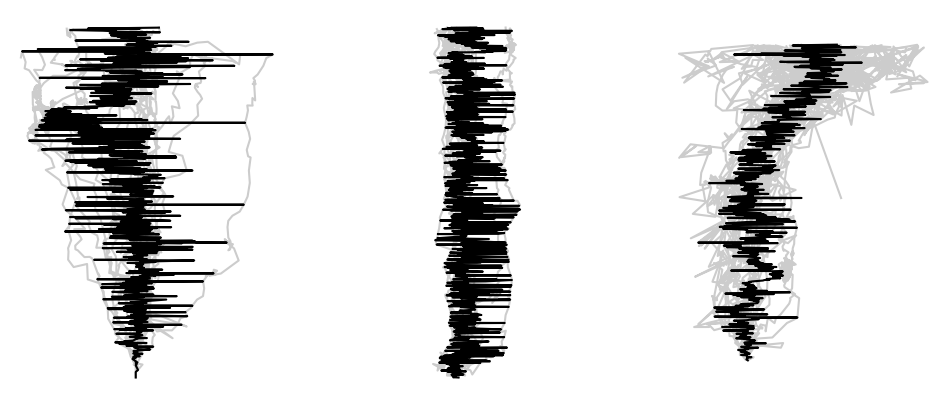

In [150]:
fig = plt.figure(figsize=(12,5))
ax = fig.subplots(1,3)

# peering
all_cross_x = []
all_cross_y = []
for i in range(len(deltax)):
    
    cross_frames = list(singlecross_frames[i])
    cross_frames = list(map(int, cross_frames))
    
    ax[0].plot(deltax[i], -leftMirror_noflip["avg-front-y"].loc[cross_frames], '-', color='0.8')
    all_cross_x.append(deltax[i])
    all_cross_y.append(-leftMirror_noflip["avg-front-y"].loc[cross_frames])

median_results = get_median(all_cross_x, all_cross_y) 
x_medians = list(median_results.values()) ; y_values = list(median_results.keys()) ;
sorted_y = sorted(median_results.keys()) ; sorted_x = [median_results[y] for y in sorted_y]
ax[0].plot(sorted_x, sorted_y, 'k')    
ax[0].axis('equal')

# bob
all_cross_x = []
all_cross_y = []
for i in list(propercrosscorr_filt["propercrossingnum"].unique()):
    group = propercrosscorr_filt[propercrosscorr_filt['propercrossingnum'] == i]
    group = group[(group['front-y']<500) & (group['front-y']>320)]
    ax[1].plot(-(group['front-x']-group['front-x'].to_list()[0]), -group['front-y'], '0.8')
    all_cross_x.append(list(-(group['front-x']-group['front-x'].to_list()[0])))
    all_cross_y.append(list(-group['front-y']))
median_results = get_median(all_cross_x, all_cross_y) 
x_medians = list(median_results.values()) ; y_values = list(median_results.keys()) ;
sorted_y = sorted(median_results.keys()) ; sorted_x = [median_results[y] for y in sorted_y]
ax[1].plot(sorted_x, sorted_y, 'k')    
ax[1].axis('equal')
    
    
xmin = (ax[1].get_xlim()[1]-(ax[1].get_xlim()[1]-ax[1].get_xlim()[0])/2)-((ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/2)
xmax = (ax[1].get_xlim()[1]-(ax[1].get_xlim()[1]-ax[1].get_xlim()[0])/2)+((ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/2)
ax[1].set_xlim(xmin, xmax)
ax[1].axis('equal')
    
# dip
app_deltax = []
all_cross_x = []
all_cross_y = []
for i in list(propercrosscorr_filt["propercrossingnum"].unique()): # ['1', '2', '3', '4', '6', '7', '8', '9']: #
    
    group, app_curr_x, app_first_x = cross_get_deltax(propercrosscorr_filt, i)
    app_deltax.append(list(app_curr_x - app_first_x))
    ax[2].plot(np.negative(list(app_curr_x - app_first_x)), -group['front-y'], color='0.8')
    all_cross_x.append(np.negative(list(app_curr_x - app_first_x)))
    all_cross_y.append(-group['front-y'])
median_results = get_median(all_cross_x, all_cross_y) 
x_medians = list(median_results.values()) ; y_values = list(median_results.keys()) ;
sorted_y = sorted(median_results.keys()) ; sorted_x = [median_results[y] for y in sorted_y]
ax[2].plot(sorted_x, sorted_y, 'k')    
ax[2].axis('equal')
    
xmin = (ax[2].get_xlim()[1]-(ax[2].get_xlim()[1]-ax[2].get_xlim()[0])/2)-((ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/2)
xmax = (ax[2].get_xlim()[1]-(ax[2].get_xlim()[1]-ax[2].get_xlim()[0])/2)+((ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/2)
ax[2].set_xlim(xmin, xmax)
ax[2].axis('equal')

# Remove the spines (box) for each subplot
for axy in ax.flat:
    axy.spines['top'].set_visible(False)
    axy.spines['right'].set_visible(False)
    axy.spines['left'].set_visible(False)
    axy.spines['bottom'].set_visible(False)
    axy.xaxis.set_ticks([])
    axy.yaxis.set_ticks([])
    
for i in range(len(ax)):
    extent = ax[i].get_tightbbox(fig.canvas.get_renderer()).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f"C:\\Users\\yalec\\Downloads\\forfigures2\\{labels[i]}_none.svg", format='svg', bbox_inches=extent.expanded(1.1, 1.2))
    
plt.show()

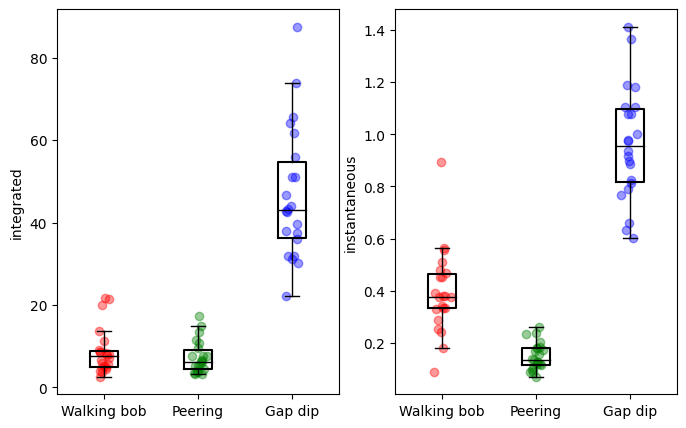

In [151]:
fig = plt.figure(figsize=(8,5))
ax = fig.subplots(1,2)

#theta
df = pd.DataFrame(np.transpose(np.array([parallax_mirror, parallax_corrapp, parallax_corrcross])), columns=['Walking bob','Peering','Gap dip'])

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

# Boxplot with modified median line
boxprops = dict(linewidth=1.5, color='black')
medianprops = dict(color='black')  # Change median line to black
ax[0].boxplot(vals, labels=names, boxprops=boxprops, medianprops=medianprops, showfliers=False)

palette = ['r', 'g', 'b']
for x, val, c in zip(xs, vals, palette):
    ax[0].scatter(x, val, alpha=0.4, color=c)
    
ax[0].set_ylabel('integrated')
    
#delta theta
df = pd.DataFrame(np.transpose(np.array([deltathetaprime_mirror, deltathetaprime_corrapp, deltathetaprime_corrcross])), columns=['Walking bob','Peering','Gap dip'])

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

# Boxplot with modified median line
boxprops = dict(linewidth=1.5, color='black')
medianprops = dict(color='black')  # Change median line to black
ax[1].boxplot(vals, labels=names, boxprops=boxprops, medianprops=medianprops, showfliers=False)

palette = ['r', 'g', 'b']
for x, val, c in zip(xs, vals, palette):
    ax[1].scatter(x, val, alpha=0.4, color=c)

ax[1].set_ylabel('instantaneous')
    
scatterlabels = ['theta', 'deltatheta']
for i in range(len(ax)):
    extent = ax[i].get_tightbbox(fig.canvas.get_renderer()).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f"C:\\Users\\yalec\\Downloads\\forfigures2\\{scatterlabels[i]}.svg", format='svg', bbox_inches=extent.expanded(1.0, 1.1))
    
plt.show()

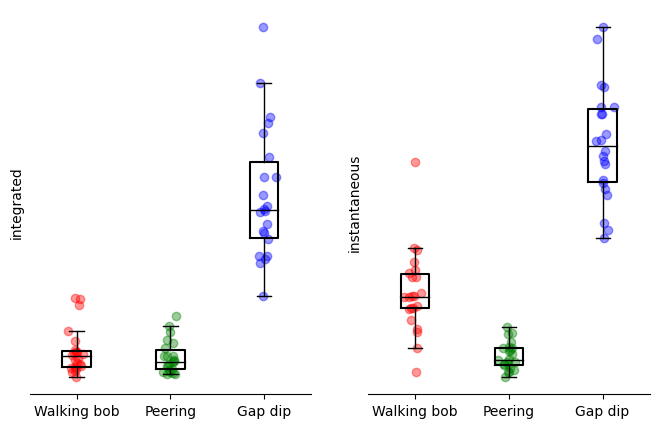

In [152]:
fig = plt.figure(figsize=(8,5))
ax = fig.subplots(1,2)

#theta
df = pd.DataFrame(np.transpose(np.array([parallax_mirror, parallax_corrapp, parallax_corrcross])), columns=['Walking bob','Peering','Gap dip'])

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

# Boxplot with modified median line
boxprops = dict(linewidth=1.5, color='black')
medianprops = dict(color='black')  # Change median line to black
ax[0].boxplot(vals, labels=names, boxprops=boxprops, medianprops=medianprops, showfliers=False)

palette = ['r', 'g', 'b']
for x, val, c in zip(xs, vals, palette):
    ax[0].scatter(x, val, alpha=0.4, color=c)
    
ax[0].set_ylabel('integrated')


#delta theta
df = pd.DataFrame(np.transpose(np.array([deltathetaprime_mirror, deltathetaprime_corrapp, deltathetaprime_corrcross])), columns=['Walking bob','Peering','Gap dip'])

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

# Boxplot with modified median line
boxprops = dict(linewidth=1.5, color='black')
medianprops = dict(color='black')  # Change median line to black
ax[1].boxplot(vals, labels=names, boxprops=boxprops, medianprops=medianprops, showfliers=False)

palette = ['r', 'g', 'b']
for x, val, c in zip(xs, vals, palette):
    ax[1].scatter(x, val, alpha=0.4, color=c)

ax[1].set_ylabel('instantaneous')

for axy in ax.flat:
    axy.spines['top'].set_visible(False)
    axy.spines['right'].set_visible(False)
    axy.spines['left'].set_visible(False)
#     axy.spines['bottom'].set_visible(False)
#     axy.xaxis.set_ticks([])
    axy.yaxis.set_ticks([])
    
scatterlabels = ['theta', 'deltatheta']
for i in range(len(ax)):
    extent = ax[i].get_tightbbox(fig.canvas.get_renderer()).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f"C:\\Users\\yalec\\Downloads\\forfigures2\\{scatterlabels[i]}_bottomonly.svg", format='svg', bbox_inches=extent.expanded(1.1, 1.2))
    
plt.show()

In [139]:
## Save csv of data from box plot

integrated = pd.DataFrame(np.transpose(np.array([parallax_mirror, parallax_corrapp, parallax_corrcross])), columns=['Walking bob','Peering','Gap dip'])
instantaneous = pd.DataFrame(np.transpose(np.array([deltathetaprime_mirror, deltathetaprime_corrapp, deltathetaprime_corrcross])), columns=['Walking bob','Peering','Gap dip'])

integrated.to_csv('C:\\Users\\yalec\\Documents\\GitHub\\Gap_Crossing\\Kate\\Data\\usedforanalysis\\integrated_boxplot.csv', index=False)
instantaneous.to_csv('C:\\Users\\yalec\\Documents\\GitHub\\Gap_Crossing\\Kate\\Data\\usedforanalysis\\instantaneous_boxplot.csv', index=False)